In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
# import random

# RandomListOfIntegers = [random.randint(0, 99999) for iter in range(5)]
# print(RandomListOfIntegers)
RandomListOfIntegers = [76243, 6833, 1233, 49155, 87917]


# 40 % drop

In [3]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.8)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.252638162097053	Top1 Acc: 0.5703399999809265


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.73783997644352	Top1 Acc: 0.3976
current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.6083667668540154	Top1 Acc: 0.5741600000286102


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.3131393903418433	Top1 Acc: 0.4371


Epoch-2-:   1%|          | 3/391 [00:00<01:19,  4.86it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6938167514703464	Top1 Acc: 0.55024


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.25041775160198	Top1 Acc: 0.457


Epoch-3-:   1%|          | 3/391 [00:00<01:38,  3.95it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.70667404713838	Top1 Acc: 0.5432199999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.252978931499433	Top1 Acc: 0.4539


Epoch-4-:   1%|          | 3/391 [00:00<01:27,  4.45it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7231798336633941	Top1 Acc: 0.5420000000190734


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.1998584843889066	Top1 Acc: 0.4525


Epoch-5-:   1%|          | 3/391 [00:00<01:30,  4.29it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.705152613732516	Top1 Acc: 0.5419800000286102


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.9104321908347215	Top1 Acc: 0.5048


Epoch-6-:   1%|          | 3/391 [00:00<01:23,  4.65it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.652777248331348	Top1 Acc: 0.5555600000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.7861667554589766	Top1 Acc: 0.5338


Epoch-7-:   1%|          | 3/391 [00:00<01:30,  4.29it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.613776122822481	Top1 Acc: 0.5632000000572205


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.946840278709991	Top1 Acc: 0.4954


Epoch-8-:   1%|          | 3/391 [00:00<01:29,  4.31it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5963754928325449	Top1 Acc: 0.56588


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.28915339029288	Top1 Acc: 0.4489


Epoch-9-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5925779632290307	Top1 Acc: 0.5682800000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8213952387435526	Top1 Acc: 0.5218


Epoch-10-:   1%|          | 3/391 [00:00<01:29,  4.36it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.571963746834289	Top1 Acc: 0.5729000000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8131554232367986	Top1 Acc: 0.524


Epoch-11-:   1%|          | 3/391 [00:00<01:30,  4.31it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5653215088807713	Top1 Acc: 0.577400000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.893180783790878	Top1 Acc: 0.5099


Epoch-12-:   1%|          | 3/391 [00:00<01:41,  3.80it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5671762060326384	Top1 Acc: 0.5751800000095367


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.048670726486399	Top1 Acc: 0.4814


Epoch-13-:   1%|          | 3/391 [00:00<01:32,  4.18it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5529480446939883	Top1 Acc: 0.5772800000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.7631419550014447	Top1 Acc: 0.5366


Epoch-14-:   1%|          | 3/391 [00:00<01:42,  3.77it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.550927739618989	Top1 Acc: 0.5786000000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.0183849017831346	Top1 Acc: 0.4949


Epoch-15-:   1%|          | 3/391 [00:00<01:26,  4.47it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5412833989428742	Top1 Acc: 0.5817000000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8509760174570205	Top1 Acc: 0.5258


Epoch-16-:   1%|          | 3/391 [00:00<01:18,  4.94it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5391144176273395	Top1 Acc: 0.5819000000572204


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.745014631295506	Top1 Acc: 0.5388


Epoch-17-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5310313488211473	Top1 Acc: 0.582080000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.140225199204457	Top1 Acc: 0.4728


Epoch-18-:   1%|          | 3/391 [00:00<01:27,  4.42it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.518616788832428	Top1 Acc: 0.5870000000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.7550750035273879	Top1 Acc: 0.5312


Epoch-19-:   1%|▏         | 5/391 [00:00<01:17,  4.98it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.516582234436289	Top1 Acc: 0.5855199999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.802480407907993	Top1 Acc: 0.529


Epoch-20-:   1%|▏         | 5/391 [00:00<01:08,  5.66it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5058813497538457	Top1 Acc: 0.58742


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8604239300836491	Top1 Acc: 0.5152


Epoch-21-:   1%|          | 4/391 [00:00<01:23,  4.62it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.4873994415068565	Top1 Acc: 0.5922600000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.0119579170323627	Top1 Acc: 0.4937


Epoch-22-:   1%|          | 4/391 [00:00<01:33,  4.14it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4944172102167173	Top1 Acc: 0.5913600000381469


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9719705038432833	Top1 Acc: 0.5005


Epoch-23-:   1%|          | 3/391 [00:00<01:24,  4.60it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4813872514783268	Top1 Acc: 0.5940600000572205


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8290502753438829	Top1 Acc: 0.5272


Epoch-24-:   1%|          | 4/391 [00:00<01:35,  4.03it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4744465988310402	Top1 Acc: 0.5936599999809266


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8469258079045936	Top1 Acc: 0.5274


Epoch-25-:   1%|▏         | 5/391 [00:00<01:14,  5.17it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4703748611842884	Top1 Acc: 0.5953600000381469


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.754437051241911	Top1 Acc: 0.5381


Epoch-26-:   1%|          | 3/391 [00:00<01:33,  4.15it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4519568623789132	Top1 Acc: 0.6026799999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.824851402753516	Top1 Acc: 0.53


Epoch-27-:   1%|          | 3/391 [00:00<01:29,  4.35it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4479672707560118	Top1 Acc: 0.6032600000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7259217153621624	Top1 Acc: 0.5466


Epoch-28-:   1%|          | 3/391 [00:00<01:24,  4.58it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4365928063307272	Top1 Acc: 0.6032600000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.865507501590101	Top1 Acc: 0.5216


Epoch-29-:   1%|          | 3/391 [00:00<01:23,  4.63it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.425908894185215	Top1 Acc: 0.6063400000381469


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8814174434806727	Top1 Acc: 0.5179


Epoch-30-:   1%|          | 3/391 [00:00<01:27,  4.43it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4210928401068958	Top1 Acc: 0.6098399999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7787612465363514	Top1 Acc: 0.5361


Epoch-31-:   1%|          | 3/391 [00:00<01:19,  4.89it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4082491919207756	Top1 Acc: 0.609860000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7331329040889498	Top1 Acc: 0.5525


Epoch-32-:   1%|          | 3/391 [00:00<01:26,  4.48it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.3882349833198215	Top1 Acc: 0.6183400000381469


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.77277215372158	Top1 Acc: 0.543


Epoch-33-:   1%|          | 3/391 [00:00<01:43,  3.74it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.390333104926302	Top1 Acc: 0.6157800000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7963548280015778	Top1 Acc: 0.5383


Epoch-34-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.367329210271616	Top1 Acc: 0.6218600000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.850358870965016	Top1 Acc: 0.5336


Epoch-35-:   1%|          | 3/391 [00:00<01:34,  4.09it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3548823265773255	Top1 Acc: 0.6228000000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6983029133156886	Top1 Acc: 0.5548


Epoch-36-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.3428432932290275	Top1 Acc: 0.6254800000190734


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.690841638589207	Top1 Acc: 0.5587


Epoch-37-:   1%|          | 3/391 [00:00<01:15,  5.16it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3405663252181714	Top1 Acc: 0.6291000000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.6755654012100607	Top1 Acc: 0.5636


Epoch-38-:   1%|          | 3/391 [00:00<01:24,  4.62it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3290716964570457	Top1 Acc: 0.6315400000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6879774475399452	Top1 Acc: 0.5589


Epoch-39-:   1%|          | 3/391 [00:00<01:30,  4.31it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.312362297416648	Top1 Acc: 0.6322799999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7517936033538626	Top1 Acc: 0.5448


Epoch-40-:   1%|          | 3/391 [00:00<01:33,  4.14it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.285895265429221	Top1 Acc: 0.6407599999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.734226189082182	Top1 Acc: 0.547


Epoch-41-:   1%|          | 3/391 [00:00<01:28,  4.39it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2809314758271513	Top1 Acc: 0.6425600000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7660282563559617	Top1 Acc: 0.5558


Epoch-42-:   1%|          | 3/391 [00:00<01:15,  5.15it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.265057631465785	Top1 Acc: 0.6460999999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.567899430854411	Top1 Acc: 0.5819


Epoch-43-:   1%|          | 3/391 [00:00<01:34,  4.11it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2432195654000773	Top1 Acc: 0.6522000000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7160421760776374	Top1 Acc: 0.5511


Epoch-44-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2337743249695625	Top1 Acc: 0.6551800000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6743539390684683	Top1 Acc: 0.5626


Epoch-45-:   1%|          | 3/391 [00:00<01:24,  4.62it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2144749539587505	Top1 Acc: 0.659360000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5817031120952172	Top1 Acc: 0.5871


Epoch-46-:   1%|          | 3/391 [00:00<01:24,  4.59it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.193612351137049	Top1 Acc: 0.6625199999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.704309786422343	Top1 Acc: 0.5593


Epoch-47-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1835333535738308	Top1 Acc: 0.666220000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6987695512892325	Top1 Acc: 0.5682


Epoch-48-:   1%|          | 3/391 [00:00<01:22,  4.68it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1665526300744937	Top1 Acc: 0.6716399999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6073177585118934	Top1 Acc: 0.5798


Epoch-49-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1428083243882259	Top1 Acc: 0.6734000000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5697089056425457	Top1 Acc: 0.5944


Epoch-50-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1303724739557641	Top1 Acc: 0.6801400000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5143736646145205	Top1 Acc: 0.5991


Epoch-51-:   1%|          | 3/391 [00:00<01:29,  4.35it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1027632393800388	Top1 Acc: 0.6846200000381469


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6459450284137	Top1 Acc: 0.5765


Epoch-52-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.093795714628361	Top1 Acc: 0.6867400000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6337408114083205	Top1 Acc: 0.5773


Epoch-53-:   1%|          | 3/391 [00:00<01:28,  4.39it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.070764332933499	Top1 Acc: 0.692700000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.493564118312884	Top1 Acc: 0.607


Epoch-54-:   1%|          | 3/391 [00:00<01:23,  4.62it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0419378067221483	Top1 Acc: 0.7010000000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4537766251382949	Top1 Acc: 0.6139


Epoch-55-:   1%|          | 3/391 [00:00<01:22,  4.71it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.021198011420267	Top1 Acc: 0.7072600000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5536567757401285	Top1 Acc: 0.5942


Epoch-56-:   1%|          | 3/391 [00:00<01:24,  4.61it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0049238282701243	Top1 Acc: 0.7083000000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.411440147629267	Top1 Acc: 0.628


Epoch-57-:   1%|          | 3/391 [00:00<01:26,  4.47it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9712661122117201	Top1 Acc: 0.71864


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6018738143051727	Top1 Acc: 0.5898


Epoch-58-:   1%|          | 3/391 [00:00<01:29,  4.32it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9615294951612078	Top1 Acc: 0.7212599999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4002502221095412	Top1 Acc: 0.6297


Epoch-59-:   1%|          | 3/391 [00:00<01:19,  4.88it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9220758848787879	Top1 Acc: 0.7300200000381469


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.6085790184479725	Top1 Acc: 0.5926


Epoch-60-:   1%|          | 3/391 [00:00<01:26,  4.50it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.913495679340704	Top1 Acc: 0.732200000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4672060405151754	Top1 Acc: 0.6199


Epoch-61-:   1%|          | 3/391 [00:00<01:38,  3.92it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8869227391984457	Top1 Acc: 0.738760000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4064627191688441	Top1 Acc: 0.6366


Epoch-62-:   1%|          | 3/391 [00:00<01:19,  4.90it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8509588672224518	Top1 Acc: 0.7502799999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.502764810489703	Top1 Acc: 0.6187


Epoch-63-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8304772043167172	Top1 Acc: 0.756060000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3945527378516862	Top1 Acc: 0.6376


Epoch-64-:   1%|          | 3/391 [00:00<01:37,  4.00it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8088247243248289	Top1 Acc: 0.760240000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4135364218603206	Top1 Acc: 0.6357


Epoch-65-:   1%|          | 3/391 [00:00<01:19,  4.88it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7848852104543115	Top1 Acc: 0.76774


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4203826422932782	Top1 Acc: 0.6359


Epoch-66-:   0%|          | 1/391 [00:00<02:05,  3.11it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.750655235155769	Top1 Acc: 0.7777800000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3915108464941193	Top1 Acc: 0.6448


Epoch-67-:   1%|          | 3/391 [00:00<01:28,  4.40it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7123854709098406	Top1 Acc: 0.785220000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4912501211407818	Top1 Acc: 0.634


Epoch-68-:   1%|          | 3/391 [00:00<01:24,  4.62it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.694493613279689	Top1 Acc: 0.7917000000572204


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3196584763406198	Top1 Acc: 0.6603


Epoch-69-:   1%|          | 3/391 [00:00<01:34,  4.10it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6595673398745944	Top1 Acc: 0.80132


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3994394985935357	Top1 Acc: 0.6524


Epoch-70-:   1%|          | 3/391 [00:00<01:25,  4.53it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6251321992910731	Top1 Acc: 0.808660000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3826406507552425	Top1 Acc: 0.6565


Epoch-71-:   1%|          | 3/391 [00:00<01:27,  4.42it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5905924588822953	Top1 Acc: 0.8195800000572204


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3872546742234049	Top1 Acc: 0.6539


Epoch-72-:   1%|          | 3/391 [00:00<01:23,  4.65it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.556838486962916	Top1 Acc: 0.830780000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3311147169221806	Top1 Acc: 0.6685


Epoch-73-:   1%|          | 3/391 [00:00<01:27,  4.44it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5277713210991276	Top1 Acc: 0.837180000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.393875920319859	Top1 Acc: 0.6568


Epoch-74-:   1%|          | 3/391 [00:00<01:26,  4.47it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.49673890572069856	Top1 Acc: 0.8471200000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3025134786774841	Top1 Acc: 0.6733


Epoch-75-:   1%|          | 3/391 [00:00<01:54,  3.40it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.45959798446701616	Top1 Acc: 0.8556


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3650215494481823	Top1 Acc: 0.6667


Epoch-76-:   1%|          | 3/391 [00:00<01:37,  3.96it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.42998847540687113	Top1 Acc: 0.8659400000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3348739222635198	Top1 Acc: 0.6752


Epoch-77-:   1%|          | 3/391 [00:00<01:20,  4.84it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.39117822455018375	Top1 Acc: 0.8761200000572205


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3252549978751171	Top1 Acc: 0.6833


Epoch-78-:   1%|          | 3/391 [00:00<01:46,  3.64it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.360478480225024	Top1 Acc: 0.8860600000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3761873365957527	Top1 Acc: 0.6809


Epoch-79-:   1%|          | 3/391 [00:00<01:43,  3.73it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.32317780537526014	Top1 Acc: 0.8981200000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3217851247968553	Top1 Acc: 0.6926


Epoch-80-:   1%|          | 3/391 [00:00<01:25,  4.52it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.29144967269257205	Top1 Acc: 0.908120000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3303783573681796	Top1 Acc: 0.693


Epoch-81-:   1%|          | 3/391 [00:00<01:24,  4.59it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2567868551329883	Top1 Acc: 0.918240000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3402257252343093	Top1 Acc: 0.6986


Epoch-82-:   1%|          | 3/391 [00:00<01:19,  4.86it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.2292319100035731	Top1 Acc: 0.9277200000572204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.344979404648648	Top1 Acc: 0.6995


Epoch-83-:   1%|          | 3/391 [00:00<01:21,  4.76it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.20264669744026326	Top1 Acc: 0.935680000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.334037881108779	Top1 Acc: 0.7052
current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17085225963988876	Top1 Acc: 0.9469400000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3234407019011583	Top1 Acc: 0.7047


Epoch-85-:   1%|▏         | 5/391 [00:00<01:11,  5.39it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1536067728038944	Top1 Acc: 0.951860000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.337871154652366	Top1 Acc: 0.7116


Epoch-86-:   1%|          | 4/391 [00:00<01:12,  5.36it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.13059591184682248	Top1 Acc: 0.95888


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3626921637148797	Top1 Acc: 0.7095


Epoch-87-:   1%|          | 3/391 [00:00<01:25,  4.53it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11308230310106826	Top1 Acc: 0.9654400000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3474444105655332	Top1 Acc: 0.7156


Epoch-88-:   1%|          | 3/391 [00:00<01:45,  3.68it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10084222118987148	Top1 Acc: 0.9688999999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.31925604992275	Top1 Acc: 0.7204


Epoch-89-:   1%|          | 3/391 [00:00<01:41,  3.82it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08444865583382605	Top1 Acc: 0.9738000000381469


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3338422420658642	Top1 Acc: 0.721


Epoch-90-:   1%|          | 4/391 [00:00<01:21,  4.73it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07681412262665799	Top1 Acc: 0.97682


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.322037481054475	Top1 Acc: 0.7219


Epoch-91-:   1%|          | 3/391 [00:00<01:35,  4.07it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06782309007366448	Top1 Acc: 0.9803800000190734


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3232963153078585	Top1 Acc: 0.7247


Epoch-92-:   1%|          | 3/391 [00:00<01:21,  4.76it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06407247189327579	Top1 Acc: 0.981500000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3234705849538875	Top1 Acc: 0.7245


Epoch-93-:   1%|          | 3/391 [00:00<01:23,  4.63it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.056132476922134154	Top1 Acc: 0.9836


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3163690793363354	Top1 Acc: 0.7262


Epoch-94-:   1%|          | 3/391 [00:00<01:42,  3.80it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.0521846384148273	Top1 Acc: 0.98532


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.318441705235952	Top1 Acc: 0.7272


Epoch-95-:   1%|          | 3/391 [00:00<01:35,  4.05it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.05133427833647603	Top1 Acc: 0.9854600000572205


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3113242195376866	Top1 Acc: 0.7267


Epoch-96-:   1%|          | 3/391 [00:00<01:37,  3.99it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.05089949227183524	Top1 Acc: 0.9857600000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3178617599644238	Top1 Acc: 0.7273


Epoch-97-:   1%|          | 3/391 [00:00<01:34,  4.11it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04745369610588645	Top1 Acc: 0.9872600000190734


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3156052676937249	Top1 Acc: 0.7266
current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.046820186119040715	Top1 Acc: 0.9869999999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.317177307002152	Top1 Acc: 0.7267


Epoch-99-:   1%|          | 3/391 [00:00<01:33,  4.16it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04790940644014675	Top1 Acc: 0.98674


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 80.79it/s]


Validation results at epoch-99 | loss: 1.3163383022139343	Top1 Acc: 0.7278
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Epoch-0-:   1%|          | 3/391 [00:00<01:24,  4.62it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.2438566477402397	Top1 Acc: 0.5711000000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.1849915996382507	Top1 Acc: 0.4822


Epoch-1-:   1%|          | 3/391 [00:00<01:13,  5.28it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.6104040194655318	Top1 Acc: 0.5724399999904632


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.2710069780108295	Top1 Acc: 0.4555


Epoch-2-:   1%|          | 3/391 [00:00<01:36,  4.04it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.695101157173781	Top1 Acc: 0.5499399999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.05199640612059	Top1 Acc: 0.4797


Epoch-3-:   1%|          | 3/391 [00:00<01:34,  4.12it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.701079261882226	Top1 Acc: 0.5445000000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.1008356206024748	Top1 Acc: 0.4623


Epoch-4-:   1%|          | 3/391 [00:00<01:37,  3.97it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7315208497254744	Top1 Acc: 0.5397400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.066575072988679	Top1 Acc: 0.4778


Epoch-5-:   1%|          | 3/391 [00:00<01:36,  4.03it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7052559236736249	Top1 Acc: 0.5458999999904632


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.004789209064049	Top1 Acc: 0.4795


Epoch-6-:   1%|          | 3/391 [00:00<01:30,  4.27it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6546232584492324	Top1 Acc: 0.5568400000286102


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9735957595366467	Top1 Acc: 0.4851


Epoch-7-:   1%|          | 3/391 [00:00<01:41,  3.82it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6193789295528247	Top1 Acc: 0.561640000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.1582148014744624	Top1 Acc: 0.4705


Epoch-8-:   1%|          | 3/391 [00:00<01:28,  4.40it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6128181560570016	Top1 Acc: 0.5643800000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.8443015632750113	Top1 Acc: 0.5233


Epoch-9-:   1%|          | 3/391 [00:00<01:41,  3.81it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.585798669349202	Top1 Acc: 0.5699600000190734


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.036612006682384	Top1 Acc: 0.4874


Epoch-10-:   1%|          | 3/391 [00:00<01:26,  4.46it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5823416252575262	Top1 Acc: 0.5721400000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.1780898405026785	Top1 Acc: 0.4547


Epoch-11-:   1%|          | 3/391 [00:00<01:27,  4.45it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.569371523149788	Top1 Acc: 0.5752799999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.900379764882824	Top1 Acc: 0.511


Epoch-12-:   1%|          | 3/391 [00:00<01:16,  5.04it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5607384281695043	Top1 Acc: 0.5750200000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.108841289447833	Top1 Acc: 0.4685


Epoch-13-:   1%|          | 3/391 [00:00<01:28,  4.39it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5532381665676147	Top1 Acc: 0.57678


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.955395930930029	Top1 Acc: 0.5032


Epoch-14-:   1%|          | 3/391 [00:00<01:44,  3.71it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.556257490611747	Top1 Acc: 0.5763000000190734


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.961944718904133	Top1 Acc: 0.4971


Epoch-15-:   1%|          | 3/391 [00:00<01:37,  4.00it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.542168959022483	Top1 Acc: 0.57916


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.3355780855009827	Top1 Acc: 0.4274


Epoch-16-:   1%|          | 3/391 [00:00<01:27,  4.46it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5345237279487083	Top1 Acc: 0.5810599999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.7819228594816183	Top1 Acc: 0.5248


Epoch-17-:   1%|          | 3/391 [00:00<01:34,  4.09it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5296351562070725	Top1 Acc: 0.5839999999904633


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.7841307800027388	Top1 Acc: 0.5313


Epoch-18-:   1%|          | 3/391 [00:00<01:24,  4.57it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5140263961099298	Top1 Acc: 0.587060000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0300720522675335	Top1 Acc: 0.4821


Epoch-19-:   1%|          | 3/391 [00:00<01:19,  4.85it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.520619132634624	Top1 Acc: 0.586020000038147


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.9109704207770433	Top1 Acc: 0.5102


Epoch-20-:   1%|          | 3/391 [00:00<01:30,  4.27it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5010279938388054	Top1 Acc: 0.5898000000572204


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.7920319204089008	Top1 Acc: 0.5302


Epoch-21-:   1%|          | 3/391 [00:00<01:24,  4.60it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5028626927939217	Top1 Acc: 0.5917400000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.867580836332297	Top1 Acc: 0.5156


Epoch-22-:   1%|          | 3/391 [00:00<01:29,  4.32it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.487687761978725	Top1 Acc: 0.5932


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.074596691735183	Top1 Acc: 0.4907


Epoch-23-:   1%|          | 3/391 [00:00<01:27,  4.41it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4820481057057295	Top1 Acc: 0.5926000000572205


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8834638384324085	Top1 Acc: 0.5252


Epoch-24-:   1%|          | 3/391 [00:00<01:19,  4.86it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4824615552297333	Top1 Acc: 0.5924200000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8298161075085024	Top1 Acc: 0.5268


Epoch-25-:   1%|          | 3/391 [00:00<01:28,  4.37it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4698334313414592	Top1 Acc: 0.598880000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.898234732543366	Top1 Acc: 0.5163


Epoch-26-:   1%|          | 3/391 [00:00<01:32,  4.21it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4621384997502007	Top1 Acc: 0.5992600000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.789378818077377	Top1 Acc: 0.5246


Epoch-27-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4453562406627722	Top1 Acc: 0.602600000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.2518812463253357	Top1 Acc: 0.4642


Epoch-28-:   1%|          | 3/391 [00:00<01:27,  4.44it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4386535870754504	Top1 Acc: 0.6034799999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.6125034290023996	Top1 Acc: 0.5669


Epoch-29-:   1%|          | 3/391 [00:00<01:26,  4.49it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4367188340257806	Top1 Acc: 0.6049600000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.7800869036324416	Top1 Acc: 0.5333


Epoch-30-:   1%|          | 3/391 [00:00<01:40,  3.85it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4212904936822175	Top1 Acc: 0.6067200000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.6222674318506747	Top1 Acc: 0.568


Epoch-31-:   1%|          | 3/391 [00:00<01:37,  3.97it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4079786421697769	Top1 Acc: 0.61114


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7484211438818822	Top1 Acc: 0.5386


Epoch-32-:   1%|          | 3/391 [00:00<01:30,  4.28it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4066397808396909	Top1 Acc: 0.6101799999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7069963563846637	Top1 Acc: 0.5533


Epoch-33-:   1%|          | 3/391 [00:00<01:19,  4.89it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.383879516435706	Top1 Acc: 0.6188200000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.750711969182461	Top1 Acc: 0.5472


Epoch-34-:   1%|          | 3/391 [00:00<01:19,  4.90it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3743282455922392	Top1 Acc: 0.6180000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 2.145537901528274	Top1 Acc: 0.4816


Epoch-35-:   1%|          | 3/391 [00:00<01:34,  4.12it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3688362149326392	Top1 Acc: 0.6222400000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6765995312340651	Top1 Acc: 0.5571


Epoch-36-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.356635210306748	Top1 Acc: 0.6226200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.8349727346927305	Top1 Acc: 0.5291


Epoch-37-:   1%|          | 3/391 [00:00<01:33,  4.17it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.336600251972218	Top1 Acc: 0.62812


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7001503615439693	Top1 Acc: 0.5573


Epoch-38-:   1%|          | 3/391 [00:00<01:43,  3.76it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3223287856487362	Top1 Acc: 0.6320000000381469


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.9513351238226588	Top1 Acc: 0.5085


Epoch-39-:   1%|          | 3/391 [00:00<01:31,  4.23it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3018265929063568	Top1 Acc: 0.636180000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.691464979437333	Top1 Acc: 0.5533


Epoch-40-:   1%|          | 3/391 [00:00<01:17,  5.02it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.306139813359741	Top1 Acc: 0.6355400000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.758413289166704	Top1 Acc: 0.545


Epoch-41-:   1%|          | 3/391 [00:00<01:26,  4.49it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2898331673248955	Top1 Acc: 0.639620000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.601519533350498	Top1 Acc: 0.5784


Epoch-42-:   1%|          | 3/391 [00:00<01:36,  4.03it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2684936143858048	Top1 Acc: 0.6416600000381469


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7416788279255735	Top1 Acc: 0.5503


Epoch-43-:   1%|          | 3/391 [00:00<01:30,  4.28it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2592203928076702	Top1 Acc: 0.6469800000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.570141510118412	Top1 Acc: 0.5854


Epoch-44-:   1%|          | 3/391 [00:00<01:23,  4.66it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2323428296372103	Top1 Acc: 0.6515400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6796832869324503	Top1 Acc: 0.5689


Epoch-45-:   1%|          | 3/391 [00:00<01:46,  3.63it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2138587893427486	Top1 Acc: 0.65776


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6957870012597194	Top1 Acc: 0.5684


Epoch-46-:   1%|          | 3/391 [00:00<01:21,  4.75it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2041773321988332	Top1 Acc: 0.6598000000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.52741578787188	Top1 Acc: 0.5874


Epoch-47-:   1%|          | 3/391 [00:00<01:30,  4.26it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1882178007489275	Top1 Acc: 0.6643600000572205


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6738181159466128	Top1 Acc: 0.5633


Epoch-48-:   1%|          | 3/391 [00:00<01:28,  4.37it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1702612653717666	Top1 Acc: 0.67022


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.4927107940746258	Top1 Acc: 0.6036


Epoch-49-:   1%|          | 3/391 [00:00<01:29,  4.35it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1516966014871817	Top1 Acc: 0.6726999999809266


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5714386143261874	Top1 Acc: 0.5839


Epoch-50-:   1%|          | 3/391 [00:00<01:27,  4.46it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.133957432359076	Top1 Acc: 0.67642


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5669519976724553	Top1 Acc: 0.5785


Epoch-51-:   1%|          | 3/391 [00:00<01:52,  3.44it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1121044178752948	Top1 Acc: 0.6846000000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5609483613243587	Top1 Acc: 0.5922


Epoch-52-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0927732449663266	Top1 Acc: 0.6866000000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5375796677191047	Top1 Acc: 0.5936


Epoch-53-:   1%|▏         | 5/391 [00:00<01:06,  5.76it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0646512160825607	Top1 Acc: 0.697120000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.569317540035972	Top1 Acc: 0.5883


Epoch-54-:   1%|          | 4/391 [00:00<01:16,  5.03it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0435390101979152	Top1 Acc: 0.70068


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.513000189503537	Top1 Acc: 0.6067


Epoch-55-:   1%|          | 4/391 [00:00<01:33,  4.15it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0213988775487446	Top1 Acc: 0.70478


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5082699830019022	Top1 Acc: 0.6026


Epoch-56-:   1%|          | 3/391 [00:00<01:49,  3.53it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0097538020909596	Top1 Acc: 0.7084599999809266


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6212724884854088	Top1 Acc: 0.5819


Epoch-57-:   1%|          | 3/391 [00:00<01:49,  3.56it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9812197122732391	Top1 Acc: 0.7153400000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4376403244235847	Top1 Acc: 0.6229


Epoch-58-:   1%|          | 3/391 [00:00<01:35,  4.07it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.960160715500717	Top1 Acc: 0.72084


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5262604499165016	Top1 Acc: 0.6086


Epoch-59-:   1%|          | 4/391 [00:00<01:12,  5.32it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9330785603779356	Top1 Acc: 0.7290600000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4196079509167732	Top1 Acc: 0.6259


Epoch-60-:   1%|          | 3/391 [00:00<01:42,  3.77it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9091094046297585	Top1 Acc: 0.7342200000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4588026804260061	Top1 Acc: 0.6236


Epoch-61-:   1%|          | 3/391 [00:00<01:33,  4.15it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.88595991198669	Top1 Acc: 0.740520000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4329769490640374	Top1 Acc: 0.6239


Epoch-62-:   1%|          | 3/391 [00:00<01:22,  4.69it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8597799967926787	Top1 Acc: 0.7485


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4232872196390658	Top1 Acc: 0.6335


Epoch-63-:   1%|          | 3/391 [00:00<01:27,  4.43it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8283726286400309	Top1 Acc: 0.7553400000381469


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5271883901161483	Top1 Acc: 0.6136


Epoch-64-:   1%|          | 3/391 [00:00<01:18,  4.94it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8061228513412768	Top1 Acc: 0.7630599999809266


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3749356609356553	Top1 Acc: 0.6481


Epoch-65-:   1%|          | 3/391 [00:00<01:28,  4.40it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7757067881581728	Top1 Acc: 0.7691000000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3589598830742171	Top1 Acc: 0.6504


Epoch-66-:   1%|          | 3/391 [00:00<01:29,  4.35it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7495425354946604	Top1 Acc: 0.7762200000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4378173705897754	Top1 Acc: 0.6363


Epoch-67-:   1%|          | 3/391 [00:00<01:28,  4.40it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7169004430246475	Top1 Acc: 0.785540000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4220353968535797	Top1 Acc: 0.6387


Epoch-68-:   1%|          | 3/391 [00:00<01:23,  4.66it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6848430831718932	Top1 Acc: 0.7919600000381469


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3701779600940174	Top1 Acc: 0.6514


Epoch-69-:   1%|          | 3/391 [00:00<01:26,  4.47it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6609783501118955	Top1 Acc: 0.800920000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3874112239366845	Top1 Acc: 0.6487


Epoch-70-:   1%|          | 3/391 [00:00<01:37,  3.97it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6250836381979306	Top1 Acc: 0.8098000000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4408768868144555	Top1 Acc: 0.648


Epoch-71-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5981490297238236	Top1 Acc: 0.8162399999809266


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3814526328557655	Top1 Acc: 0.656


Epoch-72-:   1%|          | 3/391 [00:00<01:26,  4.46it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.5655163619524378	Top1 Acc: 0.8255200000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3390342653552187	Top1 Acc: 0.6663


Epoch-73-:   1%|          | 3/391 [00:00<01:17,  5.03it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5268566561934284	Top1 Acc: 0.8371000000572204


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3885630029666274	Top1 Acc: 0.6619


Epoch-74-:   1%|          | 3/391 [00:00<01:36,  4.04it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.4955912226682429	Top1 Acc: 0.848200000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3215787229658682	Top1 Acc: 0.6751


Epoch-75-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.459104857367018	Top1 Acc: 0.8569200000572205


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3888863325119019	Top1 Acc: 0.6691


Epoch-76-:   1%|          | 3/391 [00:00<01:37,  3.99it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.42158371869407957	Top1 Acc: 0.866980000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.367768887477585	Top1 Acc: 0.6723


Epoch-77-:   1%|          | 3/391 [00:00<01:49,  3.55it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.39701211814532805	Top1 Acc: 0.8755400000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3445031854170788	Top1 Acc: 0.6773


Epoch-78-:   1%|          | 3/391 [00:00<01:32,  4.21it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.3587193699444042	Top1 Acc: 0.8872199999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.306597879415826	Top1 Acc: 0.6898


Epoch-79-:   1%|          | 3/391 [00:00<01:52,  3.44it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.32875530551309173	Top1 Acc: 0.8964199999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3156986244117157	Top1 Acc: 0.6852


Epoch-80-:   1%|          | 3/391 [00:00<01:38,  3.94it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.2922025252791012	Top1 Acc: 0.9083000000572204


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3627343102346492	Top1 Acc: 0.6844


Epoch-81-:   1%|          | 3/391 [00:00<01:38,  3.94it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.26028508022237007	Top1 Acc: 0.918100000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3359449528440643	Top1 Acc: 0.6961


Epoch-82-:   1%|          | 3/391 [00:00<01:27,  4.43it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.22891471085264858	Top1 Acc: 0.9282


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3558935183513015	Top1 Acc: 0.6959


Epoch-83-:   1%|          | 3/391 [00:00<01:40,  3.86it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.1983471574723873	Top1 Acc: 0.9375600000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3562020319926589	Top1 Acc: 0.7034


Epoch-84-:   1%|          | 3/391 [00:00<01:45,  3.68it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17377928845451007	Top1 Acc: 0.945080000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.339572830290734	Top1 Acc: 0.7094


Epoch-85-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.15001454387250765	Top1 Acc: 0.9526800000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.343919362448439	Top1 Acc: 0.7115


Epoch-86-:   1%|          | 3/391 [00:00<01:41,  3.84it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1306458704383172	Top1 Acc: 0.95942


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3624535874475407	Top1 Acc: 0.7077


Epoch-87-:   1%|          | 3/391 [00:00<01:39,  3.88it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11418786164744736	Top1 Acc: 0.9644799999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3381996328317667	Top1 Acc: 0.7114


Epoch-88-:   1%|          | 3/391 [00:00<01:31,  4.23it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10142499133182303	Top1 Acc: 0.969100000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3335762906678115	Top1 Acc: 0.7159


Epoch-89-:   1%|          | 3/391 [00:00<01:52,  3.44it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08474789810416948	Top1 Acc: 0.974740000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3499502056761632	Top1 Acc: 0.7137


Epoch-90-:   1%|          | 3/391 [00:00<01:34,  4.12it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07648718712941917	Top1 Acc: 0.9778800000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3420498869087123	Top1 Acc: 0.7185


Epoch-91-:   1%|          | 3/391 [00:00<01:33,  4.16it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06863456675568429	Top1 Acc: 0.9798400000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3446646672260911	Top1 Acc: 0.7203


Epoch-92-:   1%|          | 3/391 [00:00<01:59,  3.24it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06147209742127934	Top1 Acc: 0.98196


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3320009421698655	Top1 Acc: 0.7229


Epoch-93-:   1%|          | 3/391 [00:00<01:44,  3.72it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.059560015604681216	Top1 Acc: 0.982980000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3342704078819179	Top1 Acc: 0.7207


Epoch-94-:   1%|          | 3/391 [00:00<01:33,  4.16it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05584481701045237	Top1 Acc: 0.98432


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3355259827420682	Top1 Acc: 0.725


Epoch-95-:   1%|          | 3/391 [00:00<01:32,  4.21it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.05131725439816104	Top1 Acc: 0.98566


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3314557369751265	Top1 Acc: 0.7237


Epoch-96-:   1%|          | 3/391 [00:00<01:50,  3.53it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.048491819113816906	Top1 Acc: 0.98674


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3275659506834006	Top1 Acc: 0.7228


Epoch-97-:   1%|          | 3/391 [00:00<01:35,  4.07it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04725020329046356	Top1 Acc: 0.98682


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3330197719079029	Top1 Acc: 0.7231


Epoch-98-:   1%|          | 3/391 [00:00<01:49,  3.53it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.045947590838079255	Top1 Acc: 0.987440000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3302779258052004	Top1 Acc: 0.7227


Epoch-99-:   1%|          | 3/391 [00:00<01:37,  3.98it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04640395092584974	Top1 Acc: 0.9872800000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 44.45it/s]


Validation results at epoch-99 | loss: 1.330790114553669	Top1 Acc: 0.7236
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Epoch-0-:   1%|          | 3/391 [00:00<01:39,  3.91it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.247731003767389	Top1 Acc: 0.5676000000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.0352242068399358	Top1 Acc: 0.5099


Epoch-1-:   1%|          | 3/391 [00:00<01:53,  3.41it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.6108529317714368	Top1 Acc: 0.5738200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.9679809914359563	Top1 Acc: 0.5008


Epoch-2-:   1%|          | 3/391 [00:00<01:41,  3.82it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6875615693114299	Top1 Acc: 0.5493200000572205


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.4400902367845365	Top1 Acc: 0.4124


Epoch-3-:   1%|          | 3/391 [00:00<01:37,  3.99it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7223806344639614	Top1 Acc: 0.53912


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.103098922137973	Top1 Acc: 0.4775


Epoch-4-:   1%|          | 3/391 [00:00<01:38,  3.95it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7272003413466237	Top1 Acc: 0.5400800000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.0207367682758766	Top1 Acc: 0.4915


Epoch-5-:   1%|          | 3/391 [00:00<01:40,  3.88it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.701979611230933	Top1 Acc: 0.542720000038147


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.8968916889987415	Top1 Acc: 0.508


Epoch-6-:   1%|          | 3/391 [00:00<01:47,  3.60it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.65501589909234	Top1 Acc: 0.5554800000095368


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.0240369597567787	Top1 Acc: 0.4852


Epoch-7-:   1%|          | 3/391 [00:00<01:41,  3.83it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6226357627097907	Top1 Acc: 0.5600799999904632


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.960990907270697	Top1 Acc: 0.4962


Epoch-8-:   1%|          | 3/391 [00:00<01:38,  3.93it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6002417485732252	Top1 Acc: 0.5678000000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.944402792785741	Top1 Acc: 0.5011


Epoch-9-:   1%|          | 3/391 [00:00<01:41,  3.84it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5883092761344617	Top1 Acc: 0.5708799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.082866716988479	Top1 Acc: 0.483


Epoch-10-:   1%|          | 3/391 [00:00<01:48,  3.59it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5781408252618503	Top1 Acc: 0.570340000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9774167869664445	Top1 Acc: 0.5025


Epoch-11-:   1%|          | 3/391 [00:00<01:47,  3.60it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5743285387068453	Top1 Acc: 0.5702


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.951212335236465	Top1 Acc: 0.5018


Epoch-12-:   1%|          | 3/391 [00:00<01:36,  4.02it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5572522060035745	Top1 Acc: 0.5765400000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.8521016624909412	Top1 Acc: 0.5185


Epoch-13-:   1%|          | 3/391 [00:00<01:32,  4.18it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.555366385318434	Top1 Acc: 0.579320000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.9272180388245401	Top1 Acc: 0.4944


Epoch-14-:   1%|          | 3/391 [00:00<01:41,  3.84it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5479291028073987	Top1 Acc: 0.5775199999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.920392472532731	Top1 Acc: 0.5121


Epoch-15-:   1%|          | 3/391 [00:00<01:57,  3.30it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5436780275896078	Top1 Acc: 0.5794200000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.329639680777924	Top1 Acc: 0.4526


Epoch-16-:   1%|          | 3/391 [00:00<01:40,  3.87it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5360239259422284	Top1 Acc: 0.579880000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8369149950486194	Top1 Acc: 0.5178
current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5363087443744434	Top1 Acc: 0.5799


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.0354523749291142	Top1 Acc: 0.4915


Epoch-18-:   1%|▏         | 5/391 [00:00<01:12,  5.33it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5181885070508094	Top1 Acc: 0.5850199999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.7379057286660882	Top1 Acc: 0.5447


Epoch-19-:   1%|          | 4/391 [00:00<01:13,  5.24it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5151643948176938	Top1 Acc: 0.5856999999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.1719659174544903	Top1 Acc: 0.4601


Epoch-20-:   1%|          | 3/391 [00:00<01:33,  4.17it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5058281266170999	Top1 Acc: 0.5862599999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8519144812716712	Top1 Acc: 0.5217


Epoch-21-:   1%|          | 3/391 [00:00<01:38,  3.95it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.499704256387013	Top1 Acc: 0.589660000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.9574023047579994	Top1 Acc: 0.5044


Epoch-22-:   1%|          | 3/391 [00:00<01:32,  4.19it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4980924958768098	Top1 Acc: 0.590960000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.7271954862377312	Top1 Acc: 0.5557


Epoch-23-:   1%|          | 4/391 [00:00<01:19,  4.85it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4794118309874669	Top1 Acc: 0.5923400000572204


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.903065652786931	Top1 Acc: 0.5125


Epoch-24-:   1%|▏         | 5/391 [00:00<01:16,  5.07it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4763867708728136	Top1 Acc: 0.5961600000572205


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8750383114512963	Top1 Acc: 0.5249
current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.472028502113069	Top1 Acc: 0.5943000000572205


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.8576747676994227	Top1 Acc: 0.5165


Epoch-26-:   1%|          | 3/391 [00:00<01:30,  4.30it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.453456443593935	Top1 Acc: 0.5992200000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8569768320156048	Top1 Acc: 0.5208


Epoch-27-:   1%|          | 3/391 [00:00<01:21,  4.76it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4511446998552289	Top1 Acc: 0.603280000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8370787886124622	Top1 Acc: 0.5246


Epoch-28-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.433711743415774	Top1 Acc: 0.6057399999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.7926566148106056	Top1 Acc: 0.5291
current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.427523576999869	Top1 Acc: 0.60612


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.6679773164700857	Top1 Acc: 0.5591
current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4124814088997024	Top1 Acc: 0.6090799999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7128121641617786	Top1 Acc: 0.5474
current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4022512445059578	Top1 Acc: 0.61352


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.9469915507714959	Top1 Acc: 0.5082


Epoch-32-:   1%|          | 3/391 [00:00<01:14,  5.18it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.393844619431459	Top1 Acc: 0.6132799999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.6710060834884644	Top1 Acc: 0.5653
current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3838223627461192	Top1 Acc: 0.6181


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.727371534214744	Top1 Acc: 0.5435
current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3756027825348212	Top1 Acc: 0.6199600000572204


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7807108495808854	Top1 Acc: 0.5307


Epoch-35-:   1%|          | 3/391 [00:00<01:21,  4.74it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3606462323147317	Top1 Acc: 0.6222600000190734


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.8096618063842194	Top1 Acc: 0.5373
current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.351609417392165	Top1 Acc: 0.6251800000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.715659598760967	Top1 Acc: 0.5517


Epoch-37-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3282712940364847	Top1 Acc: 0.6287400000572204


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7473973035812378	Top1 Acc: 0.546


Epoch-38-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3211189156298138	Top1 Acc: 0.6318000000190734


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7124399308916889	Top1 Acc: 0.5514


Epoch-39-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3098004768266702	Top1 Acc: 0.634640000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7099386182012437	Top1 Acc: 0.557
current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2959811797227396	Top1 Acc: 0.635640000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 2.2768770999546293	Top1 Acc: 0.4733


Epoch-41-:   1%|          | 3/391 [00:00<01:24,  4.58it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2777389836738178	Top1 Acc: 0.64276


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7277709562567216	Top1 Acc: 0.5543


Epoch-42-:   1%|          | 3/391 [00:00<01:18,  4.93it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.269127696828769	Top1 Acc: 0.641780000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6513031555127493	Top1 Acc: 0.5671


Epoch-43-:   1%|          | 3/391 [00:00<01:16,  5.06it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.249071813148001	Top1 Acc: 0.6484200000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6342598561999164	Top1 Acc: 0.5654
current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.231143580983057	Top1 Acc: 0.6533799999809266


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6744813134398642	Top1 Acc: 0.5669
current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2106676232784301	Top1 Acc: 0.657600000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6123865012881122	Top1 Acc: 0.5771


Epoch-46-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.1945257157925755	Top1 Acc: 0.661160000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6216496304620671	Top1 Acc: 0.5746


Epoch-47-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1816417981901437	Top1 Acc: 0.6673599999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7246270858788793	Top1 Acc: 0.5537
current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1666036644555113	Top1 Acc: 0.6675199999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6082106798510007	Top1 Acc: 0.5849
current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1514662915788343	Top1 Acc: 0.6753199999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.7002470825291887	Top1 Acc: 0.5656


Epoch-50-:   1%|          | 3/391 [00:00<01:22,  4.70it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1210112449763072	Top1 Acc: 0.6817000000572204


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.4842528859271278	Top1 Acc: 0.6078
current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1017824922071393	Top1 Acc: 0.6855400000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6419809573813329	Top1 Acc: 0.5761


Epoch-52-:   1%|          | 3/391 [00:00<01:15,  5.14it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0864424755811082	Top1 Acc: 0.68858


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6831234271013285	Top1 Acc: 0.5721


Epoch-53-:   1%|          | 3/391 [00:00<01:16,  5.05it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0667161703719508	Top1 Acc: 0.6947999999809266


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5132544689540621	Top1 Acc: 0.6039


Epoch-54-:   1%|          | 3/391 [00:00<01:15,  5.12it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0451232347342059	Top1 Acc: 0.6993200000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.6230108043815517	Top1 Acc: 0.5831


Epoch-55-:   1%|          | 3/391 [00:00<01:25,  4.56it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0334874957113924	Top1 Acc: 0.702860000038147


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5681939743742157	Top1 Acc: 0.6048
current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0087213292146278	Top1 Acc: 0.7090400000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.600449886503099	Top1 Acc: 0.5876


Epoch-57-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9771142742213081	Top1 Acc: 0.71534


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.529079146023038	Top1 Acc: 0.6084


Epoch-58-:   1%|          | 3/391 [00:00<01:19,  4.90it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9566521789411755	Top1 Acc: 0.721940000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4606911607935458	Top1 Acc: 0.6221
current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9329604296123281	Top1 Acc: 0.7281800000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4115945515753348	Top1 Acc: 0.6299


Epoch-60-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9104315364147391	Top1 Acc: 0.7356


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.356671089612985	Top1 Acc: 0.6379
current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8779308045916545	Top1 Acc: 0.7429


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5682569048072719	Top1 Acc: 0.5982
current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8611732283059288	Top1 Acc: 0.7472200000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4341012375264228	Top1 Acc: 0.6329


Epoch-63-:   1%|          | 3/391 [00:00<01:16,  5.05it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8417172433470216	Top1 Acc: 0.7522000000572204


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.404228982291644	Top1 Acc: 0.6397


Epoch-64-:   1%|          | 3/391 [00:00<01:17,  4.99it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8084007678434367	Top1 Acc: 0.7606599999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.422922449775889	Top1 Acc: 0.6345


Epoch-65-:   1%|          | 3/391 [00:00<01:16,  5.05it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7756991348303187	Top1 Acc: 0.7689


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5961369804189176	Top1 Acc: 0.6079


Epoch-66-:   1%|          | 3/391 [00:00<01:22,  4.70it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.753777201675698	Top1 Acc: 0.7740400000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4089587232734584	Top1 Acc: 0.643


Epoch-67-:   1%|          | 3/391 [00:00<01:24,  4.58it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7233271519546314	Top1 Acc: 0.7831800000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4072601810286316	Top1 Acc: 0.6463


Epoch-68-:   1%|          | 3/391 [00:00<01:18,  4.94it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6837831224169573	Top1 Acc: 0.7926400000381469


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4194578083255622	Top1 Acc: 0.6437


Epoch-69-:   1%|          | 3/391 [00:00<01:23,  4.62it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6595489147983854	Top1 Acc: 0.8027000000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3287082985986638	Top1 Acc: 0.6673


Epoch-70-:   1%|          | 3/391 [00:00<01:19,  4.88it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6313524635703972	Top1 Acc: 0.8073400000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.373869148990776	Top1 Acc: 0.6605
current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5972397271781931	Top1 Acc: 0.8206000000381469


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.422740015802504	Top1 Acc: 0.6553


Epoch-72-:   1%|          | 3/391 [00:00<01:20,  4.82it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.566344101944238	Top1 Acc: 0.8276399999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3957367607309847	Top1 Acc: 0.6584


Epoch-73-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.522458224040468	Top1 Acc: 0.8387599999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.332671114915534	Top1 Acc: 0.6709
current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5054271026035709	Top1 Acc: 0.8428200000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3206370367279536	Top1 Acc: 0.6794


Epoch-75-:   1%|          | 3/391 [00:00<01:14,  5.20it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4622424554337016	Top1 Acc: 0.8565400000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3320036500315122	Top1 Acc: 0.6757
current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.431381863591921	Top1 Acc: 0.8651799999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3318104381802716	Top1 Acc: 0.6852
current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.39457240372972413	Top1 Acc: 0.8759600000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3054776440692852	Top1 Acc: 0.6859


Epoch-78-:   1%|          | 3/391 [00:00<01:18,  4.93it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.3717303639253997	Top1 Acc: 0.8830800000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3081360368788997	Top1 Acc: 0.6871


Epoch-79-:   1%|          | 3/391 [00:00<01:15,  5.17it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.32117959014747455	Top1 Acc: 0.898140000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3320525718640677	Top1 Acc: 0.6922
current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3000321903497057	Top1 Acc: 0.9049200000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3469607988490333	Top1 Acc: 0.6941
current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.26366748977119053	Top1 Acc: 0.91714


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3807304063929786	Top1 Acc: 0.6904


Epoch-82-:   1%|          | 3/391 [00:00<01:17,  5.01it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.23424416976740292	Top1 Acc: 0.9251600000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.354186323624623	Top1 Acc: 0.7002


Epoch-83-:   1%|          | 3/391 [00:00<01:20,  4.79it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.20186488055969443	Top1 Acc: 0.9367400000572205


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3487185949011693	Top1 Acc: 0.7039


Epoch-84-:   1%|          | 3/391 [00:00<01:28,  4.38it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17784678880744578	Top1 Acc: 0.9428200000572204


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.347866947892346	Top1 Acc: 0.705


Epoch-85-:   1%|          | 3/391 [00:00<01:20,  4.80it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1533941624071592	Top1 Acc: 0.9523599999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.351979387711875	Top1 Acc: 0.7098


Epoch-86-:   1%|          | 3/391 [00:00<01:21,  4.77it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.13264912359244987	Top1 Acc: 0.9582400000572204


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3192549657218064	Top1 Acc: 0.7158


Epoch-87-:   1%|          | 3/391 [00:00<01:21,  4.78it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11608024439810181	Top1 Acc: 0.963640000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3524848713150508	Top1 Acc: 0.7125
current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10083441064714471	Top1 Acc: 0.9691400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3489840151388435	Top1 Acc: 0.7147
current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.08789715789201315	Top1 Acc: 0.9745000000190734


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.345799952368193	Top1 Acc: 0.7191


Epoch-90-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07571715574301875	Top1 Acc: 0.9778400000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.345418679563305	Top1 Acc: 0.7233
current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06733585646866685	Top1 Acc: 0.981500000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3291565534434742	Top1 Acc: 0.7237


Epoch-92-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06235726891071214	Top1 Acc: 0.9819200000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3365658612190923	Top1 Acc: 0.7218


Epoch-93-:   1%|          | 3/391 [00:00<01:18,  4.93it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05832153245273149	Top1 Acc: 0.9829200000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3362021536766728	Top1 Acc: 0.7249


Epoch-94-:   1%|          | 3/391 [00:00<01:19,  4.91it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.05433234948988842	Top1 Acc: 0.9847400000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3305018174497387	Top1 Acc: 0.7257
current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.051892722180337095	Top1 Acc: 0.98596


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3373908242092858	Top1 Acc: 0.7248


Epoch-96-:   1%|          | 3/391 [00:00<01:23,  4.64it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.049251705853511456	Top1 Acc: 0.98652


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3350003806850579	Top1 Acc: 0.7255


Epoch-97-:   1%|          | 3/391 [00:00<01:16,  5.06it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04896742029025045	Top1 Acc: 0.9864800000190734


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3337163721458822	Top1 Acc: 0.723
current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.0462794200853085	Top1 Acc: 0.987080000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3348936393291135	Top1 Acc: 0.7281


Epoch-99-:   1%|          | 3/391 [00:00<01:20,  4.79it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04731323063144904	Top1 Acc: 0.9871600000190734


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 48.55it/s]


Validation results at epoch-99 | loss: 1.3301536569112464	Top1 Acc: 0.7261
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Epoch-0-:   1%|          | 3/391 [00:00<01:22,  4.68it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.2269244640684493	Top1 Acc: 0.5752999999809265


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.2200057793267165	Top1 Acc: 0.4843


Epoch-1-:   1%|          | 3/391 [00:00<01:32,  4.18it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.603507924262825	Top1 Acc: 0.5733400000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.507239130478871	Top1 Acc: 0.4149


Epoch-2-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6958300881373607	Top1 Acc: 0.5509800000095367


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.264886333972593	Top1 Acc: 0.4438


Epoch-3-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.712014355927782	Top1 Acc: 0.5424200000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.2341910555392883	Top1 Acc: 0.4383


Epoch-4-:   1%|▏         | 5/391 [00:00<01:11,  5.39it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7212726740580995	Top1 Acc: 0.53924


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.017677412757391	Top1 Acc: 0.4845


Epoch-5-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7036898136138916	Top1 Acc: 0.5440200000095368


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.144572140295294	Top1 Acc: 0.4611


Epoch-6-:   1%|          | 4/391 [00:00<01:18,  4.94it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6492137216850924	Top1 Acc: 0.55836


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9150018948542922	Top1 Acc: 0.5046


Epoch-7-:   1%|          | 4/391 [00:00<01:28,  4.39it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.6151769432570318	Top1 Acc: 0.5643800000572204


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0189131860491596	Top1 Acc: 0.4809


Epoch-8-:   1%|          | 3/391 [00:00<01:22,  4.70it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6029149031700076	Top1 Acc: 0.56486


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9337410443945775	Top1 Acc: 0.509


Epoch-9-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5817277772957101	Top1 Acc: 0.5744


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8255403509622887	Top1 Acc: 0.523


Epoch-10-:   1%|▏         | 5/391 [00:00<01:06,  5.77it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5817107581116658	Top1 Acc: 0.5723000000190734


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.0819716121577008	Top1 Acc: 0.4852


Epoch-11-:   1%|          | 4/391 [00:00<01:13,  5.30it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5690847241969974	Top1 Acc: 0.5747199999904633


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9593996986558166	Top1 Acc: 0.4919


Epoch-12-:   1%|          | 3/391 [00:00<01:19,  4.89it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.5664359962238985	Top1 Acc: 0.573680000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.776354561878156	Top1 Acc: 0.5301
current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5626052502171157	Top1 Acc: 0.5744000000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.9339842373811746	Top1 Acc: 0.5011


Epoch-14-:   1%|          | 3/391 [00:00<01:19,  4.88it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5496956689278487	Top1 Acc: 0.57854


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.7564310423935516	Top1 Acc: 0.5281
current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.541727000185291	Top1 Acc: 0.5806200000190734


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.013230210618128	Top1 Acc: 0.4897
current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.526965520266072	Top1 Acc: 0.5824600000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.7656473102448862	Top1 Acc: 0.5322


Epoch-17-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5304125382772187	Top1 Acc: 0.5820400000381469


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.8821882130224494	Top1 Acc: 0.5149
current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.522182058800212	Top1 Acc: 0.58544


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.8425143625162825	Top1 Acc: 0.5185


Epoch-19-:   1%|          | 3/391 [00:00<01:20,  4.82it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5122880533223262	Top1 Acc: 0.5864200000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.761938612672347	Top1 Acc: 0.5371


Epoch-20-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.510121966871764	Top1 Acc: 0.5863399999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.6672578431382965	Top1 Acc: 0.5499


Epoch-21-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.4962082121073437	Top1 Acc: 0.5887400000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8183928275410133	Top1 Acc: 0.5281


Epoch-22-:   1%|          | 3/391 [00:00<01:18,  4.95it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4855178591540403	Top1 Acc: 0.5940200000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9374535611913175	Top1 Acc: 0.5048
current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4806165073228919	Top1 Acc: 0.5941000000572204


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.863312516031386	Top1 Acc: 0.5203


Epoch-24-:   1%|          | 3/391 [00:00<01:16,  5.06it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.4772806570048223	Top1 Acc: 0.5964600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8257771111741852	Top1 Acc: 0.5155


Epoch-25-:   1%|          | 3/391 [00:00<01:19,  4.87it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.465578233494478	Top1 Acc: 0.5994800000381469


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.8661672842653492	Top1 Acc: 0.5188
current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.4509895094825178	Top1 Acc: 0.601320000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.7238583293142198	Top1 Acc: 0.5411


Epoch-27-:   1%|          | 3/391 [00:00<01:17,  5.02it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4491373023108753	Top1 Acc: 0.60334


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8783238009561467	Top1 Acc: 0.5242
current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4370502550583666	Top1 Acc: 0.606740000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8244400069683413	Top1 Acc: 0.531


Epoch-29-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4344972405592193	Top1 Acc: 0.6052200000572204


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8139792212957069	Top1 Acc: 0.5405


Epoch-30-:   1%|          | 3/391 [00:00<01:20,  4.82it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.418112469451202	Top1 Acc: 0.609940000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7094110039216053	Top1 Acc: 0.5443


Epoch-31-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4061828187054686	Top1 Acc: 0.6107000000572205


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.927416902554186	Top1 Acc: 0.5179
current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.401115452389583	Top1 Acc: 0.6134400000572204


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.9259694890130925	Top1 Acc: 0.5037
current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3874842769959395	Top1 Acc: 0.6157800000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7822897056990032	Top1 Acc: 0.5384
current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3666853520571423	Top1 Acc: 0.621100000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7936332301248479	Top1 Acc: 0.5291
current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.360491523199984	Top1 Acc: 0.6229000000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7327357017541234	Top1 Acc: 0.5497


Epoch-36-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.3530236476522577	Top1 Acc: 0.6237999999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6583115043519419	Top1 Acc: 0.5644


Epoch-37-:   1%|          | 3/391 [00:00<01:21,  4.75it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.341182691666781	Top1 Acc: 0.62698


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7599209531953064	Top1 Acc: 0.5378
current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3236162917083487	Top1 Acc: 0.6309600000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7437704499763778	Top1 Acc: 0.5508


Epoch-39-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3095808379790361	Top1 Acc: 0.6317800000381469


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6916116928752465	Top1 Acc: 0.5564


Epoch-40-:   1%|          | 3/391 [00:00<01:16,  5.07it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2934783422733511	Top1 Acc: 0.63854


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7262459419950653	Top1 Acc: 0.5469
current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2792767399107403	Top1 Acc: 0.6421400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8018008666702463	Top1 Acc: 0.5368


Epoch-42-:   1%|          | 3/391 [00:00<01:21,  4.75it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2630244187076989	Top1 Acc: 0.6477800000190734


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7047543299349048	Top1 Acc: 0.5521
current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.2467360758720456	Top1 Acc: 0.6505600000190734


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7604022297678115	Top1 Acc: 0.5471


Epoch-44-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.2346789143274508	Top1 Acc: 0.6511000000381469


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6519557992114295	Top1 Acc: 0.5683


Epoch-45-:   1%|          | 3/391 [00:00<01:18,  4.96it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2249283343934647	Top1 Acc: 0.65486


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6259778270238563	Top1 Acc: 0.5756


Epoch-46-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.205171580662203	Top1 Acc: 0.6598400000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6057679879514477	Top1 Acc: 0.5784


Epoch-47-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.1869224689500717	Top1 Acc: 0.6643000000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5298027290573604	Top1 Acc: 0.5969
current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1645060901141837	Top1 Acc: 0.6696400000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6054885387420654	Top1 Acc: 0.5795


Epoch-49-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1525824446507427	Top1 Acc: 0.672760000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5711535260647158	Top1 Acc: 0.5872


Epoch-50-:   1%|          | 3/391 [00:00<01:31,  4.23it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1320007164460009	Top1 Acc: 0.6768000000572204


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.4746980652024475	Top1 Acc: 0.6042


Epoch-51-:   1%|          | 3/391 [00:00<01:24,  4.58it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1109098177736678	Top1 Acc: 0.681640000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5574635161629207	Top1 Acc: 0.5938


Epoch-52-:   1%|          | 3/391 [00:00<01:21,  4.74it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.091043152772557	Top1 Acc: 0.6883600000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.4929131126102013	Top1 Acc: 0.6039


Epoch-53-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0669929496467572	Top1 Acc: 0.6942199999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.4381275003469443	Top1 Acc: 0.6143


Epoch-54-:   1%|          | 3/391 [00:00<01:16,  5.05it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.0476831286154744	Top1 Acc: 0.6993600000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4443870322613777	Top1 Acc: 0.6197


Epoch-55-:   1%|          | 3/391 [00:00<01:20,  4.83it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0339462842477862	Top1 Acc: 0.7020799999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4814868569374084	Top1 Acc: 0.6072
current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0022603188024457	Top1 Acc: 0.7081200000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4830153244960158	Top1 Acc: 0.6127


Epoch-57-:   1%|          | 3/391 [00:00<01:15,  5.14it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9803602757966122	Top1 Acc: 0.715120000038147


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5352818528308143	Top1 Acc: 0.6003


Epoch-58-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9467992678932522	Top1 Acc: 0.72684


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.40045851393591	Top1 Acc: 0.6325


Epoch-59-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.9318723616087833	Top1 Acc: 0.73006


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4727379008184505	Top1 Acc: 0.6128
current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9191988323960463	Top1 Acc: 0.73136


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.422012292886082	Top1 Acc: 0.63


Epoch-61-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8875895259935228	Top1 Acc: 0.7404200000572204


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.3988092428521266	Top1 Acc: 0.634


Epoch-62-:   1%|          | 3/391 [00:00<01:21,  4.77it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8608117454192218	Top1 Acc: 0.7474400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4500220153905168	Top1 Acc: 0.6218


Epoch-63-:   1%|          | 3/391 [00:00<01:17,  5.01it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.828279197520917	Top1 Acc: 0.7557800000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.3780666197402567	Top1 Acc: 0.6449


Epoch-64-:   1%|          | 3/391 [00:00<01:18,  4.97it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.7999204942180068	Top1 Acc: 0.7609599999809266


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5998346171801603	Top1 Acc: 0.6057
current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7836153065914389	Top1 Acc: 0.7663600000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.394402468506294	Top1 Acc: 0.6382
current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7479260845105057	Top1 Acc: 0.7758400000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4228713376612603	Top1 Acc: 0.6379


Epoch-67-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7222105770769631	Top1 Acc: 0.7820199999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.476985367038582	Top1 Acc: 0.6298
current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6928663760652323	Top1 Acc: 0.791480000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4492319626144217	Top1 Acc: 0.6388


Epoch-69-:   1%|          | 3/391 [00:00<01:18,  4.94it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6590904898350806	Top1 Acc: 0.8009800000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3854282181474227	Top1 Acc: 0.6523


Epoch-70-:   1%|          | 3/391 [00:00<01:15,  5.12it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6317661395463188	Top1 Acc: 0.80706


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.405096021634114	Top1 Acc: 0.6502


Epoch-71-:   1%|          | 3/391 [00:00<01:16,  5.09it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5970893840655647	Top1 Acc: 0.8186199999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3574199118191683	Top1 Acc: 0.6604


Epoch-72-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.5619075797555392	Top1 Acc: 0.82636


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3417405229580552	Top1 Acc: 0.6678


Epoch-73-:   1%|          | 3/391 [00:00<01:16,  5.06it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5251696215337499	Top1 Acc: 0.83918


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3304378744922107	Top1 Acc: 0.6686
current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5024595487758022	Top1 Acc: 0.8458799999809266


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3721013204960884	Top1 Acc: 0.6689


Epoch-75-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4632739208619613	Top1 Acc: 0.856000000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.304981005342701	Top1 Acc: 0.6821
current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.42570336681345233	Top1 Acc: 0.86766


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3766595079929014	Top1 Acc: 0.6725


Epoch-77-:   1%|          | 3/391 [00:00<01:15,  5.15it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.39828468417115226	Top1 Acc: 0.8751799999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3271856624868852	Top1 Acc: 0.6868


Epoch-78-:   1%|          | 3/391 [00:00<01:21,  4.77it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.36977783859233415	Top1 Acc: 0.883820000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.312876387487484	Top1 Acc: 0.6929


Epoch-79-:   1%|          | 3/391 [00:00<01:20,  4.80it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.3250495518183769	Top1 Acc: 0.8974200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3379219959053812	Top1 Acc: 0.6879


Epoch-80-:   1%|          | 3/391 [00:00<01:21,  4.76it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.2927051940766137	Top1 Acc: 0.9068000000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3375545672223539	Top1 Acc: 0.6965
current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.26051182069284534	Top1 Acc: 0.91758


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3384334995776792	Top1 Acc: 0.6938


Epoch-82-:   1%|          | 3/391 [00:00<01:19,  4.87it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.23785393433573912	Top1 Acc: 0.924900000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.328785258003428	Top1 Acc: 0.7003


Epoch-83-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2046109191177751	Top1 Acc: 0.9351000000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.338293609739859	Top1 Acc: 0.6991
current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.17891164386973663	Top1 Acc: 0.9426999999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3373864112021048	Top1 Acc: 0.7039


Epoch-85-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.16010485267471475	Top1 Acc: 0.9496400000572205


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3213871958889538	Top1 Acc: 0.7047
current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.13420549613873825	Top1 Acc: 0.9590599999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3344678282737732	Top1 Acc: 0.7105


Epoch-87-:   1%|▏         | 5/391 [00:00<01:05,  5.93it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11589671872899203	Top1 Acc: 0.964900000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3229101873651337	Top1 Acc: 0.7132
current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.10044864267873033	Top1 Acc: 0.9684400000572204


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3353724607938453	Top1 Acc: 0.7178


Epoch-89-:   1%|          | 4/391 [00:00<01:30,  4.28it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.09134830461572045	Top1 Acc: 0.9718800000572204


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3245120486126671	Top1 Acc: 0.7176


Epoch-90-:   1%|          | 3/391 [00:00<01:27,  4.43it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07604544163417176	Top1 Acc: 0.9772399999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3240416510195672	Top1 Acc: 0.7198


Epoch-91-:   1%|          | 3/391 [00:00<01:29,  4.33it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.07093263364604215	Top1 Acc: 0.979500000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3154201892357837	Top1 Acc: 0.7233


Epoch-92-:   1%|          | 4/391 [00:00<01:28,  4.39it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06545799555938187	Top1 Acc: 0.980620000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.330774650543551	Top1 Acc: 0.7219


Epoch-93-:   1%|▏         | 5/391 [00:00<01:05,  5.87it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.056419480692052174	Top1 Acc: 0.9839000000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3234253488009489	Top1 Acc: 0.724
current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.054625015932104316	Top1 Acc: 0.985000000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.321934638898584	Top1 Acc: 0.7269


Epoch-95-:   1%|          | 3/391 [00:00<01:36,  4.00it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.052613574501765355	Top1 Acc: 0.9848800000572204


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.314994968945467	Top1 Acc: 0.7261
current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.05106777978151122	Top1 Acc: 0.9853


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3085816879815693	Top1 Acc: 0.7274
current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04746727387437506	Top1 Acc: 0.9869799999809266


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.316656634022918	Top1 Acc: 0.7263
current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.049038484416273245	Top1 Acc: 0.9865400000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3164017253284213	Top1 Acc: 0.7266


Epoch-99-:   1%|          | 3/391 [00:00<01:19,  4.85it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0468592635043861	Top1 Acc: 0.9870400000190734


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 47.84it/s]


Validation results at epoch-99 | loss: 1.314497246772428	Top1 Acc: 0.7278
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Epoch-0-:   1%|          | 3/391 [00:00<01:17,  5.01it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.2369296951672	Top1 Acc: 0.56818


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.090317306639273	Top1 Acc: 0.4947


Epoch-1-:   1%|          | 3/391 [00:00<01:16,  5.06it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.6130286692963232	Top1 Acc: 0.5718400000572205


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.217379176163975	Top1 Acc: 0.4483


Epoch-2-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.6923278743958534	Top1 Acc: 0.5500399999904633


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.0433216789100745	Top1 Acc: 0.4914


Epoch-3-:   1%|          | 3/391 [00:00<01:16,  5.08it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.7048009237669923	Top1 Acc: 0.5437600000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.0307164916509315	Top1 Acc: 0.4828


Epoch-4-:   1%|          | 3/391 [00:00<01:14,  5.20it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.7312800490947635	Top1 Acc: 0.5382000000572205


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.1810382151905494	Top1 Acc: 0.4591


Epoch-5-:   1%|          | 3/391 [00:00<01:17,  5.01it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.7065755174592938	Top1 Acc: 0.5431800000572204


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.289255175409438	Top1 Acc: 0.4587


Epoch-6-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.6402325279572432	Top1 Acc: 0.55866


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.915615889090526	Top1 Acc: 0.511
current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.615740245565429	Top1 Acc: 0.5614399999904632


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.9215759521798244	Top1 Acc: 0.5109
current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5945307056007483	Top1 Acc: 0.5686000000572204


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.17687515820129	Top1 Acc: 0.4689


Epoch-9-:   1%|          | 3/391 [00:00<01:18,  4.92it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.5842652701965683	Top1 Acc: 0.5691799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.6732270385645613	Top1 Acc: 0.5565


Epoch-10-:   1%|          | 3/391 [00:00<01:21,  4.78it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.5758863974105366	Top1 Acc: 0.570960000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8007497530949266	Top1 Acc: 0.5321


Epoch-11-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.5692268143529478	Top1 Acc: 0.5750000000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9573680177519592	Top1 Acc: 0.4942


Epoch-12-:   1%|          | 3/391 [00:00<01:17,  5.02it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.560395829512945	Top1 Acc: 0.5768400000286102


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.8838656340973288	Top1 Acc: 0.5154
current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.5514682988681452	Top1 Acc: 0.5761200000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.0943820733058303	Top1 Acc: 0.4869


Epoch-14-:   1%|          | 3/391 [00:00<01:18,  4.94it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.5569090678563813	Top1 Acc: 0.5748400000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.037583547302439	Top1 Acc: 0.4928


Epoch-15-:   1%|          | 3/391 [00:00<01:18,  4.93it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.5374594499997776	Top1 Acc: 0.58112


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.045935384834869	Top1 Acc: 0.4896


Epoch-16-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.5286408476817333	Top1 Acc: 0.5823999999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8301691118674943	Top1 Acc: 0.5282
current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.5220219323702175	Top1 Acc: 0.583860000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.8965917478633831	Top1 Acc: 0.5203


Epoch-18-:   1%|          | 3/391 [00:00<01:23,  4.63it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.526234142310784	Top1 Acc: 0.5821799999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.6663845566254627	Top1 Acc: 0.5568


Epoch-19-:   1%|          | 3/391 [00:00<01:21,  4.78it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.506724111564324	Top1 Acc: 0.5880000000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.84798802756056	Top1 Acc: 0.5292


Epoch-20-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.4954622898565229	Top1 Acc: 0.59238


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.9192383802389796	Top1 Acc: 0.5074


Epoch-21-:   1%|          | 3/391 [00:00<01:24,  4.61it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5084183380731842	Top1 Acc: 0.5862600000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.0570130861258207	Top1 Acc: 0.4775


Epoch-22-:   1%|          | 3/391 [00:00<01:17,  5.04it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.4879163997557463	Top1 Acc: 0.5928199999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9633504408824294	Top1 Acc: 0.5034


Epoch-23-:   1%|          | 3/391 [00:00<01:43,  3.74it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.4857784582830755	Top1 Acc: 0.5922399999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8434387022935892	Top1 Acc: 0.5255


Epoch-24-:   1%|          | 3/391 [00:00<01:44,  3.72it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.465718828503738	Top1 Acc: 0.5980400000572205


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.9633685637123977	Top1 Acc: 0.4959


Epoch-25-:   1%|          | 3/391 [00:00<01:36,  4.03it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.4686370868512126	Top1 Acc: 0.5988000000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7377347357665436	Top1 Acc: 0.5401


Epoch-26-:   1%|          | 3/391 [00:00<01:45,  3.68it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.445012565768893	Top1 Acc: 0.6028


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.6903777318664743	Top1 Acc: 0.5577
current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.4432493304962393	Top1 Acc: 0.6010800000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.746678789959678	Top1 Acc: 0.5381
current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.4398659638431677	Top1 Acc: 0.604160000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.3313700096516667	Top1 Acc: 0.4531
current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.42567363892065	Top1 Acc: 0.6062800000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8025143704836881	Top1 Acc: 0.5315


Epoch-30-:   1%|          | 3/391 [00:00<01:23,  4.64it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4222168071800485	Top1 Acc: 0.606480000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.6687076785896398	Top1 Acc: 0.5665
current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4116472938786382	Top1 Acc: 0.608540000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8961417237414588	Top1 Acc: 0.5055


Epoch-32-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.393778473519913	Top1 Acc: 0.61594


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7071711368198637	Top1 Acc: 0.5457
current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.3864843551155246	Top1 Acc: 0.6150799999809266


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.6182904801791227	Top1 Acc: 0.565
current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.3685605385724235	Top1 Acc: 0.6195000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7400380493719367	Top1 Acc: 0.5443
current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.3569939845358319	Top1 Acc: 0.6243399999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.769654566728616	Top1 Acc: 0.5442
current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.358052388786355	Top1 Acc: 0.6220999999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.7464909478078914	Top1 Acc: 0.5439


Epoch-37-:   1%|          | 3/391 [00:00<01:16,  5.05it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.3421623801331386	Top1 Acc: 0.6290799999809266


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.900188519984861	Top1 Acc: 0.5214


Epoch-38-:   1%|          | 3/391 [00:00<01:23,  4.63it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3207629594351629	Top1 Acc: 0.6294000000572204


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.8132702972315535	Top1 Acc: 0.5397
current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3080890692408433	Top1 Acc: 0.6358199999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6955212762084189	Top1 Acc: 0.5547


Epoch-40-:   1%|          | 3/391 [00:00<01:21,  4.78it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.2947817107905513	Top1 Acc: 0.6373600000190734


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.6349991341180439	Top1 Acc: 0.5645


Epoch-41-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.2782320770461235	Top1 Acc: 0.6420400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.678606944748118	Top1 Acc: 0.5568
current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.2605104694890854	Top1 Acc: 0.6459000000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6484151837192005	Top1 Acc: 0.5612


Epoch-43-:   1%|          | 3/391 [00:00<01:28,  4.38it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.248449048880116	Top1 Acc: 0.64982


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5995349838763853	Top1 Acc: 0.5811


Epoch-44-:   1%|          | 3/391 [00:00<01:24,  4.59it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.232603760936376	Top1 Acc: 0.653020000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5918886389913438	Top1 Acc: 0.5819
current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2208436343371105	Top1 Acc: 0.6563600000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5785545819922338	Top1 Acc: 0.5911
current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.198079078093819	Top1 Acc: 0.6604000000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7246141539344304	Top1 Acc: 0.5546


Epoch-47-:   1%|          | 3/391 [00:00<01:27,  4.42it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.18135662609354	Top1 Acc: 0.6648799999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5165081823928446	Top1 Acc: 0.5966


Epoch-48-:   1%|          | 3/391 [00:00<01:25,  4.52it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.1693828153183392	Top1 Acc: 0.669460000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5426241566863241	Top1 Acc: 0.595


Epoch-49-:   1%|          | 3/391 [00:00<01:17,  4.98it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.1502578724985537	Top1 Acc: 0.6737400000381469


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6017600494095041	Top1 Acc: 0.5771
current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.1245248880227814	Top1 Acc: 0.681380000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.6566392364381235	Top1 Acc: 0.5725


Epoch-51-:   1%|          | 3/391 [00:00<01:18,  4.96it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.100496088909676	Top1 Acc: 0.6868999999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5319139987607546	Top1 Acc: 0.5946


Epoch-52-:   1%|          | 3/391 [00:00<01:22,  4.73it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.0956657580707385	Top1 Acc: 0.6856000000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6270061067388029	Top1 Acc: 0.5816


Epoch-53-:   1%|          | 3/391 [00:00<01:17,  5.03it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.0791743216307268	Top1 Acc: 0.691480000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.587319090396543	Top1 Acc: 0.5902
current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.042465840459175	Top1 Acc: 0.702300000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.397798370711411	Top1 Acc: 0.6241


Epoch-55-:   1%|          | 3/391 [00:00<01:22,  4.72it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.0345069104448303	Top1 Acc: 0.7041399999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.494498177419735	Top1 Acc: 0.6041


Epoch-56-:   1%|          | 3/391 [00:00<01:22,  4.69it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.016255993977227	Top1 Acc: 0.70734


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4856227078015292	Top1 Acc: 0.6048


Epoch-57-:   1%|          | 3/391 [00:00<01:20,  4.79it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.9746453495281736	Top1 Acc: 0.7167400000572205


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4594214143632334	Top1 Acc: 0.6173


Epoch-58-:   1%|          | 3/391 [00:00<01:21,  4.74it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.9580278733502263	Top1 Acc: 0.7207800000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4284002539477771	Top1 Acc: 0.6217
current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.935492956424918	Top1 Acc: 0.72982


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4713113670107685	Top1 Acc: 0.6222


Epoch-60-:   1%|          | 3/391 [00:00<01:18,  4.92it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9043451809822141	Top1 Acc: 0.7381199999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4725400390504282	Top1 Acc: 0.6206


Epoch-61-:   1%|          | 3/391 [00:00<01:26,  4.47it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.8903587597715276	Top1 Acc: 0.73978


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4381632118285457	Top1 Acc: 0.6204
current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.8636183584742534	Top1 Acc: 0.7456600000381469


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4080661852148515	Top1 Acc: 0.6392
current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.8263859321241793	Top1 Acc: 0.75558


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.392532934870901	Top1 Acc: 0.6324


Epoch-64-:   1%|          | 4/391 [00:00<01:13,  5.30it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8077480887513027	Top1 Acc: 0.7606400000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.3933775651304028	Top1 Acc: 0.6369


Epoch-65-:   1%|▏         | 5/391 [00:00<01:06,  5.77it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.7778632012017243	Top1 Acc: 0.7703200000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3462299878084207	Top1 Acc: 0.6504
current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.7476542569182413	Top1 Acc: 0.7759400000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3563668018654933	Top1 Acc: 0.6494


Epoch-67-:   1%|          | 3/391 [00:00<01:24,  4.59it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.7221395604293365	Top1 Acc: 0.7857200000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3273003999190995	Top1 Acc: 0.6565


Epoch-68-:   1%|          | 4/391 [00:00<01:21,  4.75it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.6827851677947032	Top1 Acc: 0.7928000000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3907421306718755	Top1 Acc: 0.6447


Epoch-69-:   1%|          | 3/391 [00:00<01:30,  4.29it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.6659657492509583	Top1 Acc: 0.79864


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3364140791229056	Top1 Acc: 0.6577


Epoch-70-:   1%|▏         | 5/391 [00:00<01:07,  5.70it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.6254167804480208	Top1 Acc: 0.80986


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3464983490448963	Top1 Acc: 0.662


Epoch-71-:   1%|          | 4/391 [00:00<01:11,  5.43it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.5998422886861865	Top1 Acc: 0.8165799999809266


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3931493366820902	Top1 Acc: 0.6526


Epoch-72-:   1%|          | 3/391 [00:00<01:18,  4.92it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.5593346852780609	Top1 Acc: 0.82934


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.323967842361595	Top1 Acc: 0.6698
current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.5262515359293775	Top1 Acc: 0.837720000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3663319492641883	Top1 Acc: 0.6641


Epoch-74-:   1%|          | 3/391 [00:00<01:21,  4.79it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.4950280162836889	Top1 Acc: 0.8460400000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.330844833126551	Top1 Acc: 0.6739


Epoch-75-:   1%|          | 3/391 [00:00<01:20,  4.80it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.4650474269219372	Top1 Acc: 0.8554000000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3660879565190664	Top1 Acc: 0.6703
current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.4279312832504892	Top1 Acc: 0.8640400000190734


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3986953044239478	Top1 Acc: 0.6736
current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.3824735817397037	Top1 Acc: 0.8795199999809266


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3212478281576423	Top1 Acc: 0.6881
current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.36921089270230756	Top1 Acc: 0.8837600000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3415444621556922	Top1 Acc: 0.686


Epoch-79-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.3278842536765901	Top1 Acc: 0.8961600000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3288267760337154	Top1 Acc: 0.6848


Epoch-80-:   1%|          | 3/391 [00:00<01:18,  4.95it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.28622477179598016	Top1 Acc: 0.908680000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3522747340081613	Top1 Acc: 0.6965


Epoch-81-:   1%|          | 3/391 [00:00<01:22,  4.70it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2632748729280194	Top1 Acc: 0.9153600000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.371988823896722	Top1 Acc: 0.6951


Epoch-82-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.2280232461974444	Top1 Acc: 0.9278799999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3268862313862089	Top1 Acc: 0.7041
current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2027124425258173	Top1 Acc: 0.9352200000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3469808290276346	Top1 Acc: 0.7032


Epoch-84-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.18101862330189752	Top1 Acc: 0.9429400000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3360131322583066	Top1 Acc: 0.7093


Epoch-85-:   1%|          | 3/391 [00:00<01:20,  4.84it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1551412280906192	Top1 Acc: 0.9511600000381469


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.324802759327466	Top1 Acc: 0.7171


Epoch-86-:   1%|          | 3/391 [00:00<01:16,  5.07it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.13048308028284547	Top1 Acc: 0.9597399999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3509135389629798	Top1 Acc: 0.7126
current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.11913620490018668	Top1 Acc: 0.963280000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.358452320098877	Top1 Acc: 0.7128
current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.0975559388508882	Top1 Acc: 0.9707600000572204


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3496718323683436	Top1 Acc: 0.7166


Epoch-89-:   1%|          | 3/391 [00:00<01:16,  5.10it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.0837256911608493	Top1 Acc: 0.9745000000190734


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.354009878031815	Top1 Acc: 0.721


Epoch-90-:   1%|          | 3/391 [00:00<01:20,  4.81it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.07571478263782266	Top1 Acc: 0.9775


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3430845880810218	Top1 Acc: 0.7195


Epoch-91-:   1%|          | 3/391 [00:00<01:19,  4.86it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06868272380488913	Top1 Acc: 0.9801400000381469


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3450727975821193	Top1 Acc: 0.7214
current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06395980407772085	Top1 Acc: 0.9812


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3505527445032626	Top1 Acc: 0.7233


Epoch-93-:   1%|          | 3/391 [00:00<01:15,  5.13it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.05944196129803691	Top1 Acc: 0.9830200000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3323013601423819	Top1 Acc: 0.7239


Epoch-94-:   1%|          | 3/391 [00:00<01:15,  5.11it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.051496134101487026	Top1 Acc: 0.986200000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3331817773324024	Top1 Acc: 0.7257


Epoch-95-:   1%|          | 3/391 [00:00<01:17,  5.00it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.050498492005840896	Top1 Acc: 0.9862


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3311199138436136	Top1 Acc: 0.7263


Epoch-96-:   1%|          | 3/391 [00:00<01:20,  4.80it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.050315608427671674	Top1 Acc: 0.9857600000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3330243169506895	Top1 Acc: 0.7254


Epoch-97-:   1%|          | 3/391 [00:00<01:22,  4.68it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.04750444966099222	Top1 Acc: 0.986720000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.330786234215845	Top1 Acc: 0.7257
current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.047775457136790316	Top1 Acc: 0.9872


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3306734139406229	Top1 Acc: 0.7251


Epoch-99-:   1%|          | 3/391 [00:00<01:14,  5.19it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.04745361126263809	Top1 Acc: 0.98668


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 58.45it/s]

Validation results at epoch-99 | loss: 1.3321436658690247	Top1 Acc: 0.7259
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

In [4]:
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10_features.Conv2d_10       [102, 102, 3, 3]  [1, 102, 16, 16]    93.738k   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 51, 3, 3]","[1, 51, 32, 32]",1428.0,1410048.0
1_features.BatchNorm2d_1,[51],"[1, 51, 32, 32]",102.0,51.0
2_features.ReLU_2,-,"[1, 51, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[51, 51, 3, 3]","[1, 51, 32, 32]",23460.0,23970816.0
4_features.BatchNorm2d_4,[51],"[1, 51, 32, 32]",102.0,51.0
5_features.ReLU_5,-,"[1, 51, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 51, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[51, 102, 3, 3]","[1, 102, 16, 16]",46920.0,11985408.0
8_features.BatchNorm2d_8,[102],"[1, 102, 16, 16]",204.0,102.0


In [5]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.727

0.47374
0.45132000000000005
0.45686
0.46296
0.47307999999999995
0.48242
0.50394
0.49078
0.49024
0.51434
0.4997
0.50176
0.50278
0.50444
0.505
0.47702
0.5283599999999999
0.50616
0.52666
0.51312
0.52488
0.5038600000000001
0.51102
0.52214
0.5180999999999999
0.5259600000000001
0.5348400000000001
0.5195399999999999
0.52034
0.53646
0.5524600000000001
0.52454
0.5422
0.54648
0.52386
0.54862
0.5495599999999999
0.5452199999999999
0.54186
0.55324
0.53534
0.5564199999999999
0.56252
0.56602
0.56972
0.5798599999999999
0.57086
0.5757399999999999
0.58856
0.5816399999999999
0.5924200000000001
0.5866399999999998
0.5857
0.6007399999999999
0.6094999999999999
0.60258
0.603
0.60774
0.62292
0.61668
0.6264000000000001
0.62262
0.6292199999999999
0.63364
0.63218
0.63656
0.64228
0.64106
0.64778
0.6556799999999999
0.6554399999999999
0.65564
0.6661599999999999
0.66446
0.67412
0.67278
0.67576
0.68428
0.68734
0.68854
0.6929
0.6948000000000001
0.7
0.70296
0.7064600000000001
0.71094
0.7112200000000001
0.71310000

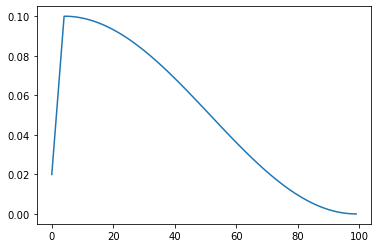

In [6]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 60 % drop

In [7]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.65)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.9523393434026968	Top1 Acc: 0.34535999998092654


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.540271321429482	Top1 Acc: 0.3923


Epoch-1-:   1%|▏         | 5/391 [00:00<01:11,  5.40it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.939566692732789	Top1 Acc: 0.49228000001907346


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.3501934220519245	Top1 Acc: 0.4135


Epoch-2-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9109297158468106	Top1 Acc: 0.49512000001907347


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.1552190916447698	Top1 Acc: 0.4566


Epoch-3-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.8780294053085016	Top1 Acc: 0.5037199999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.3311456366430354	Top1 Acc: 0.4234


Epoch-4-:   2%|▏         | 6/391 [00:00<01:21,  4.74it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8662794980856463	Top1 Acc: 0.504520000038147


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.208200970782509	Top1 Acc: 0.4456


Epoch-5-:   2%|▏         | 6/391 [00:00<01:19,  4.85it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.8334000479534764	Top1 Acc: 0.511460000038147


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.136735781838622	Top1 Acc: 0.461


Epoch-6-:   2%|▏         | 6/391 [00:00<01:23,  4.64it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7602750529413638	Top1 Acc: 0.5262399999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.8608441775358175	Top1 Acc: 0.5109


Epoch-7-:   2%|▏         | 6/391 [00:00<01:22,  4.66it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7137713179259044	Top1 Acc: 0.5369999999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0813336357285706	Top1 Acc: 0.4697


Epoch-8-:   1%|▏         | 5/391 [00:00<01:23,  4.63it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6990735838785196	Top1 Acc: 0.5420000000572205


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9459752146201799	Top1 Acc: 0.4998


Epoch-9-:   2%|▏         | 6/391 [00:00<01:10,  5.46it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6813996225366812	Top1 Acc: 0.5458200000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.0465565738798697	Top1 Acc: 0.4802


Epoch-10-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6649025949980596	Top1 Acc: 0.5490400000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9918192911751662	Top1 Acc: 0.4893


Epoch-11-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.657824826972259	Top1 Acc: 0.5491400000286102


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9469724818121028	Top1 Acc: 0.4983


Epoch-12-:   2%|▏         | 6/391 [00:00<01:20,  4.75it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6481994860007634	Top1 Acc: 0.5539600000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.200928002973146	Top1 Acc: 0.4461


Epoch-13-:   2%|▏         | 6/391 [00:00<01:19,  4.84it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.631772100773004	Top1 Acc: 0.556080000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.8829551527771768	Top1 Acc: 0.503


Epoch-14-:   2%|▏         | 6/391 [00:00<01:18,  4.92it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6347323153025048	Top1 Acc: 0.5562200000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8706151760077174	Top1 Acc: 0.5126


Epoch-15-:   2%|▏         | 6/391 [00:00<01:20,  4.76it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6218869963570324	Top1 Acc: 0.5614999999904633


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.874804216095164	Top1 Acc: 0.5072


Epoch-16-:   2%|▏         | 6/391 [00:00<01:23,  4.60it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.610694890741802	Top1 Acc: 0.5601199999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.959502736224404	Top1 Acc: 0.5012


Epoch-17-:   2%|▏         | 6/391 [00:00<01:12,  5.28it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.615247430703829	Top1 Acc: 0.558480000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.979023329819305	Top1 Acc: 0.4903


Epoch-18-:   2%|▏         | 6/391 [00:00<01:11,  5.40it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.596347872253574	Top1 Acc: 0.5665000000572205


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.960156422627123	Top1 Acc: 0.4851


Epoch-19-:   1%|▏         | 5/391 [00:00<01:16,  5.05it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.58888193256105	Top1 Acc: 0.5657200000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.9188635998134371	Top1 Acc: 0.4996


Epoch-20-:   2%|▏         | 6/391 [00:00<01:24,  4.54it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.582033732053264	Top1 Acc: 0.5696400000190734


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8884854859943632	Top1 Acc: 0.5105


Epoch-21-:   2%|▏         | 6/391 [00:00<01:20,  4.79it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5689345564683685	Top1 Acc: 0.5725


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.0271235040471525	Top1 Acc: 0.4911


Epoch-22-:   2%|▏         | 6/391 [00:00<01:22,  4.65it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5695140944112598	Top1 Acc: 0.571840000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.801009255119517	Top1 Acc: 0.5203


Epoch-23-:   2%|▏         | 6/391 [00:00<01:27,  4.38it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5550433272291022	Top1 Acc: 0.5748


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8678374894057648	Top1 Acc: 0.5177


Epoch-24-:   2%|▏         | 6/391 [00:00<01:12,  5.29it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5492941644185645	Top1 Acc: 0.57708


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.7886174072193195	Top1 Acc: 0.529


Epoch-25-:   2%|▏         | 6/391 [00:00<01:24,  4.58it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.544134279346222	Top1 Acc: 0.5762800000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.00923902626279	Top1 Acc: 0.4863


Epoch-26-:   1%|▏         | 5/391 [00:00<01:17,  4.96it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5291128804921494	Top1 Acc: 0.5802000000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8900554089606563	Top1 Acc: 0.5094


Epoch-27-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.515237234437557	Top1 Acc: 0.5837599999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 2.031469286242618	Top1 Acc: 0.487


Epoch-28-:   1%|▏         | 5/391 [00:00<01:09,  5.56it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.5102527047057286	Top1 Acc: 0.5859600000286103


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.951856809326365	Top1 Acc: 0.4968


Epoch-29-:   2%|▏         | 6/391 [00:00<01:21,  4.72it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.5044121995301503	Top1 Acc: 0.5857800000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 2.1748814386657522	Top1 Acc: 0.4644


Epoch-30-:   2%|▏         | 6/391 [00:00<01:17,  4.99it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4966028312892865	Top1 Acc: 0.5871200000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 2.1613542490367648	Top1 Acc: 0.4699


Epoch-31-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.481625734082878	Top1 Acc: 0.5900799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7551897296422645	Top1 Acc: 0.5366


Epoch-32-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4636004327813072	Top1 Acc: 0.5973599999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8314505800416199	Top1 Acc: 0.5223


Epoch-33-:   2%|▏         | 6/391 [00:00<01:16,  5.03it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.453299873625226	Top1 Acc: 0.5973000000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.6711076196235946	Top1 Acc: 0.5547


Epoch-34-:   2%|▏         | 6/391 [00:00<01:17,  4.97it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4424599384712746	Top1 Acc: 0.6031600000190734


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.80258276945428	Top1 Acc: 0.5344


Epoch-35-:   2%|▏         | 6/391 [00:00<01:17,  4.98it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4443841697005055	Top1 Acc: 0.5995400000572204


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7874825468546227	Top1 Acc: 0.5399


Epoch-36-:   2%|▏         | 6/391 [00:00<01:11,  5.38it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4242800946735665	Top1 Acc: 0.6047600000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6642297355434563	Top1 Acc: 0.5586


Epoch-37-:   1%|▏         | 5/391 [00:00<01:10,  5.50it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.409263266017065	Top1 Acc: 0.6074199999809266


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.984885547734514	Top1 Acc: 0.4993


Epoch-38-:   2%|▏         | 6/391 [00:00<01:20,  4.81it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.4002702414532147	Top1 Acc: 0.6120200000381469


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6973517242866227	Top1 Acc: 0.5503


Epoch-39-:   2%|▏         | 6/391 [00:00<01:22,  4.69it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3762765083166644	Top1 Acc: 0.6187600000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6613604796083667	Top1 Acc: 0.5566


Epoch-40-:   2%|▏         | 6/391 [00:00<01:09,  5.54it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3654481119207105	Top1 Acc: 0.61894


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.8742905508113812	Top1 Acc: 0.5279


Epoch-41-:   2%|▏         | 6/391 [00:00<01:24,  4.56it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3579478452882499	Top1 Acc: 0.61892


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7150700409201127	Top1 Acc: 0.5574


Epoch-42-:   1%|▏         | 5/391 [00:00<01:12,  5.34it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3374738723725614	Top1 Acc: 0.6263399999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8738028754161884	Top1 Acc: 0.5188


Epoch-43-:   1%|▏         | 5/391 [00:00<01:14,  5.21it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3181627926314274	Top1 Acc: 0.62946


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.709421975703179	Top1 Acc: 0.5535


Epoch-44-:   2%|▏         | 6/391 [00:00<01:14,  5.20it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.3108157832604235	Top1 Acc: 0.63478


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7403310537338257	Top1 Acc: 0.5498


Epoch-45-:   2%|▏         | 6/391 [00:00<01:34,  4.08it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2854815541630815	Top1 Acc: 0.6389199999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5217034741293025	Top1 Acc: 0.5894


Epoch-46-:   2%|▏         | 6/391 [00:00<01:22,  4.68it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2701143851060697	Top1 Acc: 0.6450399999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7388496293297298	Top1 Acc: 0.5474


Epoch-47-:   1%|▏         | 5/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.256095690038198	Top1 Acc: 0.6444200000572204


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5731236074544206	Top1 Acc: 0.5851


Epoch-48-:   1%|▏         | 5/391 [00:00<01:13,  5.28it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.246021243922241	Top1 Acc: 0.6486599999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6270480623728112	Top1 Acc: 0.5677


Epoch-49-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2241969773226686	Top1 Acc: 0.6511400000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.7085069251965872	Top1 Acc: 0.5556


Epoch-50-:   2%|▏         | 6/391 [00:00<01:22,  4.68it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2025077160057205	Top1 Acc: 0.659800000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.708989463274992	Top1 Acc: 0.5588


Epoch-51-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1894404897299569	Top1 Acc: 0.6621000000190734


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6640679383579688	Top1 Acc: 0.5688


Epoch-52-:   2%|▏         | 6/391 [00:00<01:16,  5.02it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1691456722176594	Top1 Acc: 0.6668600000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7451411651659616	Top1 Acc: 0.5571


Epoch-53-:   2%|▏         | 6/391 [00:00<01:12,  5.32it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1555528976118472	Top1 Acc: 0.6702399999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6199319739884968	Top1 Acc: 0.5758


Epoch-54-:   2%|▏         | 6/391 [00:00<01:22,  4.68it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1275661741681111	Top1 Acc: 0.6757200000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.4944713719283478	Top1 Acc: 0.6005


Epoch-55-:   2%|▏         | 6/391 [00:00<01:09,  5.50it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.1104524955725121	Top1 Acc: 0.6829600000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5559965870048427	Top1 Acc: 0.587


Epoch-56-:   2%|▏         | 6/391 [00:00<01:24,  4.57it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0928135527979077	Top1 Acc: 0.6860800000190734


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5447381900835642	Top1 Acc: 0.5967


Epoch-57-:   1%|▏         | 5/391 [00:00<01:23,  4.64it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0625042025085605	Top1 Acc: 0.6935400000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.594816366328469	Top1 Acc: 0.5827


Epoch-58-:   1%|          | 4/391 [00:00<01:37,  3.96it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0508015631409862	Top1 Acc: 0.697460000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.4487027186381667	Top1 Acc: 0.6202


Epoch-59-:   1%|▏         | 5/391 [00:00<01:41,  3.79it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0207254433875803	Top1 Acc: 0.703460000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4830057862438732	Top1 Acc: 0.6162


Epoch-60-:   2%|▏         | 6/391 [00:00<01:28,  4.37it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.003007786658109	Top1 Acc: 0.7077799999809266


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5877055442785915	Top1 Acc: 0.5925


Epoch-61-:   2%|▏         | 6/391 [00:00<01:22,  4.67it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9714282452297942	Top1 Acc: 0.71796


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4741606003121486	Top1 Acc: 0.6142


Epoch-62-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9467154183351171	Top1 Acc: 0.723620000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4003112165233758	Top1 Acc: 0.6291


Epoch-63-:   2%|▏         | 6/391 [00:00<01:20,  4.80it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9237555823362696	Top1 Acc: 0.729320000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.400191666204718	Top1 Acc: 0.632


Epoch-64-:   1%|▏         | 5/391 [00:00<01:32,  4.16it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.89590512791558	Top1 Acc: 0.7358000000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4432340000249162	Top1 Acc: 0.6187


Epoch-65-:   2%|▏         | 6/391 [00:00<01:29,  4.29it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8703629104682552	Top1 Acc: 0.7437599999809266


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4687824815134458	Top1 Acc: 0.6163


Epoch-66-:   2%|▏         | 6/391 [00:00<01:28,  4.35it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8404566241652155	Top1 Acc: 0.7510199999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4145853896684284	Top1 Acc: 0.6372


Epoch-67-:   2%|▏         | 6/391 [00:00<01:22,  4.64it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8092743831369883	Top1 Acc: 0.76024


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4091830034799213	Top1 Acc: 0.6405


Epoch-68-:   2%|▏         | 6/391 [00:00<01:22,  4.67it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7791390827549692	Top1 Acc: 0.7669200000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3793890302694296	Top1 Acc: 0.6446


Epoch-69-:   2%|▏         | 6/391 [00:00<01:28,  4.36it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7572440600303738	Top1 Acc: 0.7714199999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.463482739050177	Top1 Acc: 0.634


Epoch-70-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7211647504735785	Top1 Acc: 0.7821200000190734


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4653247504294673	Top1 Acc: 0.629


Epoch-71-:   2%|▏         | 6/391 [00:00<01:21,  4.73it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6930215370167246	Top1 Acc: 0.789680000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.4421147545681725	Top1 Acc: 0.6345


Epoch-72-:   1%|▏         | 5/391 [00:00<01:19,  4.86it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6618834774360023	Top1 Acc: 0.7976800000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.341018497189389	Top1 Acc: 0.6607


Epoch-73-:   1%|▏         | 5/391 [00:00<01:22,  4.66it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6221403811136474	Top1 Acc: 0.80936


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.340164710449267	Top1 Acc: 0.6604


Epoch-74-:   2%|▏         | 6/391 [00:00<01:21,  4.71it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5984935489914301	Top1 Acc: 0.8151800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3368979134137118	Top1 Acc: 0.6649


Epoch-75-:   2%|▏         | 6/391 [00:00<01:17,  4.97it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5588441417192864	Top1 Acc: 0.8272600000381469


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3687629111205475	Top1 Acc: 0.6586


Epoch-76-:   2%|▏         | 6/391 [00:00<01:17,  4.95it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5243321356870939	Top1 Acc: 0.8364600000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.384067182299457	Top1 Acc: 0.66


Epoch-77-:   2%|▏         | 6/391 [00:00<01:24,  4.54it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4820312316460378	Top1 Acc: 0.85016


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3337166407440282	Top1 Acc: 0.6755


Epoch-78-:   2%|▏         | 6/391 [00:00<01:16,  5.00it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.4579822520923127	Top1 Acc: 0.8556200000572205


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3306347184543368	Top1 Acc: 0.6746


Epoch-79-:   1%|▏         | 5/391 [00:00<01:16,  5.06it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.41698323529394693	Top1 Acc: 0.869620000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3233453442778769	Top1 Acc: 0.6813


Epoch-80-:   2%|▏         | 6/391 [00:00<01:14,  5.20it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.38621192271142357	Top1 Acc: 0.8775199999809266


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3713351797453965	Top1 Acc: 0.6735


Epoch-81-:   2%|▏         | 6/391 [00:00<01:16,  5.04it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.35170650158239447	Top1 Acc: 0.8891600000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3316081203991854	Top1 Acc: 0.6878


Epoch-82-:   2%|▏         | 6/391 [00:00<01:13,  5.21it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3151629716539017	Top1 Acc: 0.89962


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3257440615303908	Top1 Acc: 0.6884


Epoch-83-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.28681556474598474	Top1 Acc: 0.9088400000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3302796694296826	Top1 Acc: 0.6911


Epoch-84-:   2%|▏         | 6/391 [00:00<01:24,  4.54it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24845283387033532	Top1 Acc: 0.9209000000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3211405058450336	Top1 Acc: 0.697


Epoch-85-:   1%|▏         | 5/391 [00:00<01:07,  5.75it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2293151550547546	Top1 Acc: 0.926600000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3351798314082473	Top1 Acc: 0.6977


Epoch-86-:   2%|▏         | 6/391 [00:00<01:20,  4.79it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.2014147286944072	Top1 Acc: 0.9373400000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3262359356578393	Top1 Acc: 0.7027


Epoch-87-:   2%|▏         | 6/391 [00:00<01:19,  4.87it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17564808653519892	Top1 Acc: 0.94498


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3292523177364204	Top1 Acc: 0.7059


Epoch-88-:   2%|▏         | 6/391 [00:00<01:22,  4.66it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.14998287439841748	Top1 Acc: 0.953


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3258515226690075	Top1 Acc: 0.707


Epoch-89-:   1%|▏         | 5/391 [00:00<01:23,  4.62it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.13297855522474059	Top1 Acc: 0.959120000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3395106935802894	Top1 Acc: 0.7105


Epoch-90-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.1192532508441097	Top1 Acc: 0.96392


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3428255576121657	Top1 Acc: 0.7078


Epoch-91-:   2%|▏         | 6/391 [00:00<01:12,  5.29it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.10958169871355261	Top1 Acc: 0.966600000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3543183909186833	Top1 Acc: 0.7128


Epoch-92-:   2%|▏         | 6/391 [00:00<01:23,  4.60it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.1027389262776698	Top1 Acc: 0.97008


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3503705889363833	Top1 Acc: 0.7152


Epoch-93-:   2%|▏         | 6/391 [00:00<01:12,  5.33it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.09148790724003864	Top1 Acc: 0.9729800000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3398832180832005	Top1 Acc: 0.7152


Epoch-94-:   1%|▏         | 5/391 [00:00<01:40,  3.83it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.0860021226775006	Top1 Acc: 0.975260000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3456792461721203	Top1 Acc: 0.7139


Epoch-95-:   1%|▏         | 5/391 [00:00<01:42,  3.75it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08248146274662993	Top1 Acc: 0.9757800000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3354078885875171	Top1 Acc: 0.7147


Epoch-96-:   2%|▏         | 6/391 [00:00<01:30,  4.25it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.0838300735044205	Top1 Acc: 0.9758000000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3359005903895897	Top1 Acc: 0.7148


Epoch-97-:   1%|▏         | 5/391 [00:00<01:25,  4.52it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07554868404346202	Top1 Acc: 0.9782800000190734


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3401349941386451	Top1 Acc: 0.7142


Epoch-98-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07841762218176557	Top1 Acc: 0.97786


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3361254922951324	Top1 Acc: 0.7141


Epoch-99-:   1%|▏         | 5/391 [00:00<01:21,  4.74it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07789964319380653	Top1 Acc: 0.9769600000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 77.29it/s]


Validation results at epoch-99 | loss: 1.3405952498882632	Top1 Acc: 0.7153
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Epoch-0-:   1%|▏         | 5/391 [00:00<01:25,  4.53it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.9301752730098833	Top1 Acc: 0.3502800000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.7896400991874404	Top1 Acc: 0.3751


Epoch-1-:   2%|▏         | 6/391 [00:00<01:23,  4.63it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.936256006855489	Top1 Acc: 0.4929200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.2313848779171326	Top1 Acc: 0.4459


Epoch-2-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.915849599691913	Top1 Acc: 0.4927000000572205


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.259992747367183	Top1 Acc: 0.4273


Epoch-3-:   1%|▏         | 5/391 [00:00<01:28,  4.37it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.8735624792630716	Top1 Acc: 0.5032400000572205


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.3008484342430213	Top1 Acc: 0.4218


Epoch-4-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8702835582406319	Top1 Acc: 0.5030400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.1912492589105534	Top1 Acc: 0.4411


Epoch-5-:   1%|▏         | 5/391 [00:00<01:25,  4.54it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.8236586776230952	Top1 Acc: 0.5125000000286102


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.13586621344844	Top1 Acc: 0.4622


Epoch-6-:   2%|▏         | 6/391 [00:00<01:30,  4.26it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7613617440928584	Top1 Acc: 0.5261199999904632


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.145360564883751	Top1 Acc: 0.443


Epoch-7-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7273782189849698	Top1 Acc: 0.53264


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.034545175636871	Top1 Acc: 0.4818


Epoch-8-:   2%|▏         | 6/391 [00:00<01:20,  4.76it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.7085049268229844	Top1 Acc: 0.5396000000572204


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.9627261357971384	Top1 Acc: 0.4836


Epoch-9-:   1%|▏         | 5/391 [00:00<01:13,  5.27it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6844169468526036	Top1 Acc: 0.5439400000572204


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9207360005076928	Top1 Acc: 0.4993


Epoch-10-:   2%|▏         | 6/391 [00:00<01:20,  4.80it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6673355721451741	Top1 Acc: 0.54888


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.074406749085535	Top1 Acc: 0.4753


Epoch-11-:   2%|▏         | 6/391 [00:00<01:18,  4.92it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.654719111254758	Top1 Acc: 0.554420000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.903461676609667	Top1 Acc: 0.506


Epoch-12-:   2%|▏         | 6/391 [00:00<01:15,  5.10it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.642537251762722	Top1 Acc: 0.5532000000190734


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.964702939685387	Top1 Acc: 0.4922


Epoch-13-:   2%|▏         | 6/391 [00:00<01:26,  4.44it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6340102844530968	Top1 Acc: 0.5547000000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.9737820142432103	Top1 Acc: 0.487


Epoch-14-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6312450951017687	Top1 Acc: 0.5567000000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.926915340785739	Top1 Acc: 0.5042


Epoch-15-:   2%|▏         | 6/391 [00:00<01:16,  5.02it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.624283999738181	Top1 Acc: 0.5572199999904632


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.186498752123193	Top1 Acc: 0.4649


Epoch-16-:   2%|▏         | 6/391 [00:00<01:21,  4.74it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6080667759146532	Top1 Acc: 0.564120000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8503653580629373	Top1 Acc: 0.5085


Epoch-17-:   2%|▏         | 6/391 [00:00<01:25,  4.48it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.609298225558932	Top1 Acc: 0.5628399999809265


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.049134800705729	Top1 Acc: 0.4823


Epoch-18-:   2%|▏         | 6/391 [00:00<01:38,  3.93it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5916573979970439	Top1 Acc: 0.5645000000381469


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9748088860813575	Top1 Acc: 0.4977


Epoch-19-:   1%|▏         | 5/391 [00:00<01:13,  5.29it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.6003314500574566	Top1 Acc: 0.5622200000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.8227885584288006	Top1 Acc: 0.5169


Epoch-20-:   2%|▏         | 6/391 [00:00<01:13,  5.20it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5720642890466754	Top1 Acc: 0.5698


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.876359678521941	Top1 Acc: 0.5086


Epoch-21-:   2%|▏         | 6/391 [00:00<01:27,  4.38it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5740413120030747	Top1 Acc: 0.570880000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8036520752725722	Top1 Acc: 0.5268


Epoch-22-:   2%|▏         | 6/391 [00:00<01:26,  4.48it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5693713838182142	Top1 Acc: 0.5709399999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.8084088443200799	Top1 Acc: 0.5327


Epoch-23-:   2%|▏         | 6/391 [00:00<01:15,  5.12it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5617540086931585	Top1 Acc: 0.5723400000286102


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.038150459905214	Top1 Acc: 0.4949


Epoch-24-:   2%|▏         | 6/391 [00:00<01:21,  4.70it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5468515413801383	Top1 Acc: 0.5754000000286102


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8654223982291886	Top1 Acc: 0.5143


Epoch-25-:   2%|▏         | 6/391 [00:00<01:12,  5.33it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5296130107186945	Top1 Acc: 0.578580000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.08346296714831	Top1 Acc: 0.4772


Epoch-26-:   1%|▏         | 5/391 [00:00<01:21,  4.75it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5324060721775454	Top1 Acc: 0.5799


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8117434631420086	Top1 Acc: 0.5166


Epoch-27-:   2%|▏         | 6/391 [00:00<01:14,  5.18it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5193176449412276	Top1 Acc: 0.5833800000381469


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8635891238345375	Top1 Acc: 0.5172


Epoch-28-:   2%|▏         | 6/391 [00:00<01:32,  4.17it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.5097033419572483	Top1 Acc: 0.58774


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8727947896039938	Top1 Acc: 0.5099


Epoch-29-:   2%|▏         | 6/391 [00:00<01:25,  4.49it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.5026511700866778	Top1 Acc: 0.5866000000095367


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8775766680512247	Top1 Acc: 0.5015


Epoch-30-:   2%|▏         | 6/391 [00:00<01:11,  5.37it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4994134290139083	Top1 Acc: 0.585960000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.877697159972372	Top1 Acc: 0.5003


Epoch-31-:   2%|▏         | 6/391 [00:00<01:19,  4.86it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4762232599355984	Top1 Acc: 0.5929399999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.7365771758405468	Top1 Acc: 0.5341


Epoch-32-:   2%|▏         | 6/391 [00:00<01:25,  4.49it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4756017706888107	Top1 Acc: 0.5906799999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.894945372509051	Top1 Acc: 0.5147


Epoch-33-:   1%|▏         | 5/391 [00:00<01:16,  5.04it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4614808184411519	Top1 Acc: 0.5953400000572204


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9033554928212226	Top1 Acc: 0.5102


Epoch-34-:   2%|▏         | 6/391 [00:00<01:11,  5.36it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.435938419131062	Top1 Acc: 0.6015400000572204


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.8501188981382153	Top1 Acc: 0.5139


Epoch-35-:   2%|▏         | 6/391 [00:00<01:22,  4.68it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4309853396147414	Top1 Acc: 0.6026200000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.6650354334070712	Top1 Acc: 0.5552


Epoch-36-:   2%|▏         | 6/391 [00:00<01:19,  4.87it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4139033220613095	Top1 Acc: 0.6085


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.8119785091545009	Top1 Acc: 0.525


Epoch-37-:   2%|▏         | 6/391 [00:00<01:18,  4.93it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.4037934380114232	Top1 Acc: 0.611620000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.6518167378027229	Top1 Acc: 0.5596


Epoch-38-:   2%|▏         | 6/391 [00:00<01:23,  4.63it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.3919413661407998	Top1 Acc: 0.6118400000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.6709081523026093	Top1 Acc: 0.5558


Epoch-39-:   2%|▏         | 6/391 [00:00<01:13,  5.21it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3765851071728465	Top1 Acc: 0.6143200000572204


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6830853993379618	Top1 Acc: 0.5537


Epoch-40-:   1%|▏         | 5/391 [00:00<01:12,  5.32it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3664011552815547	Top1 Acc: 0.6220199999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.756693755524068	Top1 Acc: 0.5418


Epoch-41-:   1%|▏         | 5/391 [00:00<01:14,  5.21it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3546875306712391	Top1 Acc: 0.6224400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.678389544728436	Top1 Acc: 0.5539


Epoch-42-:   2%|▏         | 6/391 [00:00<01:34,  4.07it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3390136097398255	Top1 Acc: 0.6251600000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7050110644932035	Top1 Acc: 0.5522


Epoch-43-:   1%|▏         | 5/391 [00:00<01:14,  5.17it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3211134769727506	Top1 Acc: 0.631520000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6033444389512268	Top1 Acc: 0.5752


Epoch-44-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.3115398185637297	Top1 Acc: 0.6316200000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.676622220232517	Top1 Acc: 0.5626


Epoch-45-:   2%|▏         | 6/391 [00:00<01:35,  4.02it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2832879829589667	Top1 Acc: 0.6386800000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6259004375602626	Top1 Acc: 0.5701


Epoch-46-:   2%|▏         | 6/391 [00:00<01:06,  5.81it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2778042344486011	Top1 Acc: 0.639480000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7408181436454193	Top1 Acc: 0.5444


Epoch-47-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2626741458387936	Top1 Acc: 0.64296


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6168558205230326	Top1 Acc: 0.5721


Epoch-48-:   2%|▏         | 6/391 [00:00<01:07,  5.69it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2380331490960572	Top1 Acc: 0.65092


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6418744099291065	Top1 Acc: 0.565


Epoch-49-:   2%|▏         | 6/391 [00:00<01:38,  3.92it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.225245625771525	Top1 Acc: 0.650920000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.656393933899795	Top1 Acc: 0.5624


Epoch-50-:   1%|▏         | 5/391 [00:00<01:18,  4.90it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2138087122946444	Top1 Acc: 0.6564199999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.6505518246300612	Top1 Acc: 0.5714


Epoch-51-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1852480182257454	Top1 Acc: 0.66468


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5550764225706268	Top1 Acc: 0.5855


Epoch-52-:   2%|▏         | 6/391 [00:00<01:12,  5.29it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1735679100236625	Top1 Acc: 0.6646000000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6245697314226175	Top1 Acc: 0.5764


Epoch-53-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1457072837883249	Top1 Acc: 0.67424


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5952546189102945	Top1 Acc: 0.5849


Epoch-54-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1305955683483797	Top1 Acc: 0.6734000000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5000443473646912	Top1 Acc: 0.6056


Epoch-55-:   2%|▏         | 6/391 [00:00<01:13,  5.23it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.1049073968092193	Top1 Acc: 0.6824599999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.4802685455430913	Top1 Acc: 0.6046


Epoch-56-:   1%|▏         | 5/391 [00:00<01:11,  5.39it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0907736018185725	Top1 Acc: 0.68742


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.563178071492835	Top1 Acc: 0.5945


Epoch-57-:   2%|▏         | 6/391 [00:00<01:23,  4.63it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0716849934414525	Top1 Acc: 0.6908


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5049277030968968	Top1 Acc: 0.5977


Epoch-58-:   2%|▏         | 6/391 [00:00<01:25,  4.48it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0471265744370268	Top1 Acc: 0.6980600000381469


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5333926013753385	Top1 Acc: 0.6022


Epoch-59-:   2%|▏         | 6/391 [00:00<01:21,  4.71it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0198741401247966	Top1 Acc: 0.7040400000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4678697427616845	Top1 Acc: 0.6129


Epoch-60-:   2%|▏         | 6/391 [00:00<01:06,  5.82it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9929742604265432	Top1 Acc: 0.7111799999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.437172851985014	Top1 Acc: 0.6181


Epoch-61-:   2%|▏         | 6/391 [00:00<01:17,  4.96it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9701602160168425	Top1 Acc: 0.7175999999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.490490435799466	Top1 Acc: 0.6102


Epoch-62-:   2%|▏         | 6/391 [00:00<01:15,  5.09it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.943349854720523	Top1 Acc: 0.7239200000381469


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.405436500718322	Top1 Acc: 0.6236


Epoch-63-:   2%|▏         | 6/391 [00:00<01:13,  5.20it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9224637063872784	Top1 Acc: 0.73024


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4702639285522172	Top1 Acc: 0.6263


Epoch-64-:   2%|▏         | 6/391 [00:00<01:10,  5.43it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.9011905649129082	Top1 Acc: 0.7331999999809266


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4522818115693104	Top1 Acc: 0.6213


Epoch-65-:   2%|▏         | 6/391 [00:00<01:29,  4.30it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.874129838193469	Top1 Acc: 0.7407


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3823819681058955	Top1 Acc: 0.6337


Epoch-66-:   2%|▏         | 6/391 [00:00<01:22,  4.67it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8385793318224075	Top1 Acc: 0.7519800000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3830046382131456	Top1 Acc: 0.6363


Epoch-67-:   2%|▏         | 6/391 [00:00<01:16,  5.01it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8135706386755189	Top1 Acc: 0.75618


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3651190294495112	Top1 Acc: 0.64


Epoch-68-:   2%|▏         | 6/391 [00:00<01:25,  4.51it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.783666087233502	Top1 Acc: 0.7633200000381469


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.360421133946769	Top1 Acc: 0.6461


Epoch-69-:   1%|▏         | 5/391 [00:00<01:21,  4.76it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7507520620627781	Top1 Acc: 0.7749600000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4458108046386815	Top1 Acc: 0.63


Epoch-70-:   2%|▏         | 6/391 [00:00<02:04,  3.10it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7274057215741833	Top1 Acc: 0.7815000000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3487391336054741	Top1 Acc: 0.654


Epoch-71-:   1%|          | 4/391 [00:00<02:05,  3.08it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6886812925643628	Top1 Acc: 0.7903000000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.376795436008067	Top1 Acc: 0.6476


Epoch-72-:   2%|▏         | 6/391 [00:00<01:59,  3.22it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6650053519574578	Top1 Acc: 0.7975599999809265


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3379306906386266	Top1 Acc: 0.6532


Epoch-73-:   1%|▏         | 5/391 [00:00<01:56,  3.32it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6245697626982198	Top1 Acc: 0.8084000000381469


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.470306998566736	Top1 Acc: 0.6365


Epoch-74-:   2%|▏         | 6/391 [00:00<01:44,  3.69it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.594703144353369	Top1 Acc: 0.81804


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.4017278333253498	Top1 Acc: 0.653


Epoch-75-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5614658034670993	Top1 Acc: 0.8272000000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3378979012935976	Top1 Acc: 0.6647


Epoch-76-:   1%|▏         | 5/391 [00:00<01:17,  5.00it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5291176968065979	Top1 Acc: 0.8373800000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3342259473438505	Top1 Acc: 0.6706


Epoch-77-:   2%|▏         | 6/391 [00:00<01:19,  4.86it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4878802337609898	Top1 Acc: 0.8490599999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3135569623753995	Top1 Acc: 0.6759


Epoch-78-:   2%|▏         | 6/391 [00:00<01:26,  4.44it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.4554908450530923	Top1 Acc: 0.855600000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3537962097155898	Top1 Acc: 0.67


Epoch-79-:   2%|▏         | 6/391 [00:00<01:14,  5.14it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.4176711511352788	Top1 Acc: 0.8686999999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3029706214047685	Top1 Acc: 0.6826


Epoch-80-:   1%|▏         | 5/391 [00:00<01:10,  5.47it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3823279640863619	Top1 Acc: 0.880040000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.321545807621147	Top1 Acc: 0.6845


Epoch-81-:   1%|▏         | 5/391 [00:00<01:10,  5.46it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3493365548227144	Top1 Acc: 0.8893400000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3321686522870124	Top1 Acc: 0.6864


Epoch-82-:   2%|▏         | 6/391 [00:00<01:23,  4.59it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3068062136773868	Top1 Acc: 0.9015600000190734


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3378724802898456	Top1 Acc: 0.6894


Epoch-83-:   2%|▏         | 6/391 [00:00<01:29,  4.32it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2826027708971287	Top1 Acc: 0.9099


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3445017435882665	Top1 Acc: 0.6922


Epoch-84-:   2%|▏         | 6/391 [00:00<01:16,  5.02it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.2482584203829241	Top1 Acc: 0.9212999999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3272180564795868	Top1 Acc: 0.6985


Epoch-85-:   2%|▏         | 6/391 [00:00<01:20,  4.79it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2281937078213143	Top1 Acc: 0.9264000000572205


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3448347015471398	Top1 Acc: 0.6962


Epoch-86-:   2%|▏         | 6/391 [00:00<01:26,  4.43it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.20249274475952547	Top1 Acc: 0.9359200000572204


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3613981830922863	Top1 Acc: 0.7017


Epoch-87-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17528331068241992	Top1 Acc: 0.9448599999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3307141623919523	Top1 Acc: 0.7059


Epoch-88-:   2%|▏         | 6/391 [00:00<01:23,  4.61it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.15714658149863447	Top1 Acc: 0.951200000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3307158577291271	Top1 Acc: 0.707


Epoch-89-:   2%|▏         | 6/391 [00:00<01:19,  4.83it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.13936592519397625	Top1 Acc: 0.956900000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3414603132235854	Top1 Acc: 0.7083


Epoch-90-:   2%|▏         | 6/391 [00:00<01:20,  4.79it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12295650773684082	Top1 Acc: 0.9625199999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3370032499108133	Top1 Acc: 0.717


Epoch-91-:   2%|▏         | 6/391 [00:00<01:17,  4.95it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.1129541876713943	Top1 Acc: 0.965440000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3497508892530128	Top1 Acc: 0.7113


Epoch-92-:   2%|▏         | 6/391 [00:00<01:03,  6.03it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.09989282142494799	Top1 Acc: 0.97068


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3511104425297509	Top1 Acc: 0.7173


Epoch-93-:   1%|▏         | 5/391 [00:00<01:34,  4.07it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.0944199163723937	Top1 Acc: 0.9725200000572205


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3583298272724393	Top1 Acc: 0.7148


Epoch-94-:   2%|▏         | 6/391 [00:00<01:24,  4.58it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08728843054179188	Top1 Acc: 0.974860000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3500972820233694	Top1 Acc: 0.7135


Epoch-95-:   2%|▏         | 6/391 [00:00<01:15,  5.11it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.0824931006678535	Top1 Acc: 0.976100000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3426303923884524	Top1 Acc: 0.7161


Epoch-96-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07886871886070428	Top1 Acc: 0.977200000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3462669291073763	Top1 Acc: 0.715


Epoch-97-:   1%|▏         | 5/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07527858049363431	Top1 Acc: 0.9786400000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.34856354360339	Top1 Acc: 0.7151


Epoch-98-:   2%|▏         | 6/391 [00:00<01:23,  4.59it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07609365635153735	Top1 Acc: 0.9779000000381469


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3489645636534389	Top1 Acc: 0.7144


Epoch-99-:   2%|▏         | 6/391 [00:00<01:22,  4.66it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07645927610642769	Top1 Acc: 0.97754


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 77.44it/s]


Validation results at epoch-99 | loss: 1.3433315950103952	Top1 Acc: 0.7145
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Epoch-0-:   1%|▏         | 5/391 [00:00<01:28,  4.36it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.9323531273380876	Top1 Acc: 0.35416000002861026


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.323458143427402	Top1 Acc: 0.3076


Epoch-1-:   1%|          | 4/391 [00:00<01:17,  5.00it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.9464800391355743	Top1 Acc: 0.48933999999046324


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.33623808848707	Top1 Acc: 0.4222


Epoch-2-:   2%|▏         | 6/391 [00:00<01:29,  4.32it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9120287504952278	Top1 Acc: 0.49318


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.7364438485495652	Top1 Acc: 0.3641


Epoch-3-:   2%|▏         | 6/391 [00:00<01:15,  5.13it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.8839208530952862	Top1 Acc: 0.5015599999904633


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.2091983602016785	Top1 Acc: 0.4459


Epoch-4-:   2%|▏         | 6/391 [00:00<01:20,  4.77it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8695392230587542	Top1 Acc: 0.50274


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2170601736141156	Top1 Acc: 0.4444


Epoch-5-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.8257088219113362	Top1 Acc: 0.5104000000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.958139025712315	Top1 Acc: 0.4882


Epoch-6-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.764345055345989	Top1 Acc: 0.5276599999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9544847856594036	Top1 Acc: 0.4983


Epoch-7-:   2%|▏         | 6/391 [00:00<01:20,  4.78it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7281398898195428	Top1 Acc: 0.5323400000286103


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.8985868692398071	Top1 Acc: 0.5009


Epoch-8-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.6996240292668647	Top1 Acc: 0.5394800000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.06188932853409	Top1 Acc: 0.4768


Epoch-9-:   2%|▏         | 6/391 [00:00<01:18,  4.92it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6861053409478854	Top1 Acc: 0.5421000000190734


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.036642875852464	Top1 Acc: 0.4824


Epoch-10-:   2%|▏         | 6/391 [00:00<01:21,  4.73it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6686708134458499	Top1 Acc: 0.544040000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.8892871065984798	Top1 Acc: 0.5073


Epoch-11-:   1%|▏         | 5/391 [00:00<01:23,  4.62it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6637593215078954	Top1 Acc: 0.5486400000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9700676112235347	Top1 Acc: 0.4984


Epoch-12-:   1%|▏         | 5/391 [00:00<01:16,  5.04it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6459071102654537	Top1 Acc: 0.5522


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.0169393397584745	Top1 Acc: 0.4783


Epoch-13-:   1%|▏         | 5/391 [00:00<01:12,  5.34it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6386734235012317	Top1 Acc: 0.5548400000381469


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.936048703857615	Top1 Acc: 0.4991


Epoch-14-:   1%|▏         | 5/391 [00:00<01:19,  4.88it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.628086577291074	Top1 Acc: 0.5571400000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.000762052173856	Top1 Acc: 0.4871


Epoch-15-:   1%|▏         | 5/391 [00:00<01:13,  5.26it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.621646813724352	Top1 Acc: 0.5575599999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.318797950503192	Top1 Acc: 0.443


Epoch-16-:   2%|▏         | 6/391 [00:00<01:14,  5.16it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6132231182454493	Top1 Acc: 0.5606199999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.7744820631003078	Top1 Acc: 0.5259


Epoch-17-:   2%|▏         | 6/391 [00:00<01:16,  5.06it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.6147325444404426	Top1 Acc: 0.5603200000190734


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.8274501109425025	Top1 Acc: 0.5215


Epoch-18-:   2%|▏         | 6/391 [00:00<01:17,  4.94it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.6057491765912537	Top1 Acc: 0.5614800000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9074550248399567	Top1 Acc: 0.5077


Epoch-19-:   2%|▏         | 6/391 [00:00<01:21,  4.74it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5919031670026462	Top1 Acc: 0.5649799999904632


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.9825050212159943	Top1 Acc: 0.4884


Epoch-20-:   2%|▏         | 6/391 [00:00<01:25,  4.48it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5795099854164416	Top1 Acc: 0.56798


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.8945521221885198	Top1 Acc: 0.5042


Epoch-21-:   2%|▏         | 6/391 [00:00<01:26,  4.46it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5801120368416046	Top1 Acc: 0.566120000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.0026765669448467	Top1 Acc: 0.4819


Epoch-22-:   2%|▏         | 6/391 [00:00<01:29,  4.30it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5821747459718942	Top1 Acc: 0.5671999999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.8551043754891505	Top1 Acc: 0.5102


Epoch-23-:   2%|▏         | 6/391 [00:00<01:16,  5.01it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.560370436104972	Top1 Acc: 0.5728599999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.023396277729469	Top1 Acc: 0.4888


Epoch-24-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5459895210192942	Top1 Acc: 0.5754600000572204


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.9361014517047737	Top1 Acc: 0.5078


Epoch-25-:   2%|▏         | 6/391 [00:00<01:24,  4.57it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5395096595330007	Top1 Acc: 0.5784200000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.758983206145371	Top1 Acc: 0.5351


Epoch-26-:   1%|▏         | 5/391 [00:00<01:09,  5.53it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5385419913874867	Top1 Acc: 0.57818


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8328735692591607	Top1 Acc: 0.523


Epoch-27-:   2%|▏         | 6/391 [00:00<01:31,  4.23it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5296229032604285	Top1 Acc: 0.5795800000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8126085890999324	Top1 Acc: 0.5281


Epoch-28-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.5153867149596933	Top1 Acc: 0.5843800000381469


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8460844679723811	Top1 Acc: 0.5191


Epoch-29-:   2%|▏         | 6/391 [00:00<01:23,  4.63it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.5014423906345806	Top1 Acc: 0.5883800000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8046556726286682	Top1 Acc: 0.5198


Epoch-30-:   2%|▏         | 6/391 [00:00<01:24,  4.57it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4971038629026974	Top1 Acc: 0.58538


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.7043175772775578	Top1 Acc: 0.548


Epoch-31-:   2%|▏         | 6/391 [00:00<01:21,  4.75it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4879644017695162	Top1 Acc: 0.58948


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8729163227202017	Top1 Acc: 0.5105


Epoch-32-:   2%|▏         | 6/391 [00:00<01:19,  4.82it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4647979894867333	Top1 Acc: 0.5929399999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7001872198491157	Top1 Acc: 0.5445


Epoch-33-:   1%|▏         | 5/391 [00:00<01:19,  4.86it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4592311013385157	Top1 Acc: 0.5962599999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9469127519221245	Top1 Acc: 0.5014


Epoch-34-:   2%|▏         | 6/391 [00:00<01:35,  4.01it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4574231878875772	Top1 Acc: 0.5967000000381469


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 2.0259886904607844	Top1 Acc: 0.495


Epoch-35-:   2%|▏         | 6/391 [00:00<01:08,  5.62it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4396195658637434	Top1 Acc: 0.6003800000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.98475426963613	Top1 Acc: 0.5046


Epoch-36-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4190466618903763	Top1 Acc: 0.60678


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.6827730664724037	Top1 Acc: 0.5521


Epoch-37-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.4164841406790496	Top1 Acc: 0.6057400000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7485575525066521	Top1 Acc: 0.5424


Epoch-38-:   2%|▏         | 6/391 [00:00<01:11,  5.39it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.403753047404082	Top1 Acc: 0.608720000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.810857511773894	Top1 Acc: 0.5323


Epoch-39-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.385693373277669	Top1 Acc: 0.6144000000572205


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.802106274834162	Top1 Acc: 0.5386


Epoch-40-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3710747320023948	Top1 Acc: 0.6171400000190734


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7696028630944747	Top1 Acc: 0.5449


Epoch-41-:   2%|▏         | 6/391 [00:00<01:12,  5.30it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.35523546046918	Top1 Acc: 0.61986


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7125408996509601	Top1 Acc: 0.5454


Epoch-42-:   2%|▏         | 6/391 [00:00<01:21,  4.73it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.340563044523644	Top1 Acc: 0.6234


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6378111009356342	Top1 Acc: 0.5657


Epoch-43-:   1%|▏         | 5/391 [00:00<01:34,  4.07it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3207702043721132	Top1 Acc: 0.629860000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.742478518546382	Top1 Acc: 0.5495


Epoch-44-:   2%|▏         | 6/391 [00:00<01:15,  5.10it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.313551084922098	Top1 Acc: 0.63166


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6413394529608232	Top1 Acc: 0.5661


Epoch-45-:   2%|▏         | 6/391 [00:00<01:30,  4.25it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2976014182695648	Top1 Acc: 0.6369200000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.692370822158041	Top1 Acc: 0.5444


Epoch-46-:   2%|▏         | 6/391 [00:00<01:17,  5.00it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2824473521288704	Top1 Acc: 0.6417200000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7847077227845978	Top1 Acc: 0.5387


Epoch-47-:   1%|▏         | 5/391 [00:00<01:16,  5.03it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2622032619803154	Top1 Acc: 0.642380000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.6694722930087318	Top1 Acc: 0.5563


Epoch-48-:   1%|▏         | 5/391 [00:00<01:13,  5.28it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2414986504923047	Top1 Acc: 0.6480399999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.590243247490895	Top1 Acc: 0.5801


Epoch-49-:   2%|▏         | 6/391 [00:00<01:19,  4.82it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2245298938068283	Top1 Acc: 0.6523199999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.53543907328497	Top1 Acc: 0.5874


Epoch-50-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2060227308736737	Top1 Acc: 0.6573000000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.4755965984320338	Top1 Acc: 0.6041


Epoch-51-:   2%|▏         | 6/391 [00:00<01:12,  5.35it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1824178845071427	Top1 Acc: 0.6621400000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5462333145020883	Top1 Acc: 0.5854


Epoch-52-:   2%|▏         | 6/391 [00:00<01:15,  5.07it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1678856364296526	Top1 Acc: 0.6667400000381469


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6593993374063998	Top1 Acc: 0.5676


Epoch-53-:   2%|▏         | 6/391 [00:00<01:18,  4.90it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1540692139159687	Top1 Acc: 0.6699599999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5722421392609802	Top1 Acc: 0.5878


Epoch-54-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1341932687308172	Top1 Acc: 0.6752800000381469


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.50286343429662	Top1 Acc: 0.6025


Epoch-55-:   2%|▏         | 6/391 [00:00<01:13,  5.24it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.114235368683515	Top1 Acc: 0.68022


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5766803509072413	Top1 Acc: 0.5901


Epoch-56-:   1%|▏         | 5/391 [00:00<01:26,  4.45it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0964732194495628	Top1 Acc: 0.685340000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5149512743648095	Top1 Acc: 0.6024


Epoch-57-:   1%|▏         | 5/391 [00:00<01:29,  4.31it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.0643146594467066	Top1 Acc: 0.6931600000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.591504554205303	Top1 Acc: 0.5889


Epoch-58-:   2%|▏         | 6/391 [00:00<01:22,  4.68it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0444626599321585	Top1 Acc: 0.69858


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5183052692232253	Top1 Acc: 0.6006


Epoch-59-:   1%|▏         | 5/391 [00:00<01:35,  4.03it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.020952207353109	Top1 Acc: 0.704280000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4683882058421267	Top1 Acc: 0.6057


Epoch-60-:   2%|▏         | 6/391 [00:00<01:41,  3.78it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.993262787304266	Top1 Acc: 0.7111200000572204


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5814035074620307	Top1 Acc: 0.5864


Epoch-61-:   2%|▏         | 6/391 [00:00<01:38,  3.92it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9782265642719805	Top1 Acc: 0.7136600000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5315776225886768	Top1 Acc: 0.6016


Epoch-62-:   2%|▏         | 6/391 [00:00<01:23,  4.64it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9457261319965353	Top1 Acc: 0.7222


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4841670084603225	Top1 Acc: 0.6176


Epoch-63-:   1%|          | 4/391 [00:00<01:13,  5.29it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9328557350446501	Top1 Acc: 0.72786


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4207425215576268	Top1 Acc: 0.6251


Epoch-64-:   1%|▏         | 5/391 [00:00<01:26,  4.45it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.8945170912291388	Top1 Acc: 0.73674


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.354031576385981	Top1 Acc: 0.6362


Epoch-65-:   2%|▏         | 6/391 [00:00<01:21,  4.74it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.871312372824725	Top1 Acc: 0.7439199999809265


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.504577096504501	Top1 Acc: 0.6083


Epoch-66-:   2%|▏         | 6/391 [00:00<01:27,  4.39it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8440033938268872	Top1 Acc: 0.7489000000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3565762201441993	Top1 Acc: 0.6425


Epoch-67-:   1%|▏         | 5/391 [00:00<01:19,  4.84it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8223304736339833	Top1 Acc: 0.7566600000381469


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.372181371043	Top1 Acc: 0.6375


Epoch-68-:   2%|▏         | 6/391 [00:00<01:19,  4.84it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7846856387832281	Top1 Acc: 0.765780000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.399268606041051	Top1 Acc: 0.6383


Epoch-69-:   1%|▏         | 5/391 [00:00<01:18,  4.92it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7517943752696142	Top1 Acc: 0.7737599999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.424150451829162	Top1 Acc: 0.6347


Epoch-70-:   2%|▏         | 6/391 [00:00<01:20,  4.76it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7292887878692363	Top1 Acc: 0.7805


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.397055589700047	Top1 Acc: 0.6471


Epoch-71-:   2%|▏         | 6/391 [00:00<01:14,  5.19it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6947495435814723	Top1 Acc: 0.7908999999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.4266295651846295	Top1 Acc: 0.6366


Epoch-72-:   1%|▏         | 5/391 [00:00<01:11,  5.37it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6614326350676739	Top1 Acc: 0.7999600000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4379536200173293	Top1 Acc: 0.6362


Epoch-73-:   1%|▏         | 5/391 [00:00<01:22,  4.67it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6278139778110378	Top1 Acc: 0.8068400000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.342697993863987	Top1 Acc: 0.6575


Epoch-74-:   2%|▏         | 6/391 [00:00<01:16,  5.00it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5981370758674943	Top1 Acc: 0.8163800000381469


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.358826822117914	Top1 Acc: 0.6546


Epoch-75-:   2%|▏         | 6/391 [00:00<01:18,  4.93it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5637651625496652	Top1 Acc: 0.82554


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3682962701290469	Top1 Acc: 0.6606


Epoch-76-:   2%|▏         | 6/391 [00:00<01:16,  5.05it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.530673340229732	Top1 Acc: 0.83592


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3541763666309887	Top1 Acc: 0.6658


Epoch-77-:   1%|▏         | 5/391 [00:00<01:10,  5.46it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.49193632762755274	Top1 Acc: 0.8458


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.349870416182506	Top1 Acc: 0.6713


Epoch-78-:   2%|▏         | 6/391 [00:00<01:25,  4.49it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.45812910143524177	Top1 Acc: 0.8583800000572205


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3058441560479659	Top1 Acc: 0.6772


Epoch-79-:   1%|▏         | 5/391 [00:00<01:15,  5.08it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.42341421845623906	Top1 Acc: 0.866820000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3503726750989504	Top1 Acc: 0.6713


Epoch-80-:   2%|▏         | 6/391 [00:00<01:15,  5.08it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.39551056285038627	Top1 Acc: 0.8738200000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2883041380326958	Top1 Acc: 0.6813


Epoch-81-:   2%|▏         | 6/391 [00:00<01:16,  5.01it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3590170680104619	Top1 Acc: 0.8858399999809266


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3047510589225382	Top1 Acc: 0.6878


Epoch-82-:   2%|▏         | 6/391 [00:00<01:13,  5.27it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3217744649295002	Top1 Acc: 0.897280000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3254022319105607	Top1 Acc: 0.6898


Epoch-83-:   2%|▏         | 6/391 [00:00<01:27,  4.41it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2878462072376095	Top1 Acc: 0.9084999999809266


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3144851236403743	Top1 Acc: 0.6872


Epoch-84-:   2%|▏         | 6/391 [00:00<01:23,  4.63it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.254435881781761	Top1 Acc: 0.919120000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3297915224787555	Top1 Acc: 0.6916


Epoch-85-:   2%|▏         | 6/391 [00:00<01:07,  5.68it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2267410376530779	Top1 Acc: 0.9283


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3367290692993357	Top1 Acc: 0.695


Epoch-86-:   1%|▏         | 5/391 [00:00<01:17,  4.97it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19889526842805125	Top1 Acc: 0.936560000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3132523615149003	Top1 Acc: 0.7036


Epoch-87-:   2%|▏         | 6/391 [00:00<01:14,  5.17it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.18322602042075617	Top1 Acc: 0.9433800000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3068930846226365	Top1 Acc: 0.7055


Epoch-88-:   2%|▏         | 6/391 [00:00<01:11,  5.35it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.15836398343524666	Top1 Acc: 0.9502600000381469


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3267867557610138	Top1 Acc: 0.7067


Epoch-89-:   2%|▏         | 6/391 [00:00<01:16,  5.00it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.14549406845589427	Top1 Acc: 0.953620000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.314126141463654	Top1 Acc: 0.707


Epoch-90-:   2%|▏         | 6/391 [00:00<01:14,  5.15it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12367512701112596	Top1 Acc: 0.962060000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3312182818787008	Top1 Acc: 0.7076


Epoch-91-:   2%|▏         | 6/391 [00:00<01:21,  4.73it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.11049449792527177	Top1 Acc: 0.967000000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3149772346774233	Top1 Acc: 0.7148


Epoch-92-:   2%|▏         | 6/391 [00:00<01:26,  4.44it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10439579729514811	Top1 Acc: 0.9682400000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.314004962957358	Top1 Acc: 0.7118


Epoch-93-:   1%|          | 4/391 [00:00<01:20,  4.79it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.09487734041403016	Top1 Acc: 0.9719000000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3213068292110781	Top1 Acc: 0.7157


Epoch-94-:   2%|▏         | 6/391 [00:00<01:20,  4.78it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.0896321949132187	Top1 Acc: 0.973420000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3223957230773153	Top1 Acc: 0.7162


Epoch-95-:   2%|▏         | 6/391 [00:00<01:20,  4.78it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08337467878370944	Top1 Acc: 0.97594


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.328357934197293	Top1 Acc: 0.7153


Epoch-96-:   2%|▏         | 6/391 [00:00<01:24,  4.54it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.0817862029337441	Top1 Acc: 0.9761400000381469


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3263065558445604	Top1 Acc: 0.7143


Epoch-97-:   2%|▏         | 6/391 [00:00<01:24,  4.58it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07879428710321636	Top1 Acc: 0.9768000000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3216142699688296	Top1 Acc: 0.7144


Epoch-98-:   2%|▏         | 6/391 [00:00<01:17,  4.99it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.0800715498959698	Top1 Acc: 0.9773800000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3279670620266395	Top1 Acc: 0.7141


Epoch-99-:   2%|▏         | 6/391 [00:00<01:27,  4.41it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0762317063396468	Top1 Acc: 0.9785800000381469


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 81.90it/s]


Validation results at epoch-99 | loss: 1.3224940292442902	Top1 Acc: 0.7156
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Epoch-0-:   1%|▏         | 5/391 [00:00<01:46,  3.61it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.915915331267335	Top1 Acc: 0.3571200000286102


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.3416723344899433	Top1 Acc: 0.4188


Epoch-1-:   1%|▏         | 5/391 [00:00<01:30,  4.27it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.9330600484862657	Top1 Acc: 0.4954600000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.3640869840790955	Top1 Acc: 0.4156


Epoch-2-:   1%|          | 4/391 [00:00<01:30,  4.27it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.8976761386217669	Top1 Acc: 0.5006000000286103


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.270309077033514	Top1 Acc: 0.4452


Epoch-3-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.8717012658448475	Top1 Acc: 0.50144


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.1978811146337773	Top1 Acc: 0.4375


Epoch-4-:   1%|          | 4/391 [00:00<01:44,  3.69it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8660307531161686	Top1 Acc: 0.50268


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.179768221287788	Top1 Acc: 0.4561


Epoch-5-:   1%|▏         | 5/391 [00:00<01:44,  3.71it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.8312469659863835	Top1 Acc: 0.5099000000095367


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1563192017470736	Top1 Acc: 0.4576


Epoch-6-:   1%|          | 4/391 [00:00<01:20,  4.81it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.7587955680954488	Top1 Acc: 0.5255200000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.081918023809602	Top1 Acc: 0.4656


Epoch-7-:   1%|▏         | 5/391 [00:00<01:37,  3.94it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7175918101044871	Top1 Acc: 0.536540000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.0343064235735544	Top1 Acc: 0.4793


Epoch-8-:   1%|▏         | 5/391 [00:00<01:27,  4.41it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.705514271850781	Top1 Acc: 0.5391400000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.940784227998951	Top1 Acc: 0.496


Epoch-9-:   1%|          | 4/391 [00:00<01:39,  3.88it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6831938878959403	Top1 Acc: 0.5481999999904632


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.985165224799627	Top1 Acc: 0.487


Epoch-10-:   1%|          | 4/391 [00:00<01:45,  3.68it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.6665662597207462	Top1 Acc: 0.55002


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9775425225873537	Top1 Acc: 0.488


Epoch-11-:   1%|▏         | 5/391 [00:00<01:38,  3.92it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6466264474727308	Top1 Acc: 0.5523600000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.0717070857180824	Top1 Acc: 0.4764


Epoch-12-:   1%|▏         | 5/391 [00:00<01:31,  4.20it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.6486028411504252	Top1 Acc: 0.5510400000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9604226939285858	Top1 Acc: 0.4887


Epoch-13-:   1%|▏         | 5/391 [00:00<01:29,  4.33it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.642608906911767	Top1 Acc: 0.5550999999904632


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.0021313293070735	Top1 Acc: 0.4828


Epoch-14-:   1%|          | 4/391 [00:00<01:30,  4.28it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6311276910250143	Top1 Acc: 0.5583200000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8910285687144799	Top1 Acc: 0.5032


Epoch-15-:   1%|          | 4/391 [00:00<01:28,  4.35it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.6289619780562419	Top1 Acc: 0.5568399999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.9762737132325958	Top1 Acc: 0.4894


Epoch-16-:   1%|▏         | 5/391 [00:00<01:41,  3.80it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6044661254834032	Top1 Acc: 0.564460000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.8999068601221978	Top1 Acc: 0.5058


Epoch-17-:   1%|▏         | 5/391 [00:00<01:28,  4.37it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.6083616128053202	Top1 Acc: 0.562480000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.178120092500614	Top1 Acc: 0.4679


Epoch-18-:   1%|          | 4/391 [00:00<01:34,  4.09it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.5925322505824095	Top1 Acc: 0.5646199999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9807700990121575	Top1 Acc: 0.4994


Epoch-19-:   1%|          | 4/391 [00:00<01:31,  4.21it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5929976863324489	Top1 Acc: 0.5648400000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.9102906924259813	Top1 Acc: 0.5078


Epoch-20-:   1%|          | 4/391 [00:00<01:30,  4.30it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5902079950513133	Top1 Acc: 0.56628


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.7074764589720135	Top1 Acc: 0.5402


Epoch-21-:   2%|▏         | 6/391 [00:00<01:28,  4.33it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.5782566878496838	Top1 Acc: 0.56744


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.8434038871451268	Top1 Acc: 0.5156


Epoch-22-:   1%|▏         | 5/391 [00:00<01:21,  4.72it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.564853388635094	Top1 Acc: 0.5728400000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.8568981493575663	Top1 Acc: 0.5117


Epoch-23-:   1%|          | 4/391 [00:00<01:33,  4.14it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5604035753728178	Top1 Acc: 0.5729400000381469


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.9208732315256625	Top1 Acc: 0.5075


Epoch-24-:   1%|          | 4/391 [00:00<01:28,  4.36it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.5468647736112784	Top1 Acc: 0.5758800000572205


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.9724091502684582	Top1 Acc: 0.4858


Epoch-25-:   1%|          | 4/391 [00:00<01:35,  4.06it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5389846779806229	Top1 Acc: 0.5801


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.8210339259497728	Top1 Acc: 0.513


Epoch-26-:   1%|          | 3/391 [00:00<01:19,  4.87it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.5278461330077227	Top1 Acc: 0.5801000000572205


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.731229594991177	Top1 Acc: 0.5378


Epoch-27-:   1%|          | 4/391 [00:00<01:27,  4.43it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5157939662104067	Top1 Acc: 0.5846199999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8623637911639637	Top1 Acc: 0.5233


Epoch-28-:   1%|          | 4/391 [00:00<01:34,  4.09it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.510640837347416	Top1 Acc: 0.5856600000572204


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.206707966478565	Top1 Acc: 0.4657


Epoch-29-:   1%|          | 4/391 [00:00<01:31,  4.25it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4924295954692088	Top1 Acc: 0.58886


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8770743457576897	Top1 Acc: 0.5153


Epoch-30-:   2%|▏         | 6/391 [00:00<01:34,  4.07it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4913235524731219	Top1 Acc: 0.5888400000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.762869291667697	Top1 Acc: 0.5314


Epoch-31-:   1%|          | 4/391 [00:00<01:42,  3.78it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4788751907055946	Top1 Acc: 0.5935800000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.6721421057664896	Top1 Acc: 0.5583


Epoch-32-:   1%|▏         | 5/391 [00:00<01:39,  3.88it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4696875700865255	Top1 Acc: 0.5936000000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8838572728482983	Top1 Acc: 0.5083


Epoch-33-:   1%|▏         | 5/391 [00:00<01:46,  3.63it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4598175485420715	Top1 Acc: 0.5957200000190734


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8040447189838071	Top1 Acc: 0.5295


Epoch-34-:   1%|▏         | 5/391 [00:00<01:32,  4.19it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4368075382374133	Top1 Acc: 0.6031599999809265


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.8644580976872505	Top1 Acc: 0.5183


Epoch-35-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4352353021616826	Top1 Acc: 0.600720000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5934777742699733	Top1 Acc: 0.5715


Epoch-36-:   1%|          | 4/391 [00:00<01:31,  4.21it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4172818697322056	Top1 Acc: 0.6046000000190734


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.7551208281818824	Top1 Acc: 0.5398


Epoch-37-:   2%|▏         | 6/391 [00:00<01:37,  3.95it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.417232952764272	Top1 Acc: 0.60696


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7501351078854332	Top1 Acc: 0.5386


Epoch-38-:   1%|          | 4/391 [00:00<01:31,  4.21it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.399010403077011	Top1 Acc: 0.611640000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.9970701495303382	Top1 Acc: 0.4965


Epoch-39-:   1%|          | 4/391 [00:00<01:25,  4.54it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3775074105433491	Top1 Acc: 0.615320000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.6501239613641667	Top1 Acc: 0.5535


Epoch-40-:   1%|          | 4/391 [00:00<01:32,  4.20it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.36914460372437	Top1 Acc: 0.6196800000381469


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.679671118531046	Top1 Acc: 0.5555


Epoch-41-:   1%|▏         | 5/391 [00:00<01:33,  4.14it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.3574470266356797	Top1 Acc: 0.62056


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8442087158372131	Top1 Acc: 0.5233


Epoch-42-:   1%|          | 4/391 [00:00<01:31,  4.25it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3403877399461654	Top1 Acc: 0.626280000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.6754626186588142	Top1 Acc: 0.5507


Epoch-43-:   1%|          | 4/391 [00:00<01:32,  4.20it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3280941568067313	Top1 Acc: 0.6276800000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6552758745000333	Top1 Acc: 0.5627


Epoch-44-:   1%|▏         | 5/391 [00:00<01:31,  4.22it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.3110849125610897	Top1 Acc: 0.63468


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7053829537162297	Top1 Acc: 0.5443


Epoch-45-:   1%|          | 4/391 [00:00<01:33,  4.15it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2925277866061082	Top1 Acc: 0.6380000000381469


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.615532189984865	Top1 Acc: 0.5687


Epoch-46-:   1%|▏         | 5/391 [00:00<01:26,  4.46it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2817012266734678	Top1 Acc: 0.639580000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5552510988863208	Top1 Acc: 0.5724


Epoch-47-:   1%|          | 4/391 [00:00<01:21,  4.75it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.26490454783525	Top1 Acc: 0.6445


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.647766701782806	Top1 Acc: 0.5662


Epoch-48-:   1%|          | 4/391 [00:00<01:39,  3.88it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2426442388073562	Top1 Acc: 0.6488399999809266


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5724292057978957	Top1 Acc: 0.574


Epoch-49-:   1%|▏         | 5/391 [00:00<01:49,  3.52it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2276920470435295	Top1 Acc: 0.6536800000190734


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6553555742094788	Top1 Acc: 0.567


Epoch-50-:   1%|          | 4/391 [00:00<01:31,  4.25it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.20827790111532	Top1 Acc: 0.65542


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.562570588498176	Top1 Acc: 0.5836


Epoch-51-:   1%|          | 4/391 [00:00<01:29,  4.32it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1968030528644162	Top1 Acc: 0.65918


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.7255914166003843	Top1 Acc: 0.5576


Epoch-52-:   1%|▏         | 5/391 [00:00<01:39,  3.87it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1725612008358206	Top1 Acc: 0.663320000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.4800814691978166	Top1 Acc: 0.6039


Epoch-53-:   1%|▏         | 5/391 [00:00<01:38,  3.93it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1495759743253897	Top1 Acc: 0.6714800000572204


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.4996614003483253	Top1 Acc: 0.5961


Epoch-54-:   1%|          | 4/391 [00:00<01:33,  4.16it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1389635296733789	Top1 Acc: 0.67392


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5231427120257028	Top1 Acc: 0.6021


Epoch-55-:   1%|          | 4/391 [00:00<01:23,  4.66it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.1151056608275685	Top1 Acc: 0.6798600000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5393941598602487	Top1 Acc: 0.5941


Epoch-56-:   1%|          | 3/391 [00:00<01:34,  4.12it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0958297008748554	Top1 Acc: 0.6831199999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.4432551242128204	Top1 Acc: 0.6122


Epoch-57-:   2%|▏         | 6/391 [00:00<01:40,  3.83it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.065563547641725	Top1 Acc: 0.6929399999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4639025194735467	Top1 Acc: 0.6056


Epoch-58-:   1%|          | 3/391 [00:00<01:56,  3.34it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0493762732466774	Top1 Acc: 0.697320000038147


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5553012331829796	Top1 Acc: 0.5884


Epoch-59-:   1%|▏         | 5/391 [00:00<01:27,  4.40it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0279661043525656	Top1 Acc: 0.702200000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5061135080796253	Top1 Acc: 0.5976


Epoch-60-:   1%|          | 3/391 [00:00<01:34,  4.10it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.001300556885312	Top1 Acc: 0.7088000000572204


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4960681758349454	Top1 Acc: 0.6054


Epoch-61-:   1%|          | 4/391 [00:00<01:19,  4.86it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9742852063740001	Top1 Acc: 0.716620000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.373678302463097	Top1 Acc: 0.6309


Epoch-62-:   1%|          | 4/391 [00:00<01:24,  4.57it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9509791888849205	Top1 Acc: 0.7211999999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.3863478778283806	Top1 Acc: 0.6265


Epoch-63-:   1%|          | 4/391 [00:00<01:48,  3.56it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9282283339354084	Top1 Acc: 0.72874


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4204068146174467	Top1 Acc: 0.6186


Epoch-64-:   1%|          | 4/391 [00:00<01:29,  4.32it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.9075216893344888	Top1 Acc: 0.7317


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4542360343510592	Top1 Acc: 0.6175


Epoch-65-:   1%|▏         | 5/391 [00:00<01:41,  3.80it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.8755849746182142	Top1 Acc: 0.7418200000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4140785253500636	Top1 Acc: 0.6247


Epoch-66-:   1%|          | 4/391 [00:00<01:41,  3.80it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8433472927269119	Top1 Acc: 0.7510400000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4166226470017735	Top1 Acc: 0.6291


Epoch-67-:   1%|          | 4/391 [00:00<01:53,  3.41it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8154883128602791	Top1 Acc: 0.7577800000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4004187508474422	Top1 Acc: 0.6352


Epoch-68-:   1%|          | 4/391 [00:00<01:37,  3.98it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.7879490991077764	Top1 Acc: 0.7659400000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3580057824714273	Top1 Acc: 0.6434


Epoch-69-:   1%|▏         | 5/391 [00:00<01:40,  3.85it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7530325569612596	Top1 Acc: 0.7750400000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3661002780817733	Top1 Acc: 0.6428


Epoch-70-:   1%|          | 4/391 [00:00<01:40,  3.86it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7269668679712983	Top1 Acc: 0.7810000000190734


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3584293006341668	Top1 Acc: 0.6467


Epoch-71-:   1%|▏         | 5/391 [00:00<01:36,  4.00it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.7033782501507293	Top1 Acc: 0.7848800000190734


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3561091898362847	Top1 Acc: 0.6521


Epoch-72-:   1%|▏         | 5/391 [00:00<01:37,  3.95it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6626695421193262	Top1 Acc: 0.7985200000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3615556427195101	Top1 Acc: 0.6462


Epoch-73-:   1%|          | 4/391 [00:00<01:36,  4.02it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6264809792303978	Top1 Acc: 0.8083200000190734


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.296183631389956	Top1 Acc: 0.667


Epoch-74-:   1%|          | 4/391 [00:00<01:36,  3.99it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5997117677765429	Top1 Acc: 0.8153799999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.357658150075357	Top1 Acc: 0.6545


Epoch-75-:   1%|          | 4/391 [00:00<01:23,  4.62it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5648825615263351	Top1 Acc: 0.82516


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.2877153799503664	Top1 Acc: 0.6769


Epoch-76-:   1%|          | 4/391 [00:00<01:34,  4.09it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5247896075858485	Top1 Acc: 0.83808


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3655580749994591	Top1 Acc: 0.6622


Epoch-77-:   1%|          | 4/391 [00:00<01:46,  3.63it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.49492039026506723	Top1 Acc: 0.8462199999809266


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3303204669228084	Top1 Acc: 0.6717


Epoch-78-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.4676991881388228	Top1 Acc: 0.8519


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3279450581043581	Top1 Acc: 0.6724


Epoch-79-:   1%|          | 4/391 [00:00<01:31,  4.23it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.42161869042364836	Top1 Acc: 0.8672000000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3732821337784393	Top1 Acc: 0.6748


Epoch-80-:   1%|▏         | 5/391 [00:00<01:40,  3.83it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3900646353164292	Top1 Acc: 0.8772


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.342119054703773	Top1 Acc: 0.6819


Epoch-81-:   1%|▏         | 5/391 [00:00<01:48,  3.55it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3538089886574489	Top1 Acc: 0.8871599999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3649682983567444	Top1 Acc: 0.679


Epoch-82-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3177158315392101	Top1 Acc: 0.899240000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3310775688931913	Top1 Acc: 0.6855


Epoch-83-:   1%|          | 4/391 [00:00<01:40,  3.85it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.29560697536029473	Top1 Acc: 0.9052999999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3237555645689179	Top1 Acc: 0.6895


Epoch-84-:   1%|          | 3/391 [00:00<01:40,  3.86it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.24994755002772412	Top1 Acc: 0.9200000000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.341023182567162	Top1 Acc: 0.6924


Epoch-85-:   1%|          | 4/391 [00:00<01:38,  3.95it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.2285170689834963	Top1 Acc: 0.927340000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.339765316323389	Top1 Acc: 0.6975


Epoch-86-:   1%|▏         | 5/391 [00:00<01:44,  3.69it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19644694680066974	Top1 Acc: 0.9374000000572205


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.348249337341212	Top1 Acc: 0.6975


Epoch-87-:   1%|          | 4/391 [00:00<01:40,  3.85it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17976534314205883	Top1 Acc: 0.9435


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3342412876177439	Top1 Acc: 0.7031


Epoch-88-:   1%|▏         | 5/391 [00:00<01:54,  3.36it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1580508851810642	Top1 Acc: 0.95074


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3694622916511343	Top1 Acc: 0.7016


Epoch-89-:   1%|▏         | 5/391 [00:00<01:34,  4.08it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.14010843339249912	Top1 Acc: 0.956460000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3535670736168004	Top1 Acc: 0.7049


Epoch-90-:   1%|          | 4/391 [00:00<01:40,  3.87it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12360808609620384	Top1 Acc: 0.9621400000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3626571154292626	Top1 Acc: 0.703


Epoch-91-:   1%|          | 4/391 [00:00<01:34,  4.08it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.1143543664175455	Top1 Acc: 0.9651200000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.351188297513165	Top1 Acc: 0.7061


Epoch-92-:   1%|          | 3/391 [00:00<01:51,  3.48it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10535354078139948	Top1 Acc: 0.9679400000190734


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3704231260698052	Top1 Acc: 0.705


Epoch-93-:   1%|          | 3/391 [00:00<01:38,  3.96it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.09100723649134569	Top1 Acc: 0.9734600000381469


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3678425082677528	Top1 Acc: 0.7084


Epoch-94-:   1%|▏         | 5/391 [00:00<01:46,  3.62it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08879696829792331	Top1 Acc: 0.973280000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3597740115998667	Top1 Acc: 0.7132


Epoch-95-:   1%|          | 4/391 [00:00<01:50,  3.51it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08270539314297916	Top1 Acc: 0.9761200000381469


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3664946307109882	Top1 Acc: 0.7132


Epoch-96-:   2%|▏         | 6/391 [00:00<01:54,  3.36it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.07985782571841994	Top1 Acc: 0.9770000000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.358264545851116	Top1 Acc: 0.7126


Epoch-97-:   1%|▏         | 5/391 [00:00<01:33,  4.12it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.07828965485381806	Top1 Acc: 0.97704


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.366268493706667	Top1 Acc: 0.7124


Epoch-98-:   1%|          | 4/391 [00:00<01:53,  3.41it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07816776730444121	Top1 Acc: 0.9775799999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3652965026565744	Top1 Acc: 0.712


Epoch-99-:   1%|▏         | 5/391 [00:00<01:26,  4.44it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0782517240194561	Top1 Acc: 0.977100000038147


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 61.21it/s]


Validation results at epoch-99 | loss: 1.365902226182479	Top1 Acc: 0.7116
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.Co

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Epoch-0-:   1%|          | 4/391 [00:00<01:50,  3.51it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 2.9229910998698085	Top1 Acc: 0.35420000002861024


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.3958313751824294	Top1 Acc: 0.4223


Epoch-1-:   1%|          | 4/391 [00:00<01:31,  4.23it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.9385268718690214	Top1 Acc: 0.4931


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.2149044531810134	Top1 Acc: 0.4341


Epoch-2-:   1%|          | 4/391 [00:00<01:44,  3.70it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.901086140166768	Top1 Acc: 0.4965200000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.2782116056997563	Top1 Acc: 0.4395


Epoch-3-:   1%|          | 4/391 [00:00<01:39,  3.88it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.8695769224630292	Top1 Acc: 0.5022800000095368


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.204384043246885	Top1 Acc: 0.4361


Epoch-4-:   1%|▏         | 5/391 [00:00<01:32,  4.18it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 1.8636569620093422	Top1 Acc: 0.5015200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.3158092725126047	Top1 Acc: 0.4183


Epoch-5-:   1%|          | 4/391 [00:00<01:10,  5.48it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 1.8244905929126398	Top1 Acc: 0.5126600000286102


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1047897806650475	Top1 Acc: 0.456


Epoch-6-:   1%|▏         | 5/391 [00:00<01:31,  4.21it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.755922050427293	Top1 Acc: 0.5294799999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.0205255218699008	Top1 Acc: 0.4787


Epoch-7-:   1%|          | 4/391 [00:00<01:35,  4.04it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.717303237951625	Top1 Acc: 0.5366799999904632


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.079911859729622	Top1 Acc: 0.4654


Epoch-8-:   1%|          | 4/391 [00:00<01:52,  3.43it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.7023932034402247	Top1 Acc: 0.5409600000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.187265841266777	Top1 Acc: 0.4593


Epoch-9-:   1%|          | 4/391 [00:00<01:40,  3.85it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.6786058696029742	Top1 Acc: 0.5447799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.8757710275770743	Top1 Acc: 0.5035


Epoch-10-:   1%|          | 4/391 [00:00<02:00,  3.21it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.663977232125714	Top1 Acc: 0.5481600000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.0252269144299664	Top1 Acc: 0.4848


Epoch-11-:   1%|          | 4/391 [00:00<01:23,  4.65it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.6533848001524005	Top1 Acc: 0.5518000000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.4974800227563594	Top1 Acc: 0.4163


Epoch-12-:   1%|▏         | 5/391 [00:00<01:35,  4.03it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.641901960153409	Top1 Acc: 0.55472


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.8317761240126211	Top1 Acc: 0.5213


Epoch-13-:   1%|▏         | 5/391 [00:00<01:22,  4.67it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.6334584015409659	Top1 Acc: 0.5554600000286102


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.5567703518686415	Top1 Acc: 0.3986


Epoch-14-:   1%|          | 4/391 [00:00<01:48,  3.56it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.6367719447826181	Top1 Acc: 0.5541


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.8326884885377521	Top1 Acc: 0.518


Epoch-15-:   1%|▏         | 5/391 [00:00<01:36,  4.01it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.615434563678244	Top1 Acc: 0.56046


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.8882359296460696	Top1 Acc: 0.5058


Epoch-16-:   1%|          | 4/391 [00:00<01:39,  3.88it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.6137374560241504	Top1 Acc: 0.5603200000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9456612882734854	Top1 Acc: 0.4965


Epoch-17-:   1%|▏         | 5/391 [00:00<01:54,  3.38it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.6019329253365011	Top1 Acc: 0.562480000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.038310909573036	Top1 Acc: 0.4811


Epoch-18-:   1%|          | 4/391 [00:00<01:29,  4.31it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.603697035013867	Top1 Acc: 0.5624600000572204


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9678031447567517	Top1 Acc: 0.4957


Epoch-19-:   1%|          | 4/391 [00:00<01:47,  3.60it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.5880596067594446	Top1 Acc: 0.5691600000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.075557023664064	Top1 Acc: 0.4814


Epoch-20-:   2%|▏         | 6/391 [00:00<01:46,  3.61it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.5829572424559337	Top1 Acc: 0.568920000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.084112022496477	Top1 Acc: 0.4903


Epoch-21-:   1%|          | 4/391 [00:00<01:22,  4.70it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.582433888674392	Top1 Acc: 0.5681800000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.292324908172028	Top1 Acc: 0.4325


Epoch-22-:   1%|          | 4/391 [00:00<01:30,  4.28it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.5667676020156391	Top1 Acc: 0.5729799999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.1179623407653616	Top1 Acc: 0.4735


Epoch-23-:   1%|          | 4/391 [00:00<01:30,  4.27it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.5589915767045277	Top1 Acc: 0.573680000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.8138759392726271	Top1 Acc: 0.5228


Epoch-24-:   1%|          | 4/391 [00:00<02:00,  3.22it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.542186522422849	Top1 Acc: 0.578620000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.910550499264198	Top1 Acc: 0.5072


Epoch-25-:   1%|          | 4/391 [00:00<01:45,  3.67it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.5425896037874929	Top1 Acc: 0.5755999999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7536646112611023	Top1 Acc: 0.53


Epoch-26-:   1%|          | 4/391 [00:00<01:50,  3.49it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.518688316235457	Top1 Acc: 0.5799200000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.813024575197244	Top1 Acc: 0.5251


Epoch-27-:   1%|          | 4/391 [00:00<01:31,  4.22it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.5271043176846126	Top1 Acc: 0.5812


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.797332209876821	Top1 Acc: 0.5313


Epoch-28-:   1%|          | 4/391 [00:00<01:53,  3.40it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.505337376423809	Top1 Acc: 0.5835600000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.8557590170751643	Top1 Acc: 0.5173


Epoch-29-:   1%|▏         | 5/391 [00:00<01:46,  3.63it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.4954597818881958	Top1 Acc: 0.5896400000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.926118029823786	Top1 Acc: 0.5036


Epoch-30-:   1%|▏         | 5/391 [00:00<01:23,  4.60it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.4959150290550174	Top1 Acc: 0.5873000000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.6831929532787469	Top1 Acc: 0.5456


Epoch-31-:   1%|          | 4/391 [00:00<01:39,  3.89it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.4846661950621154	Top1 Acc: 0.59162


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8907311883153795	Top1 Acc: 0.5117


Epoch-32-:   1%|          | 4/391 [00:00<01:30,  4.26it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.4643453368750374	Top1 Acc: 0.59588


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7616494275346588	Top1 Acc: 0.5341


Epoch-33-:   1%|          | 4/391 [00:00<01:34,  4.10it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.4521798683554314	Top1 Acc: 0.5968999999904633


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8496594821350485	Top1 Acc: 0.513


Epoch-34-:   1%|          | 4/391 [00:00<01:26,  4.46it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.4488862505959124	Top1 Acc: 0.599280000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7585359751423704	Top1 Acc: 0.534


Epoch-35-:   1%|          | 3/391 [00:00<01:34,  4.11it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.4401972205437663	Top1 Acc: 0.601300000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.7993452473531795	Top1 Acc: 0.5302


Epoch-36-:   1%|▏         | 5/391 [00:00<01:37,  3.98it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.4290556791798232	Top1 Acc: 0.6031000000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.8087029728708388	Top1 Acc: 0.5299


Epoch-37-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.4160789204070636	Top1 Acc: 0.6063600000381469


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.684708604329749	Top1 Acc: 0.5485


Epoch-38-:   1%|          | 4/391 [00:00<01:45,  3.67it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.4028538088969258	Top1 Acc: 0.61044


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7268251271187505	Top1 Acc: 0.5491


Epoch-39-:   1%|          | 4/391 [00:00<01:43,  3.75it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.3809790309432828	Top1 Acc: 0.6193599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7901957895182357	Top1 Acc: 0.5295


Epoch-40-:   1%|          | 4/391 [00:00<01:26,  4.47it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.3735923158848071	Top1 Acc: 0.6164999999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.6566384321526637	Top1 Acc: 0.5537


Epoch-41-:   1%|▏         | 5/391 [00:00<01:39,  3.88it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.355755777462669	Top1 Acc: 0.62366


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.6519608859774433	Top1 Acc: 0.5548


Epoch-42-:   1%|          | 4/391 [00:00<01:44,  3.69it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.3353263770832735	Top1 Acc: 0.62624


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.707172171979011	Top1 Acc: 0.5588


Epoch-43-:   1%|▏         | 5/391 [00:00<01:33,  4.14it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.3308857578755644	Top1 Acc: 0.6267600000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7456006234205221	Top1 Acc: 0.5437


Epoch-44-:   1%|          | 4/391 [00:00<01:48,  3.56it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.3107234943858193	Top1 Acc: 0.630980000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.835860892187191	Top1 Acc: 0.5185


Epoch-45-:   1%|          | 4/391 [00:00<01:34,  4.11it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.2902375709675158	Top1 Acc: 0.6382399999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6006301037872894	Top1 Acc: 0.5813


Epoch-46-:   1%|          | 4/391 [00:00<01:36,  3.99it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.2741444859358355	Top1 Acc: 0.6411200000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6378852294970163	Top1 Acc: 0.5656


Epoch-47-:   1%|          | 4/391 [00:00<01:47,  3.60it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.2673740571417162	Top1 Acc: 0.6431800000572204


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5579781170132794	Top1 Acc: 0.5853


Epoch-48-:   1%|▏         | 5/391 [00:00<01:59,  3.24it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.2487605534246207	Top1 Acc: 0.64738


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.650098295151433	Top1 Acc: 0.5664


Epoch-49-:   2%|▏         | 6/391 [00:00<01:51,  3.46it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.2258759889456317	Top1 Acc: 0.65108


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.4376586660554138	Top1 Acc: 0.6109


Epoch-50-:   1%|          | 4/391 [00:00<01:29,  4.30it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.2091280946036433	Top1 Acc: 0.6572000000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5951594687715362	Top1 Acc: 0.5748


Epoch-51-:   1%|          | 4/391 [00:00<01:51,  3.46it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.1898388670533515	Top1 Acc: 0.6599399999809266


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.636886568009099	Top1 Acc: 0.5668


Epoch-52-:   2%|▏         | 6/391 [00:00<01:39,  3.88it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.1669932812680979	Top1 Acc: 0.6638400000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5350921154022217	Top1 Acc: 0.593


Epoch-53-:   1%|          | 4/391 [00:00<01:47,  3.59it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.1506522432007753	Top1 Acc: 0.67228


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6452842166152182	Top1 Acc: 0.5702


Epoch-54-:   1%|          | 4/391 [00:00<01:26,  4.49it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.1284550179910782	Top1 Acc: 0.6766800000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5352280426628981	Top1 Acc: 0.5953


Epoch-55-:   1%|▏         | 5/391 [00:00<01:39,  3.87it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.1206466663828896	Top1 Acc: 0.67798


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5888747263558303	Top1 Acc: 0.5798


Epoch-56-:   1%|▏         | 5/391 [00:00<01:40,  3.84it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.0917705820344599	Top1 Acc: 0.6877399999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6817977971668485	Top1 Acc: 0.5651


Epoch-57-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.060942081691664	Top1 Acc: 0.6941800000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5710149384752106	Top1 Acc: 0.5918


Epoch-58-:   1%|▏         | 5/391 [00:00<01:37,  3.97it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.0434266792233948	Top1 Acc: 0.69824


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.577275484423094	Top1 Acc: 0.5919


Epoch-59-:   1%|▏         | 5/391 [00:00<01:30,  4.28it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.0173545975209501	Top1 Acc: 0.7050800000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5441808926908276	Top1 Acc: 0.5998


Epoch-60-:   1%|          | 4/391 [00:00<01:51,  3.48it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.9942362659117755	Top1 Acc: 0.7106200000572205


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4786039696464055	Top1 Acc: 0.6189


Epoch-61-:   1%|          | 3/391 [00:00<01:35,  4.05it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.9722794181550555	Top1 Acc: 0.71554


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.415992701355415	Top1 Acc: 0.6261


Epoch-62-:   1%|▏         | 5/391 [00:00<01:56,  3.31it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.9589632810534113	Top1 Acc: 0.7199200000572205


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5045903030830095	Top1 Acc: 0.6135


Epoch-63-:   1%|▏         | 5/391 [00:00<01:22,  4.65it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.9225297202844449	Top1 Acc: 0.72956


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.476547277426418	Top1 Acc: 0.6122


Epoch-64-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.9054092200820708	Top1 Acc: 0.73304


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.452621825133698	Top1 Acc: 0.6264


Epoch-65-:   1%|          | 4/391 [00:00<01:37,  3.98it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.867180562994974	Top1 Acc: 0.744040000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3907936517196366	Top1 Acc: 0.6328


Epoch-66-:   1%|▏         | 5/391 [00:00<01:43,  3.75it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.8442895293540662	Top1 Acc: 0.748960000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3928497290309472	Top1 Acc: 0.635


Epoch-67-:   1%|          | 4/391 [00:00<01:48,  3.58it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.8191430977238413	Top1 Acc: 0.7535600000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4447995869419243	Top1 Acc: 0.6306


Epoch-68-:   1%|▏         | 5/391 [00:00<01:56,  3.33it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.786124198942843	Top1 Acc: 0.7655999999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3392213379280478	Top1 Acc: 0.641


Epoch-69-:   1%|          | 4/391 [00:00<01:49,  3.54it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.7547390898475257	Top1 Acc: 0.7744200000381469


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3959620776055734	Top1 Acc: 0.6414


Epoch-70-:   1%|          | 4/391 [00:00<01:44,  3.70it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.7208631232266536	Top1 Acc: 0.78282


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3863758029817026	Top1 Acc: 0.6457


Epoch-71-:   1%|▏         | 5/391 [00:00<01:42,  3.76it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.6949953026021533	Top1 Acc: 0.789980000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3456044038639794	Top1 Acc: 0.6511


Epoch-72-:   2%|▏         | 6/391 [00:00<01:52,  3.43it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.6672615819727369	Top1 Acc: 0.7973000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3366370563265644	Top1 Acc: 0.661


Epoch-73-:   1%|          | 4/391 [00:00<01:55,  3.34it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.6325033991538045	Top1 Acc: 0.8058400000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.383846095845669	Top1 Acc: 0.6516


Epoch-74-:   1%|          | 3/391 [00:00<01:54,  3.38it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.5942670711318551	Top1 Acc: 0.8182


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3712404845636101	Top1 Acc: 0.6532


Epoch-75-:   1%|          | 4/391 [00:00<01:54,  3.37it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.5605058086955029	Top1 Acc: 0.8275600000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.354620623437664	Top1 Acc: 0.663


Epoch-76-:   1%|          | 4/391 [00:00<01:43,  3.72it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.5304609522642687	Top1 Acc: 0.8353000000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3033254554000082	Top1 Acc: 0.6708


Epoch-77-:   1%|▏         | 5/391 [00:00<01:34,  4.10it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.4804817948042584	Top1 Acc: 0.8506800000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3456516726107537	Top1 Acc: 0.6723


Epoch-78-:   1%|▏         | 5/391 [00:00<02:07,  3.02it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.46533550867034346	Top1 Acc: 0.8535


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3972014686729335	Top1 Acc: 0.6654


Epoch-79-:   1%|          | 3/391 [00:00<01:42,  3.79it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.4214444881128838	Top1 Acc: 0.8675800000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3267633884767942	Top1 Acc: 0.6778


Epoch-80-:   1%|          | 4/391 [00:00<01:48,  3.57it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.3855418531638582	Top1 Acc: 0.8798800000572204


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3286140908168842	Top1 Acc: 0.6851


Epoch-81-:   1%|          | 4/391 [00:00<01:47,  3.59it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.3519212420258071	Top1 Acc: 0.88848


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3316663390473475	Top1 Acc: 0.69


Epoch-82-:   1%|▏         | 5/391 [00:00<01:42,  3.76it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.3219155492761251	Top1 Acc: 0.8980599999809266


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3437604376032382	Top1 Acc: 0.6873


Epoch-83-:   1%|▏         | 5/391 [00:00<01:55,  3.35it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.2869880877797256	Top1 Acc: 0.908480000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3505160650120507	Top1 Acc: 0.6901


Epoch-84-:   1%|          | 4/391 [00:00<02:05,  3.07it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.26126294339175726	Top1 Acc: 0.917680000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3252094244655175	Top1 Acc: 0.6987


Epoch-85-:   1%|          | 4/391 [00:00<01:46,  3.62it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.23293540977379856	Top1 Acc: 0.9264000000572205


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3115870281110835	Top1 Acc: 0.7014


Epoch-86-:   1%|▏         | 5/391 [00:00<01:31,  4.20it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.20462966321603113	Top1 Acc: 0.935560000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3460010199607173	Top1 Acc: 0.7004


Epoch-87-:   1%|▏         | 5/391 [00:00<01:58,  3.27it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.17725944679106592	Top1 Acc: 0.9448999999809266


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3392373527152628	Top1 Acc: 0.7054


Epoch-88-:   1%|          | 4/391 [00:00<01:45,  3.68it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1590871601401235	Top1 Acc: 0.9501599999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3453853688662565	Top1 Acc: 0.7084


Epoch-89-:   1%|          | 4/391 [00:00<01:28,  4.36it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.14041072000627933	Top1 Acc: 0.9563999999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.33705652061897	Top1 Acc: 0.7077


Epoch-90-:   1%|          | 4/391 [00:00<02:04,  3.10it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.12338476931042683	Top1 Acc: 0.9622599999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3295441073707388	Top1 Acc: 0.7089


Epoch-91-:   1%|          | 4/391 [00:00<01:54,  3.38it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.1145233817188941	Top1 Acc: 0.9652799999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3172837910772879	Top1 Acc: 0.7153


Epoch-92-:   1%|          | 4/391 [00:00<01:47,  3.60it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.10349402840123	Top1 Acc: 0.969880000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3239692939987666	Top1 Acc: 0.7156


Epoch-93-:   1%|          | 4/391 [00:00<01:45,  3.68it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.0978246963275668	Top1 Acc: 0.9706600000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3300018793419948	Top1 Acc: 0.7135


Epoch-94-:   1%|          | 3/391 [00:00<01:45,  3.69it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.08733949896967624	Top1 Acc: 0.9745799999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3330518927755235	Top1 Acc: 0.7141


Epoch-95-:   1%|          | 4/391 [00:00<01:33,  4.13it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.08315079806901304	Top1 Acc: 0.9761400000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3220428235923187	Top1 Acc: 0.7173


Epoch-96-:   1%|          | 4/391 [00:00<01:48,  3.55it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.08218946637314223	Top1 Acc: 0.9757200000190734


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3247406807126878	Top1 Acc: 0.7183


Epoch-97-:   1%|          | 3/391 [00:00<01:49,  3.56it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.08126797495157365	Top1 Acc: 0.976180000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3218633396716057	Top1 Acc: 0.7179


Epoch-98-:   1%|          | 3/391 [00:00<01:46,  3.66it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.07728424384389691	Top1 Acc: 0.9789400000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3241664480559434	Top1 Acc: 0.719


Epoch-99-:   1%|▏         | 5/391 [00:00<01:49,  3.54it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.07758124907741613	Top1 Acc: 0.977600000038147


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 55.91it/s]

Validation results at epoch-99 | loss: 1.3257789732534675	Top1 Acc: 0.7184
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

In [8]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.7162

0.38322
0.42626
0.42654
0.43294
0.44110000000000005
0.465
0.4793
0.47942
0.4831
0.49047999999999997
0.48894000000000004
0.47908
0.48532000000000003
0.4741000000000001
0.50502
0.48206000000000004
0.5075800000000001
0.48861999999999994
0.49711999999999995
0.49881999999999993
0.51076
0.48958
0.50968
0.50634
0.50882
0.50832
0.52238
0.51738
0.50176
0.50092
0.51904
0.53024
0.52478
0.52176
0.51912
0.5402799999999999
0.54108
0.5376799999999999
0.5368
0.54638
0.54476
0.54696
0.54924
0.55692
0.5482600000000001
0.57078
0.5537
0.5730000000000001
0.5706399999999998
0.5766600000000001
0.5785399999999999
0.5728199999999999
0.5796
0.5829599999999999
0.6012000000000001
0.59112
0.59418
0.5933400000000001
0.60066
0.60644
0.60426
0.6166
0.6220600000000001
0.62284
0.62402
0.6231599999999999
0.6360199999999999
0.63676
0.64268
0.63658
0.6445000000000001
0.64438
0.6514599999999999
0.6546
0.6560400000000001
0.6647599999999999
0.6658799999999999
0.6733399999999999
0.67192
0.6775599999999999
0.68126
0.68

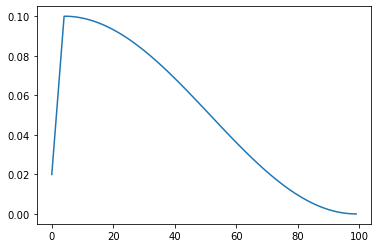

In [9]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 80 % drop

In [10]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 0
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.48)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = True)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Epoch-0-:   1%|▏         | 5/391 [00:00<01:49,  3.53it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7846490336805965	Top1 Acc: 0.12854000001907348


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.4158507449717463	Top1 Acc: 0.1993


Epoch-1-:   2%|▏         | 6/391 [00:00<01:52,  3.43it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.616266306708841	Top1 Acc: 0.3211200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.6523432701448852	Top1 Acc: 0.3211


Epoch-2-:   1%|▏         | 5/391 [00:00<01:43,  3.74it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.345430635735202	Top1 Acc: 0.3802400000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.418865588646901	Top1 Acc: 0.3804


Epoch-3-:   1%|          | 4/391 [00:00<01:55,  3.36it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.211235637555037	Top1 Acc: 0.40930000001907346


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.6115098301368422	Top1 Acc: 0.361


Epoch-4-:   1%|▏         | 5/391 [00:00<01:44,  3.70it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.145680816277214	Top1 Acc: 0.4313800000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.6845299231855173	Top1 Acc: 0.3444


Epoch-5-:   2%|▏         | 6/391 [00:00<01:38,  3.93it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.076442848386057	Top1 Acc: 0.44230000002861025


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.2257218466529363	Top1 Acc: 0.4234


Epoch-6-:   2%|▏         | 6/391 [00:00<01:51,  3.44it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.992312254503255	Top1 Acc: 0.46341999998092653


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.064021946508673	Top1 Acc: 0.4611


Epoch-7-:   1%|          | 4/391 [00:00<01:56,  3.31it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.9359292740102314	Top1 Acc: 0.47558


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.415352908870842	Top1 Acc: 0.3953


Epoch-8-:   1%|▏         | 5/391 [00:00<01:59,  3.23it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.9137121905451235	Top1 Acc: 0.48256000005722044


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.1513941061647635	Top1 Acc: 0.4387


Epoch-9-:   2%|▏         | 6/391 [00:00<01:46,  3.60it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8789739102658713	Top1 Acc: 0.49074000000953677


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.2067500579206247	Top1 Acc: 0.4424


Epoch-10-:   1%|▏         | 5/391 [00:00<01:38,  3.90it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8512401388734199	Top1 Acc: 0.4964199999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.0309624264511883	Top1 Acc: 0.4607


Epoch-11-:   1%|          | 2/391 [00:00<02:00,  3.22it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.8347826049760785	Top1 Acc: 0.5025399999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.9394644800620744	Top1 Acc: 0.4805


Epoch-12-:   1%|          | 3/391 [00:00<01:28,  4.36it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.819903655125357	Top1 Acc: 0.5047799999904633


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.2375295358368112	Top1 Acc: 0.4287


Epoch-13-:   2%|▏         | 6/391 [00:00<01:51,  3.45it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.8021723839937878	Top1 Acc: 0.50976


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.083701461176329	Top1 Acc: 0.4551


Epoch-14-:   1%|▏         | 5/391 [00:00<01:43,  3.74it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.8018725006781575	Top1 Acc: 0.50872


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.5383659676660466	Top1 Acc: 0.3898


Epoch-15-:   1%|          | 4/391 [00:00<01:44,  3.69it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.785049808909521	Top1 Acc: 0.5145799999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0696858816509005	Top1 Acc: 0.4731


Epoch-16-:   1%|          | 4/391 [00:00<01:35,  4.04it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7644700821098465	Top1 Acc: 0.51974


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.927633818191818	Top1 Acc: 0.4867


Epoch-17-:   1%|▏         | 5/391 [00:00<01:58,  3.25it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7608339323107238	Top1 Acc: 0.518240000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.9516327698019487	Top1 Acc: 0.4792


Epoch-18-:   1%|          | 4/391 [00:00<01:42,  3.79it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7455361404687242	Top1 Acc: 0.52356


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9890894935100893	Top1 Acc: 0.4731


Epoch-19-:   2%|▏         | 6/391 [00:00<01:42,  3.76it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7382555712214516	Top1 Acc: 0.52458


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.1416570053824895	Top1 Acc: 0.4494


Epoch-20-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7216606923686268	Top1 Acc: 0.5288999999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.925274592411669	Top1 Acc: 0.4871


Epoch-21-:   2%|▏         | 6/391 [00:00<01:30,  4.27it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.709358168380035	Top1 Acc: 0.5334800000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.9749049204814284	Top1 Acc: 0.4875


Epoch-22-:   1%|          | 4/391 [00:00<01:30,  4.30it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.7096327406061276	Top1 Acc: 0.5334600000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.0822003249880634	Top1 Acc: 0.4549


Epoch-23-:   1%|          | 3/391 [00:00<01:48,  3.58it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6865065664891392	Top1 Acc: 0.5370199999904632


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.2163304513013817	Top1 Acc: 0.4482


Epoch-24-:   2%|▏         | 6/391 [00:00<02:18,  2.77it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6914808951375429	Top1 Acc: 0.5380600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.8674822925012322	Top1 Acc: 0.5095


Epoch-25-:   1%|          | 4/391 [00:00<01:58,  3.27it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6791744799260289	Top1 Acc: 0.5407200000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.7923741416086125	Top1 Acc: 0.5196


Epoch-26-:   1%|▏         | 5/391 [00:00<01:44,  3.71it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6591632503377811	Top1 Acc: 0.5455800000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.8622206328790398	Top1 Acc: 0.5071


Epoch-27-:   1%|▏         | 5/391 [00:00<01:53,  3.40it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6587258226731245	Top1 Acc: 0.54316


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8569268591796295	Top1 Acc: 0.5058


Epoch-28-:   1%|          | 4/391 [00:00<02:03,  3.13it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.65064793870882	Top1 Acc: 0.5464600000095368


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.975810772256006	Top1 Acc: 0.4837


Epoch-29-:   1%|▏         | 5/391 [00:00<01:57,  3.29it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6288556583092342	Top1 Acc: 0.55202


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9359949887553347	Top1 Acc: 0.4808


Epoch-30-:   1%|          | 4/391 [00:00<01:35,  4.06it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6243930414814474	Top1 Acc: 0.5533600000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8300795494755613	Top1 Acc: 0.5072


Epoch-31-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.6083875516491473	Top1 Acc: 0.55648


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.9244481113892566	Top1 Acc: 0.4974


Epoch-32-:   2%|▏         | 6/391 [00:00<01:48,  3.54it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.6069843961149834	Top1 Acc: 0.55566


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7683155174496807	Top1 Acc: 0.5272


Epoch-33-:   1%|▏         | 5/391 [00:00<01:49,  3.53it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5930322859903125	Top1 Acc: 0.5625400000190734


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.869474994985363	Top1 Acc: 0.5054


Epoch-34-:   1%|          | 3/391 [00:00<01:43,  3.73it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5790408837520862	Top1 Acc: 0.5632800000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.773529143273076	Top1 Acc: 0.53


Epoch-35-:   1%|▏         | 5/391 [00:00<01:40,  3.84it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5606485071694454	Top1 Acc: 0.56834


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 2.0418826718873615	Top1 Acc: 0.4791


Epoch-36-:   2%|▏         | 6/391 [00:00<01:42,  3.75it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5581481697614237	Top1 Acc: 0.5684599999809266


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.896835576129865	Top1 Acc: 0.5045


Epoch-37-:   0%|          | 1/391 [00:00<02:25,  2.68it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5497425608622752	Top1 Acc: 0.5695800000572204


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.8247989491571355	Top1 Acc: 0.5151


Epoch-38-:   2%|▏         | 7/391 [00:00<01:54,  3.36it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5389472935205835	Top1 Acc: 0.57272


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7459155049505113	Top1 Acc: 0.5299


Epoch-39-:   1%|▏         | 5/391 [00:00<01:40,  3.83it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.516071929041382	Top1 Acc: 0.5799399999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.8775551756726037	Top1 Acc: 0.5091


Epoch-40-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.4988940103584543	Top1 Acc: 0.5797600000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.7455379374419586	Top1 Acc: 0.5299


Epoch-41-:   1%|▏         | 5/391 [00:00<01:42,  3.77it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4929543331151118	Top1 Acc: 0.58322


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 2.014126744451402	Top1 Acc: 0.4952


Epoch-42-:   1%|          | 4/391 [00:00<01:31,  4.21it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4719957369367789	Top1 Acc: 0.59002


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7546177981775017	Top1 Acc: 0.5285


Epoch-43-:   1%|▏         | 5/391 [00:00<01:54,  3.36it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4635955816339654	Top1 Acc: 0.5918


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6931185465824754	Top1 Acc: 0.5463


Epoch-44-:   2%|▏         | 6/391 [00:00<01:47,  3.59it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.442917064327718	Top1 Acc: 0.5974600000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.6771701559235779	Top1 Acc: 0.5495


Epoch-45-:   1%|▏         | 5/391 [00:00<01:53,  3.41it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.42821203381814	Top1 Acc: 0.598040000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.8747977214523508	Top1 Acc: 0.5184


Epoch-46-:   1%|          | 4/391 [00:00<01:36,  4.02it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4066650928438778	Top1 Acc: 0.6029


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.6929181014435202	Top1 Acc: 0.5433


Epoch-47-:   1%|          | 4/391 [00:00<01:43,  3.74it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.3919587841119303	Top1 Acc: 0.6085800000381469


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7703555128242396	Top1 Acc: 0.5373


Epoch-48-:   2%|▏         | 6/391 [00:00<01:51,  3.47it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3772654112647562	Top1 Acc: 0.6110400000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.8394793981238255	Top1 Acc: 0.5199


Epoch-49-:   1%|▏         | 5/391 [00:00<01:47,  3.60it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3708382764130906	Top1 Acc: 0.6131800000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.7287968698936174	Top1 Acc: 0.5457


Epoch-50-:   2%|▏         | 6/391 [00:00<01:58,  3.24it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3473105349809007	Top1 Acc: 0.6182200000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5691301264340365	Top1 Acc: 0.5723


Epoch-51-:   1%|▏         | 5/391 [00:00<01:48,  3.57it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3361785957575454	Top1 Acc: 0.62128


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.642891041840179	Top1 Acc: 0.5605


Epoch-52-:   2%|▏         | 8/391 [00:00<01:45,  3.64it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.3115613792863343	Top1 Acc: 0.6282200000381469


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5826375786262223	Top1 Acc: 0.5713


Epoch-53-:   2%|▏         | 6/391 [00:00<01:49,  3.52it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2955767245548766	Top1 Acc: 0.6310000000572205


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6859986819798434	Top1 Acc: 0.5495


Epoch-54-:   1%|▏         | 5/391 [00:00<01:46,  3.62it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.26532996569753	Top1 Acc: 0.6399


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5940371012385888	Top1 Acc: 0.5706


Epoch-55-:   2%|▏         | 6/391 [00:00<01:39,  3.85it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.254719787851319	Top1 Acc: 0.6410200000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.604349261597742	Top1 Acc: 0.5727


Epoch-56-:   2%|▏         | 6/391 [00:00<01:59,  3.23it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2338024391542615	Top1 Acc: 0.6448


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6911261549478844	Top1 Acc: 0.5611


Epoch-57-:   1%|          | 4/391 [00:00<01:40,  3.85it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.2103639810591402	Top1 Acc: 0.6522800000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5539832839482948	Top1 Acc: 0.5841


Epoch-58-:   1%|          | 4/391 [00:00<01:36,  4.02it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1902980589500778	Top1 Acc: 0.6563400000572205


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5699365682239774	Top1 Acc: 0.5811


Epoch-59-:   1%|▏         | 5/391 [00:00<01:48,  3.56it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.173283542665984	Top1 Acc: 0.6601799999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.723415966275372	Top1 Acc: 0.5536


Epoch-60-:   1%|▏         | 5/391 [00:00<01:39,  3.87it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1447864723632404	Top1 Acc: 0.6655599999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6645348253129404	Top1 Acc: 0.5575


Epoch-61-:   1%|▏         | 5/391 [00:00<01:41,  3.79it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1269975993639367	Top1 Acc: 0.6724000000572204


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.527123004575319	Top1 Acc: 0.5903


Epoch-62-:   1%|▏         | 5/391 [00:00<01:45,  3.67it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.1042979094378478	Top1 Acc: 0.6808599999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.4979233756850037	Top1 Acc: 0.5965


Epoch-63-:   2%|▏         | 6/391 [00:00<01:40,  3.83it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0723482640198125	Top1 Acc: 0.686540000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4000610837453529	Top1 Acc: 0.6189


Epoch-64-:   1%|          | 4/391 [00:00<01:43,  3.75it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0454930425300013	Top1 Acc: 0.6944200000572205


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4200465301924114	Top1 Acc: 0.6186


Epoch-65-:   1%|          | 4/391 [00:00<01:51,  3.49it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0358405747377049	Top1 Acc: 0.6959199999809265


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.525566344019733	Top1 Acc: 0.5999


Epoch-66-:   2%|▏         | 6/391 [00:00<01:40,  3.82it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 1.002808615374748	Top1 Acc: 0.7058199999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5546835404408128	Top1 Acc: 0.5893


Epoch-67-:   1%|▏         | 5/391 [00:00<01:38,  3.92it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9802775777819212	Top1 Acc: 0.7094600000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4396392325811749	Top1 Acc: 0.6184


Epoch-68-:   1%|▏         | 5/391 [00:00<01:56,  3.32it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9420742837669295	Top1 Acc: 0.72134


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.3640362129935735	Top1 Acc: 0.6327


Epoch-69-:   1%|          | 4/391 [00:00<01:30,  4.29it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9169396645272784	Top1 Acc: 0.727320000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.3987134355532973	Top1 Acc: 0.6344


Epoch-70-:   1%|          | 4/391 [00:00<02:11,  2.94it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8871042963184054	Top1 Acc: 0.733380000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.4521612291094623	Top1 Acc: 0.621


Epoch-71-:   1%|          | 4/391 [00:00<01:51,  3.48it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8554898767977419	Top1 Acc: 0.744880000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3842082702660863	Top1 Acc: 0.6355


Epoch-72-:   1%|▏         | 5/391 [00:00<01:48,  3.56it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8221464158628907	Top1 Acc: 0.7525200000572204


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4253470776956292	Top1 Acc: 0.6237


Epoch-73-:   2%|▏         | 6/391 [00:00<01:47,  3.57it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7899005000701036	Top1 Acc: 0.7613200000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3829711336123793	Top1 Acc: 0.6316


Epoch-74-:   1%|▏         | 5/391 [00:00<01:36,  4.00it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7624968539570909	Top1 Acc: 0.769720000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.396266884441617	Top1 Acc: 0.6371


Epoch-75-:   1%|▏         | 5/391 [00:00<01:51,  3.47it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7316928747517374	Top1 Acc: 0.7775600000190734


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3572646439829958	Top1 Acc: 0.6444


Epoch-76-:   1%|▏         | 5/391 [00:00<01:42,  3.75it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6915491287360715	Top1 Acc: 0.7861200000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3718046357360067	Top1 Acc: 0.651


Epoch-77-:   2%|▏         | 6/391 [00:00<01:38,  3.91it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6642845956718221	Top1 Acc: 0.7941200000572205


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.344182849684848	Top1 Acc: 0.6505


Epoch-78-:   1%|▏         | 5/391 [00:00<01:52,  3.44it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6121252413143587	Top1 Acc: 0.8100799999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3716716736177854	Top1 Acc: 0.6481


Epoch-79-:   2%|▏         | 6/391 [00:00<01:35,  4.04it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5956462543943654	Top1 Acc: 0.8140400000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.325220119349564	Top1 Acc: 0.6594


Epoch-80-:   1%|▏         | 5/391 [00:00<01:41,  3.82it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5533774064477447	Top1 Acc: 0.82936


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3401177970668938	Top1 Acc: 0.6625


Epoch-81-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5089263254419312	Top1 Acc: 0.839720000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3214733336545244	Top1 Acc: 0.6674


Epoch-82-:   1%|▏         | 5/391 [00:00<01:39,  3.86it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.47617428877469525	Top1 Acc: 0.8505399999809266


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3311174195024031	Top1 Acc: 0.6641


Epoch-83-:   1%|▏         | 5/391 [00:00<01:44,  3.68it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.44139706040434823	Top1 Acc: 0.86072


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3218974591810493	Top1 Acc: 0.6706


Epoch-84-:   2%|▏         | 6/391 [00:00<01:46,  3.60it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.4022433950620539	Top1 Acc: 0.8741000000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3168594686290886	Top1 Acc: 0.6747


Epoch-85-:   1%|          | 4/391 [00:00<01:49,  3.52it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.37226602709506784	Top1 Acc: 0.883520000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3392880521243131	Top1 Acc: 0.6761


Epoch-86-:   1%|▏         | 5/391 [00:00<01:38,  3.93it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3424823635908039	Top1 Acc: 0.8909000000190734


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3320102638836149	Top1 Acc: 0.6764


Epoch-87-:   1%|          | 4/391 [00:00<01:40,  3.84it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.3039557370535858	Top1 Acc: 0.9029400000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3294656080535696	Top1 Acc: 0.6846


Epoch-88-:   1%|▏         | 5/391 [00:00<01:45,  3.67it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.27744731390872573	Top1 Acc: 0.9115200000381469


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3178407874288438	Top1 Acc: 0.6868


Epoch-89-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2548926324414475	Top1 Acc: 0.92048


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.340462244764159	Top1 Acc: 0.6881


Epoch-90-:   1%|          | 4/391 [00:00<01:46,  3.64it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.23335366642764768	Top1 Acc: 0.9269599999809265


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3188507911525196	Top1 Acc: 0.6876


Epoch-91-:   1%|          | 4/391 [00:00<01:40,  3.84it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.21387525882257524	Top1 Acc: 0.9333400000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.324519628965402	Top1 Acc: 0.6915


Epoch-92-:   1%|          | 4/391 [00:00<01:38,  3.92it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.2022341347259024	Top1 Acc: 0.9378600000572205


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.317751477036295	Top1 Acc: 0.6962


Epoch-93-:   1%|          | 3/391 [00:00<01:45,  3.67it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.1858168091158123	Top1 Acc: 0.9428799999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3203301301485375	Top1 Acc: 0.6928


Epoch-94-:   1%|▏         | 5/391 [00:00<01:55,  3.34it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1788435854837108	Top1 Acc: 0.9459399999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3220604710941073	Top1 Acc: 0.6928


Epoch-95-:   2%|▏         | 6/391 [00:00<01:52,  3.43it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.167076363073438	Top1 Acc: 0.94896


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.319489797459373	Top1 Acc: 0.6946


Epoch-96-:   1%|▏         | 5/391 [00:00<02:17,  2.80it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.16648834929479966	Top1 Acc: 0.9500000000572204


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3249005962021743	Top1 Acc: 0.695


Epoch-97-:   2%|▏         | 7/391 [00:00<01:52,  3.42it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.16086337252346147	Top1 Acc: 0.951580000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3254314600666868	Top1 Acc: 0.695


Epoch-98-:   1%|▏         | 5/391 [00:00<01:49,  3.51it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.15981941121389798	Top1 Acc: 0.9515200000190734


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3257008285462102	Top1 Acc: 0.6945


Epoch-99-:   2%|▏         | 6/391 [00:00<01:43,  3.70it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.15544312851279593	Top1 Acc: 0.9539999999809265


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 60.47it/s]


Validation results at epoch-99 | loss: 1.323166024835804	Top1 Acc: 0.6967
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.Co

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Epoch-0-:   1%|          | 4/391 [00:00<01:50,  3.51it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7815646619138206	Top1 Acc: 0.12812


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.055568562278265	Top1 Acc: 0.2415


Epoch-1-:   1%|▏         | 5/391 [00:00<01:50,  3.49it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.620016075461112	Top1 Acc: 0.3207400000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.975261615801461	Top1 Acc: 0.2966


Epoch-2-:   1%|▏         | 5/391 [00:00<02:02,  3.15it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.3389195590982657	Top1 Acc: 0.38320000000953675


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.517607142653646	Top1 Acc: 0.3473


Epoch-3-:   1%|▏         | 5/391 [00:00<01:45,  3.66it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.2130306193895657	Top1 Acc: 0.41190000000953675


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.43833819823929	Top1 Acc: 0.3723


Epoch-4-:   1%|▏         | 5/391 [00:00<01:44,  3.70it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.156347951925624	Top1 Acc: 0.4246000000286102


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.2834621350976487	Top1 Acc: 0.4016


Epoch-5-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.0656452977748785	Top1 Acc: 0.4460200000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1799644095988215	Top1 Acc: 0.4395


Epoch-6-:   1%|          | 3/391 [00:00<01:42,  3.80it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.995406284356666	Top1 Acc: 0.4606800000286102


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.4019206535967093	Top1 Acc: 0.3757


Epoch-7-:   1%|          | 4/391 [00:00<01:32,  4.19it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.9431419085968487	Top1 Acc: 0.4732600000095367


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.137241850925397	Top1 Acc: 0.4436


Epoch-8-:   1%|          | 4/391 [00:00<01:48,  3.57it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.9155310157619778	Top1 Acc: 0.4829800000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.0592002491407757	Top1 Acc: 0.4572


Epoch-9-:   1%|▏         | 5/391 [00:00<01:40,  3.84it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8821672490795556	Top1 Acc: 0.4911399999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.0777883092059364	Top1 Acc: 0.4497


Epoch-10-:   1%|          | 4/391 [00:00<01:43,  3.75it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.850197881079086	Top1 Acc: 0.4989


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.525003384940232	Top1 Acc: 0.3693


Epoch-11-:   1%|▏         | 5/391 [00:00<01:58,  3.27it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.837593929237112	Top1 Acc: 0.5016800000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.129231134547463	Top1 Acc: 0.4502


Epoch-12-:   1%|▏         | 5/391 [00:00<01:48,  3.56it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.810342961869886	Top1 Acc: 0.5091000000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.2282253096375286	Top1 Acc: 0.4328


Epoch-13-:   2%|▏         | 6/391 [00:00<01:45,  3.66it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.8034708795645047	Top1 Acc: 0.5105599999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.158185726479639	Top1 Acc: 0.4501


Epoch-14-:   1%|▏         | 5/391 [00:00<01:37,  3.97it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.785261664549103	Top1 Acc: 0.513


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.0923803592030006	Top1 Acc: 0.4582


Epoch-15-:   1%|          | 4/391 [00:00<01:49,  3.52it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7817944998631392	Top1 Acc: 0.5147400000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.160995027686976	Top1 Acc: 0.4483


Epoch-16-:   1%|          | 4/391 [00:00<01:35,  4.04it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.769764259343257	Top1 Acc: 0.5186600000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 2.0377271371551706	Top1 Acc: 0.4636


Epoch-17-:   1%|▏         | 5/391 [00:00<02:07,  3.02it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7497467817857748	Top1 Acc: 0.5225799999904632


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.8385775345790236	Top1 Acc: 0.504


Epoch-18-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.738083219894058	Top1 Acc: 0.5251400000095368


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.9735837043086184	Top1 Acc: 0.4826


Epoch-19-:   1%|▏         | 5/391 [00:00<01:31,  4.21it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.737862901309567	Top1 Acc: 0.5266000000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.0078586928452116	Top1 Acc: 0.4821


Epoch-20-:   1%|▏         | 5/391 [00:00<01:19,  4.83it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7299746616417184	Top1 Acc: 0.5275200000381469


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.0725916307183763	Top1 Acc: 0.4725


Epoch-21-:   1%|          | 4/391 [00:00<01:36,  4.00it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.720580405896277	Top1 Acc: 0.5303199999809265


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.841630160054074	Top1 Acc: 0.5068


Epoch-22-:   2%|▏         | 6/391 [00:00<01:55,  3.33it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.70361920055526	Top1 Acc: 0.53362


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.901592826541466	Top1 Acc: 0.5001


Epoch-23-:   1%|          | 4/391 [00:00<01:48,  3.55it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6885413464987675	Top1 Acc: 0.5372400000572205


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.9312202462667152	Top1 Acc: 0.4982


Epoch-24-:   1%|▏         | 5/391 [00:00<01:57,  3.30it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6958998658163162	Top1 Acc: 0.5356599999904632


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.927139098131204	Top1 Acc: 0.4911


Epoch-25-:   1%|▏         | 5/391 [00:00<01:52,  3.43it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6661027450390788	Top1 Acc: 0.5401999999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.0780128451842295	Top1 Acc: 0.4741


Epoch-26-:   1%|▏         | 5/391 [00:00<01:44,  3.71it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6692587286615006	Top1 Acc: 0.542360000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9808264819881585	Top1 Acc: 0.4699


Epoch-27-:   2%|▏         | 6/391 [00:00<01:45,  3.66it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.651763841014384	Top1 Acc: 0.5483400000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.845726468895055	Top1 Acc: 0.513


Epoch-28-:   1%|          | 3/391 [00:00<01:35,  4.08it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6480031815331306	Top1 Acc: 0.5473800000572204


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.938648448714727	Top1 Acc: 0.4955


Epoch-29-:   1%|▏         | 5/391 [00:00<01:46,  3.62it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6385413685723034	Top1 Acc: 0.5498599999904633


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 2.0510314371012432	Top1 Acc: 0.4694


Epoch-30-:   2%|▏         | 6/391 [00:00<01:57,  3.27it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6210444897337033	Top1 Acc: 0.5521000000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8696942842459376	Top1 Acc: 0.5045


Epoch-31-:   1%|▏         | 5/391 [00:00<01:46,  3.61it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.608409829151905	Top1 Acc: 0.5545800000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.93781530102597	Top1 Acc: 0.4834


Epoch-32-:   2%|▏         | 6/391 [00:00<01:33,  4.12it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.6072653986304009	Top1 Acc: 0.555200000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.9204595239856574	Top1 Acc: 0.4989


Epoch-33-:   1%|          | 4/391 [00:00<01:46,  3.62it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.59341180476996	Top1 Acc: 0.5599600000381469


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.8402630935741375	Top1 Acc: 0.5167


Epoch-34-:   1%|          | 4/391 [00:00<01:41,  3.80it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.577882486840953	Top1 Acc: 0.56348


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 2.303404211997986	Top1 Acc: 0.4384


Epoch-35-:   1%|          | 4/391 [00:00<01:35,  4.04it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5650562615040928	Top1 Acc: 0.567520000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 2.005427576318572	Top1 Acc: 0.4902


Epoch-36-:   2%|▏         | 6/391 [00:00<01:46,  3.61it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5555063952570376	Top1 Acc: 0.5693800000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.9821918931188462	Top1 Acc: 0.4845


Epoch-37-:   1%|▏         | 5/391 [00:00<01:49,  3.53it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5309853004982403	Top1 Acc: 0.5760400000572204


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7947529403469231	Top1 Acc: 0.5234


Epoch-38-:   1%|          | 4/391 [00:00<01:44,  3.72it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5344414052451054	Top1 Acc: 0.5732800000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.8262130127677434	Top1 Acc: 0.5189


Epoch-39-:   1%|▏         | 5/391 [00:00<01:47,  3.59it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.5127304731427555	Top1 Acc: 0.5752799999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.9406630117681962	Top1 Acc: 0.4929


Epoch-40-:   1%|▏         | 5/391 [00:00<01:44,  3.68it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.5000687977846932	Top1 Acc: 0.5833200000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.9044535612758202	Top1 Acc: 0.5036


Epoch-41-:   1%|          | 4/391 [00:00<01:49,  3.53it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.492563329389333	Top1 Acc: 0.58402


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.7926054574266266	Top1 Acc: 0.5311


Epoch-42-:   1%|▏         | 5/391 [00:00<01:38,  3.92it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4706049264239534	Top1 Acc: 0.5898


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8662889320639116	Top1 Acc: 0.5151


Epoch-43-:   1%|          | 4/391 [00:00<01:42,  3.76it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.466746397640394	Top1 Acc: 0.59196


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7125489726851257	Top1 Acc: 0.5389


Epoch-44-:   1%|          | 4/391 [00:00<01:42,  3.76it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4507132643628913	Top1 Acc: 0.594120000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7539484093460855	Top1 Acc: 0.5378


Epoch-45-:   1%|          | 4/391 [00:00<01:42,  3.78it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4278566529378867	Top1 Acc: 0.5995399999809266


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.7972573615327667	Top1 Acc: 0.5242


Epoch-46-:   1%|          | 4/391 [00:00<01:35,  4.06it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4246020856720711	Top1 Acc: 0.60016


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5793361988248704	Top1 Acc: 0.5651


Epoch-47-:   1%|          | 4/391 [00:00<01:36,  3.99it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.4044028645586175	Top1 Acc: 0.6035


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.677982924859735	Top1 Acc: 0.5482


Epoch-48-:   1%|▏         | 5/391 [00:00<01:53,  3.39it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.375707687014509	Top1 Acc: 0.613960000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.7424535902240608	Top1 Acc: 0.5328


Epoch-49-:   1%|          | 4/391 [00:00<01:38,  3.94it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3708430341137645	Top1 Acc: 0.6124200000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.658514380455017	Top1 Acc: 0.5529


Epoch-50-:   2%|▏         | 6/391 [00:00<01:53,  3.39it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.351742806946835	Top1 Acc: 0.6182200000381469


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5770357334161107	Top1 Acc: 0.5697


Epoch-51-:   1%|▏         | 5/391 [00:00<01:54,  3.36it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3341072348072707	Top1 Acc: 0.6229000000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.7059561979921558	Top1 Acc: 0.5506


Epoch-52-:   1%|▏         | 5/391 [00:00<01:50,  3.50it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.3173282940674316	Top1 Acc: 0.6261600000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.658045613313023	Top1 Acc: 0.5598


Epoch-53-:   1%|          | 3/391 [00:00<01:47,  3.62it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2922905348146054	Top1 Acc: 0.63406


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5925046341328681	Top1 Acc: 0.5654


Epoch-54-:   1%|          | 4/391 [00:00<01:49,  3.55it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2717392619918375	Top1 Acc: 0.635740000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5602065973644015	Top1 Acc: 0.5798


Epoch-55-:   1%|▏         | 5/391 [00:00<01:58,  3.25it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.257856547832489	Top1 Acc: 0.6407599999809265


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5063902350920666	Top1 Acc: 0.5877


Epoch-56-:   1%|▏         | 5/391 [00:00<01:37,  3.97it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2430733948412453	Top1 Acc: 0.6465599999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6595900435990925	Top1 Acc: 0.5588


Epoch-57-:   1%|          | 3/391 [00:00<01:40,  3.85it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.2262363523778403	Top1 Acc: 0.6505600000572205


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.4932442118849936	Top1 Acc: 0.5899


Epoch-58-:   1%|▏         | 5/391 [00:00<01:44,  3.71it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.197095170960097	Top1 Acc: 0.65676


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5757901623279233	Top1 Acc: 0.5788


Epoch-59-:   1%|▏         | 5/391 [00:00<01:42,  3.75it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1819903045664053	Top1 Acc: 0.6604999999809266


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.7014652068101908	Top1 Acc: 0.562


Epoch-60-:   1%|▏         | 5/391 [00:00<01:51,  3.47it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1554689232040853	Top1 Acc: 0.6671999999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.4867791978618767	Top1 Acc: 0.5995


Epoch-61-:   1%|▏         | 5/391 [00:00<01:47,  3.61it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1313089274079597	Top1 Acc: 0.66884


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5453103577034384	Top1 Acc: 0.5841


Epoch-62-:   1%|          | 4/391 [00:00<01:41,  3.80it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.1071102360020513	Top1 Acc: 0.6766200000381469


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5377751935886432	Top1 Acc: 0.5849


Epoch-63-:   1%|▏         | 5/391 [00:00<01:47,  3.58it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0757255481027277	Top1 Acc: 0.6852200000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5523937548263163	Top1 Acc: 0.5924


Epoch-64-:   0%|          | 1/391 [00:00<02:10,  2.99it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0613489539726921	Top1 Acc: 0.6909599999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4869578292098227	Top1 Acc: 0.6007


Epoch-65-:   2%|▏         | 7/391 [00:00<01:35,  4.04it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0340289394264026	Top1 Acc: 0.6978600000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4124191003509714	Top1 Acc: 0.6161


Epoch-66-:   1%|▏         | 5/391 [00:00<01:50,  3.50it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 1.0108069803403772	Top1 Acc: 0.7025999999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.3864067098762416	Top1 Acc: 0.6254


Epoch-67-:   1%|▏         | 5/391 [00:00<01:53,  3.39it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.975821329352191	Top1 Acc: 0.7123400000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4157458438148982	Top1 Acc: 0.6196


Epoch-68-:   1%|▏         | 5/391 [00:00<01:42,  3.76it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9503711992517456	Top1 Acc: 0.716400000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.516881656043137	Top1 Acc: 0.6053


Epoch-69-:   2%|▏         | 6/391 [00:00<01:50,  3.48it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9207203533033581	Top1 Acc: 0.7247800000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.416333902485763	Top1 Acc: 0.6185


Epoch-70-:   1%|▏         | 5/391 [00:00<01:46,  3.61it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8904713316036917	Top1 Acc: 0.7342599999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3541056325164023	Top1 Acc: 0.6337


Epoch-71-:   2%|▏         | 6/391 [00:00<01:46,  3.62it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8515893231572398	Top1 Acc: 0.7456800000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.4301617734039886	Top1 Acc: 0.6152


Epoch-72-:   2%|▏         | 6/391 [00:00<01:45,  3.65it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8348384354730396	Top1 Acc: 0.75002


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4752984952323045	Top1 Acc: 0.6164


Epoch-73-:   1%|          | 4/391 [00:00<01:28,  4.38it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7976484274315407	Top1 Acc: 0.7601200000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3730250883706008	Top1 Acc: 0.6395


Epoch-74-:   1%|▏         | 5/391 [00:00<01:41,  3.82it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7596369268339308	Top1 Acc: 0.769580000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.4147122268435322	Top1 Acc: 0.6299


Epoch-75-:   1%|          | 4/391 [00:00<01:31,  4.22it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7311452967126656	Top1 Acc: 0.778160000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.4759202999404715	Top1 Acc: 0.6254


Epoch-76-:   1%|          | 4/391 [00:00<01:57,  3.28it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6951661654902846	Top1 Acc: 0.7873200000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.415851371197761	Top1 Acc: 0.6415


Epoch-77-:   1%|          | 2/391 [00:00<01:57,  3.31it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6718369387757138	Top1 Acc: 0.7952000000572205


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3515108272999148	Top1 Acc: 0.65


Epoch-78-:   2%|▏         | 6/391 [00:00<01:47,  3.58it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6310882138474213	Top1 Acc: 0.8038400000381469


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3612252971794032	Top1 Acc: 0.6512


Epoch-79-:   2%|▏         | 6/391 [00:00<01:54,  3.35it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5932065259922495	Top1 Acc: 0.8162200000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3174112906938866	Top1 Acc: 0.6645


Epoch-80-:   1%|          | 3/391 [00:00<01:48,  3.57it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5523937870474422	Top1 Acc: 0.826780000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.2945741030234326	Top1 Acc: 0.6686


Epoch-81-:   2%|▏         | 6/391 [00:00<01:46,  3.61it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5111470249912623	Top1 Acc: 0.8399999999809266


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3394229208366781	Top1 Acc: 0.6649


Epoch-82-:   2%|▏         | 6/391 [00:00<01:36,  3.98it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.4782881415865915	Top1 Acc: 0.8503600000572205


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.31507817099366	Top1 Acc: 0.6691


Epoch-83-:   1%|          | 4/391 [00:00<01:37,  3.95it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4453012620472847	Top1 Acc: 0.8594800000572205


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.310364522511446	Top1 Acc: 0.674


Epoch-84-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.4026970904501503	Top1 Acc: 0.8723799999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.2928983704953254	Top1 Acc: 0.679


Epoch-85-:   1%|          | 4/391 [00:00<01:39,  3.87it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3712459939062748	Top1 Acc: 0.8824000000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3175742497927025	Top1 Acc: 0.6781


Epoch-86-:   1%|          | 4/391 [00:00<01:39,  3.90it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3354506768152842	Top1 Acc: 0.8940199999809265


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3435730896418607	Top1 Acc: 0.6789


Epoch-87-:   1%|▏         | 5/391 [00:00<01:52,  3.44it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.3090920716600345	Top1 Acc: 0.90228


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3111473291735105	Top1 Acc: 0.6865


Epoch-88-:   1%|▏         | 5/391 [00:00<01:53,  3.41it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.27884658168801263	Top1 Acc: 0.91202


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3214211954346187	Top1 Acc: 0.6886


Epoch-89-:   1%|▏         | 5/391 [00:00<01:36,  4.00it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2594565151216429	Top1 Acc: 0.9189800000572205


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.313793191426917	Top1 Acc: 0.6899


Epoch-90-:   1%|▏         | 5/391 [00:00<01:57,  3.30it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.23365094474590647	Top1 Acc: 0.927200000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.32694394829907	Top1 Acc: 0.6912


Epoch-91-:   1%|          | 3/391 [00:00<01:35,  4.05it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.2173135168755146	Top1 Acc: 0.93252


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.320881278454503	Top1 Acc: 0.6953


Epoch-92-:   1%|          | 4/391 [00:00<01:41,  3.83it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.20273249872657648	Top1 Acc: 0.9376199999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3237632286699512	Top1 Acc: 0.6952


Epoch-93-:   1%|▏         | 5/391 [00:00<01:37,  3.95it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.18987817242932137	Top1 Acc: 0.94142


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3165476631514634	Top1 Acc: 0.6934


Epoch-94-:   1%|          | 4/391 [00:00<01:35,  4.05it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.17999536956629486	Top1 Acc: 0.9456600000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3249405426315115	Top1 Acc: 0.697


Epoch-95-:   1%|          | 4/391 [00:00<01:39,  3.91it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.17105341527391882	Top1 Acc: 0.94954


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3170744542834125	Top1 Acc: 0.6971


Epoch-96-:   1%|▏         | 5/391 [00:00<01:59,  3.23it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.16599444921135598	Top1 Acc: 0.9496600000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3201641259314139	Top1 Acc: 0.696


Epoch-97-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.1600563069972236	Top1 Acc: 0.9520400000572204


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3199429330946524	Top1 Acc: 0.6966


Epoch-98-:   1%|▏         | 5/391 [00:00<01:41,  3.79it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.1579316773682909	Top1 Acc: 0.9522800000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.321234794357155	Top1 Acc: 0.6969


Epoch-99-:   1%|▏         | 5/391 [00:00<01:56,  3.32it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.15514084103200443	Top1 Acc: 0.9540000000572204


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 62.43it/s]


Validation results at epoch-99 | loss: 1.322398175167132	Top1 Acc: 0.6959
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.Co

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Epoch-0-:   1%|          | 4/391 [00:00<01:50,  3.51it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.768713329759095	Top1 Acc: 0.13068000000476837


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.25008130375343	Top1 Acc: 0.224


Epoch-1-:   1%|▏         | 5/391 [00:00<01:52,  3.43it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.599481321051907	Top1 Acc: 0.32482000001907346


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.7117115364799016	Top1 Acc: 0.3248


Epoch-2-:   1%|          | 3/391 [00:00<01:42,  3.78it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.3274340050299758	Top1 Acc: 0.38628


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.5881749467004704	Top1 Acc: 0.3409


Epoch-3-:   1%|▏         | 5/391 [00:00<01:53,  3.40it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.2099914569074235	Top1 Acc: 0.4127600000095367


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.533008371727376	Top1 Acc: 0.3701


Epoch-4-:   1%|          | 4/391 [00:00<01:54,  3.39it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.1389108640153696	Top1 Acc: 0.43050000000953675


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.502429927451701	Top1 Acc: 0.3733


Epoch-5-:   1%|          | 4/391 [00:00<01:36,  4.01it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.064391952951241	Top1 Acc: 0.4451399999904633


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.4607625022719177	Top1 Acc: 0.3872


Epoch-6-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9849253417280934	Top1 Acc: 0.46976000002861024


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.2835448014585276	Top1 Acc: 0.4185


Epoch-7-:   2%|▏         | 6/391 [00:00<01:50,  3.48it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.9403953079677299	Top1 Acc: 0.476


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.052373581294772	Top1 Acc: 0.4537


Epoch-8-:   1%|          | 3/391 [00:00<01:38,  3.94it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.903570424565269	Top1 Acc: 0.4826600000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.4667837921577163	Top1 Acc: 0.3983


Epoch-9-:   1%|          | 4/391 [00:00<01:34,  4.08it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8725444773578888	Top1 Acc: 0.49255999999046324


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.225463390350342	Top1 Acc: 0.4296


Epoch-10-:   1%|▏         | 5/391 [00:00<01:36,  3.98it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.845281928701474	Top1 Acc: 0.49738


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.1241621518436866	Top1 Acc: 0.4379


Epoch-11-:   1%|          | 3/391 [00:00<01:45,  3.68it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.833838642710615	Top1 Acc: 0.50374


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.0729130476335937	Top1 Acc: 0.4569


Epoch-12-:   1%|▏         | 5/391 [00:00<01:52,  3.44it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.8051017638667466	Top1 Acc: 0.50898


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.9315262444411652	Top1 Acc: 0.4877


Epoch-13-:   1%|          | 4/391 [00:00<01:50,  3.50it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.8042145004052945	Top1 Acc: 0.5091199999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.287581369846682	Top1 Acc: 0.4134


Epoch-14-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7925043313399605	Top1 Acc: 0.5118800000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.2033883619912062	Top1 Acc: 0.4448


Epoch-15-:   1%|▏         | 5/391 [00:00<01:51,  3.47it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7740525046882727	Top1 Acc: 0.5188600000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.260815232614928	Top1 Acc: 0.4314


Epoch-16-:   1%|          | 4/391 [00:00<01:43,  3.75it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7680553075907481	Top1 Acc: 0.5172


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9511416154571726	Top1 Acc: 0.4795


Epoch-17-:   2%|▏         | 6/391 [00:00<01:58,  3.25it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7607921517413596	Top1 Acc: 0.5195800000572205


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.004386210743385	Top1 Acc: 0.4697


Epoch-18-:   2%|▏         | 6/391 [00:00<01:41,  3.78it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7443680269334016	Top1 Acc: 0.52554


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.049469024320192	Top1 Acc: 0.4699


Epoch-19-:   1%|▏         | 5/391 [00:00<01:40,  3.82it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7384446536183662	Top1 Acc: 0.5258800000095367


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 2.709683379040489	Top1 Acc: 0.3783


Epoch-20-:   2%|▏         | 6/391 [00:00<01:52,  3.44it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.7264552506644402	Top1 Acc: 0.528700000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.928203985660891	Top1 Acc: 0.4865


Epoch-21-:   2%|▏         | 6/391 [00:00<01:57,  3.29it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.7135469480548673	Top1 Acc: 0.5309200000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 2.1273189873635014	Top1 Acc: 0.4603


Epoch-22-:   1%|▏         | 5/391 [00:00<02:09,  2.97it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.7096974752138339	Top1 Acc: 0.531240000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 2.0902371074579937	Top1 Acc: 0.467


Epoch-23-:   1%|          | 4/391 [00:00<01:37,  3.96it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.7031032947628089	Top1 Acc: 0.534


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.0307597223716445	Top1 Acc: 0.4682


Epoch-24-:   2%|▏         | 6/391 [00:00<01:38,  3.92it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6863693254987906	Top1 Acc: 0.5375599999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.025328317775002	Top1 Acc: 0.4728


Epoch-25-:   2%|▏         | 6/391 [00:00<01:45,  3.66it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6812372905823885	Top1 Acc: 0.5380600000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.0144523653802993	Top1 Acc: 0.4814


Epoch-26-:   1%|          | 4/391 [00:00<01:49,  3.54it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.663660054011723	Top1 Acc: 0.5451400000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9107005234006085	Top1 Acc: 0.5052


Epoch-27-:   2%|▏         | 6/391 [00:00<01:51,  3.44it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.652365504018486	Top1 Acc: 0.5455600000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.8021009330508075	Top1 Acc: 0.5178


Epoch-28-:   2%|▏         | 7/391 [00:00<01:49,  3.50it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.645951679295591	Top1 Acc: 0.5486200000381469


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.060767641550378	Top1 Acc: 0.4609


Epoch-29-:   1%|▏         | 5/391 [00:00<01:34,  4.07it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.633713703021369	Top1 Acc: 0.5477200000572204


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.8970817780192895	Top1 Acc: 0.4919


Epoch-30-:   1%|▏         | 5/391 [00:00<01:59,  3.23it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6271238513005055	Top1 Acc: 0.5498400000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8211440542076207	Top1 Acc: 0.5142


Epoch-31-:   1%|▏         | 5/391 [00:00<01:32,  4.16it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.6135577164647523	Top1 Acc: 0.556520000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.8200542655172227	Top1 Acc: 0.5141


Epoch-32-:   1%|▏         | 5/391 [00:00<01:26,  4.45it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.605795343818567	Top1 Acc: 0.5550600000381469


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.7354649592049514	Top1 Acc: 0.5353


Epoch-33-:   1%|          | 4/391 [00:00<01:48,  3.56it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5899062513390465	Top1 Acc: 0.5594400000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7765045679068263	Top1 Acc: 0.5216


Epoch-34-:   1%|▏         | 5/391 [00:00<01:57,  3.29it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5812783369322871	Top1 Acc: 0.56496


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.96326614784289	Top1 Acc: 0.49


Epoch-35-:   1%|▏         | 5/391 [00:00<01:43,  3.74it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5652422371422847	Top1 Acc: 0.565880000038147


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 2.0608769579778743	Top1 Acc: 0.4804


Epoch-36-:   2%|▏         | 6/391 [00:00<01:59,  3.21it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.552671173954254	Top1 Acc: 0.5710600000286102


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.9794671580761294	Top1 Acc: 0.4854


Epoch-37-:   1%|          | 4/391 [00:00<01:39,  3.89it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5419594482387728	Top1 Acc: 0.573180000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.7139625851112077	Top1 Acc: 0.5387


Epoch-38-:   1%|          | 4/391 [00:00<02:05,  3.07it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5295112163514433	Top1 Acc: 0.5740800000190734


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.9667739837984495	Top1 Acc: 0.4952


Epoch-39-:   2%|▏         | 7/391 [00:00<01:44,  3.68it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.513084784188234	Top1 Acc: 0.5786400000572205


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 2.301484516904324	Top1 Acc: 0.4381


Epoch-40-:   1%|          | 4/391 [00:00<01:54,  3.38it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.5095822408681026	Top1 Acc: 0.5790800000572205


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.699594891524013	Top1 Acc: 0.534


Epoch-41-:   1%|▏         | 5/391 [00:00<01:39,  3.90it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4819724032336183	Top1 Acc: 0.5875400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.8097071511835991	Top1 Acc: 0.5196


Epoch-42-:   1%|          | 4/391 [00:00<01:44,  3.70it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.47488865797477	Top1 Acc: 0.5878600000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.7477148952363413	Top1 Acc: 0.5291


Epoch-43-:   1%|▏         | 5/391 [00:00<01:50,  3.50it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4536381130633147	Top1 Acc: 0.5936199999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.7816774679135672	Top1 Acc: 0.5327


Epoch-44-:   1%|          | 4/391 [00:00<01:55,  3.34it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4458612862145503	Top1 Acc: 0.5942400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.8341763366626789	Top1 Acc: 0.5184


Epoch-45-:   1%|▏         | 5/391 [00:00<01:37,  3.95it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4326546509247606	Top1 Acc: 0.5990200000572204


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6246133107173293	Top1 Acc: 0.5516


Epoch-46-:   1%|▏         | 5/391 [00:00<01:42,  3.75it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4159568846987947	Top1 Acc: 0.60304


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7413355398781691	Top1 Acc: 0.5428


Epoch-47-:   1%|▏         | 5/391 [00:00<01:49,  3.51it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.397963190932408	Top1 Acc: 0.6064799999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7027378233173225	Top1 Acc: 0.5394


Epoch-48-:   1%|          | 4/391 [00:00<02:10,  2.97it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3768939465817893	Top1 Acc: 0.6104000000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.7039839074581484	Top1 Acc: 0.5512


Epoch-49-:   1%|          | 4/391 [00:00<01:45,  3.67it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3616040681329225	Top1 Acc: 0.6156200000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.6665192767034602	Top1 Acc: 0.5541


Epoch-50-:   1%|▏         | 5/391 [00:00<01:52,  3.42it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.3466055589868589	Top1 Acc: 0.62104


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5784328361100788	Top1 Acc: 0.5723


Epoch-51-:   1%|          | 4/391 [00:00<01:32,  4.18it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3274869903579087	Top1 Acc: 0.6251399999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.6663922961754134	Top1 Acc: 0.5512


Epoch-52-:   1%|▏         | 5/391 [00:00<01:44,  3.69it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.304126365562839	Top1 Acc: 0.6296200000572204


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.7454080038432833	Top1 Acc: 0.5369


Epoch-53-:   1%|          | 4/391 [00:00<02:04,  3.12it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2868988741084437	Top1 Acc: 0.6339599999809266


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6989982369579846	Top1 Acc: 0.5576


Epoch-54-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2730160372336503	Top1 Acc: 0.637700000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.6395801667925678	Top1 Acc: 0.5585


Epoch-55-:   1%|          | 3/391 [00:00<01:45,  3.68it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2575209793227409	Top1 Acc: 0.6410800000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.596295239050177	Top1 Acc: 0.5797


Epoch-56-:   1%|▏         | 5/391 [00:00<01:53,  3.41it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2366915982397622	Top1 Acc: 0.6452


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6926580124263522	Top1 Acc: 0.5603


Epoch-57-:   1%|          | 4/391 [00:00<01:46,  3.62it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.206594699484003	Top1 Acc: 0.65366


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.71056427985807	Top1 Acc: 0.5503


Epoch-58-:   2%|▏         | 6/391 [00:00<01:52,  3.42it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1846355132739563	Top1 Acc: 0.6596199999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5986038370977473	Top1 Acc: 0.5765


Epoch-59-:   1%|          | 4/391 [00:00<02:06,  3.07it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1731133178981674	Top1 Acc: 0.66152


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.4829468825195409	Top1 Acc: 0.6013


Epoch-60-:   1%|▏         | 5/391 [00:00<01:43,  3.73it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1407226142675981	Top1 Acc: 0.6709399999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5222143840186204	Top1 Acc: 0.5878


Epoch-61-:   2%|▏         | 6/391 [00:00<01:52,  3.43it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1206513217952856	Top1 Acc: 0.6756800000572205


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.6404763701595837	Top1 Acc: 0.5768


Epoch-62-:   1%|          | 4/391 [00:00<01:42,  3.77it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0953357407199147	Top1 Acc: 0.6818400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.599520565588263	Top1 Acc: 0.58


Epoch-63-:   2%|▏         | 6/391 [00:00<01:53,  3.38it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0800483839591142	Top1 Acc: 0.6861800000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4281558952754057	Top1 Acc: 0.6182


Epoch-64-:   1%|          | 4/391 [00:00<01:41,  3.81it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0562773078603818	Top1 Acc: 0.693320000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4679182692419124	Top1 Acc: 0.6052


Epoch-65-:   2%|▏         | 6/391 [00:00<02:14,  2.87it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.024962441543179	Top1 Acc: 0.7001400000572204


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.3930633656586273	Top1 Acc: 0.6248


Epoch-66-:   2%|▏         | 6/391 [00:00<01:54,  3.35it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 1.005285103150341	Top1 Acc: 0.701880000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.447695648368401	Top1 Acc: 0.6183


Epoch-67-:   1%|▏         | 5/391 [00:00<01:50,  3.50it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9713640784668496	Top1 Acc: 0.7114800000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4650469852399222	Top1 Acc: 0.6093


Epoch-68-:   2%|▏         | 8/391 [00:00<01:51,  3.45it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9398918668632312	Top1 Acc: 0.7209599999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4361830112300342	Top1 Acc: 0.6146


Epoch-69-:   2%|▏         | 6/391 [00:00<02:05,  3.06it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9196504484052244	Top1 Acc: 0.7264800000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4043223933328557	Top1 Acc: 0.6271


Epoch-70-:   1%|          | 4/391 [00:00<01:45,  3.65it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8904029039470741	Top1 Acc: 0.7359200000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.3682755895807772	Top1 Acc: 0.633


Epoch-71-:   1%|          | 4/391 [00:00<01:59,  3.24it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.849491249417405	Top1 Acc: 0.7467599999809265


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.382475794116153	Top1 Acc: 0.6346


Epoch-72-:   1%|          | 4/391 [00:00<01:54,  3.37it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8291658414599231	Top1 Acc: 0.7510200000572205


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3781981377661983	Top1 Acc: 0.6332


Epoch-73-:   1%|▏         | 5/391 [00:00<01:44,  3.68it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7816081722374157	Top1 Acc: 0.7614200000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3793964084190657	Top1 Acc: 0.638


Epoch-74-:   1%|          | 4/391 [00:00<01:35,  4.06it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7644925597683548	Top1 Acc: 0.7677800000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.415853215169303	Top1 Acc: 0.6357


Epoch-75-:   2%|▏         | 6/391 [00:00<01:46,  3.62it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.728871557566211	Top1 Acc: 0.7769000000572205


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3370658257339574	Top1 Acc: 0.6486


Epoch-76-:   1%|          | 4/391 [00:00<01:38,  3.95it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6875472184642196	Top1 Acc: 0.7879400000572204


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3583187204373033	Top1 Acc: 0.6488


Epoch-77-:   1%|▏         | 5/391 [00:00<01:38,  3.92it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6504902812983374	Top1 Acc: 0.7986199999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.371303149416477	Top1 Acc: 0.648


Epoch-78-:   1%|▏         | 5/391 [00:00<01:40,  3.84it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6223423602178578	Top1 Acc: 0.8076200000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3251423956472663	Top1 Acc: 0.6567


Epoch-79-:   1%|▏         | 5/391 [00:00<01:46,  3.64it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5819472832905362	Top1 Acc: 0.8196200000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3895463023004653	Top1 Acc: 0.6522


Epoch-80-:   1%|▏         | 5/391 [00:00<01:51,  3.45it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5514097062065778	Top1 Acc: 0.8271799999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3027700555475452	Top1 Acc: 0.6675


Epoch-81-:   1%|          | 4/391 [00:00<01:41,  3.82it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5135269192478541	Top1 Acc: 0.8397000000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3667103678365298	Top1 Acc: 0.6593


Epoch-82-:   1%|          | 4/391 [00:00<01:44,  3.69it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.4731177614473016	Top1 Acc: 0.8510200000572204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.3468562560745432	Top1 Acc: 0.6674


Epoch-83-:   1%|          | 3/391 [00:00<01:32,  4.20it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.438551497200261	Top1 Acc: 0.8618800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.3020584990706625	Top1 Acc: 0.6761


Epoch-84-:   1%|▏         | 5/391 [00:00<01:51,  3.48it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.3971939781285308	Top1 Acc: 0.87524


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3307676428480992	Top1 Acc: 0.6803


Epoch-85-:   1%|          | 3/391 [00:00<01:50,  3.52it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3670713913333995	Top1 Acc: 0.8834999999809265


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.307572750351097	Top1 Acc: 0.6821


Epoch-86-:   1%|▏         | 5/391 [00:00<02:13,  2.90it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3360834107222155	Top1 Acc: 0.89558


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.2963357122638557	Top1 Acc: 0.6866


Epoch-87-:   1%|▏         | 5/391 [00:00<01:45,  3.65it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.302953800277027	Top1 Acc: 0.9042799999809266


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3053448185136047	Top1 Acc: 0.688


Epoch-88-:   1%|          | 3/391 [00:00<01:35,  4.05it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.2736612654403043	Top1 Acc: 0.914600000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3226629661608347	Top1 Acc: 0.6876


Epoch-89-:   1%|▏         | 5/391 [00:00<01:48,  3.54it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2516287917371296	Top1 Acc: 0.921240000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3249654128581663	Top1 Acc: 0.6889


Epoch-90-:   1%|▏         | 5/391 [00:00<01:45,  3.67it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.22738527342715226	Top1 Acc: 0.9293800000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3274214697789541	Top1 Acc: 0.6901


Epoch-91-:   1%|          | 4/391 [00:00<01:43,  3.74it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.2130699826171026	Top1 Acc: 0.93382


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3143692099595372	Top1 Acc: 0.6928


Epoch-92-:   1%|          | 3/391 [00:00<01:46,  3.65it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.19392855568310183	Top1 Acc: 0.9403999999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.3284601259835158	Top1 Acc: 0.6901


Epoch-93-:   1%|          | 3/391 [00:00<01:40,  3.85it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.18697401378160852	Top1 Acc: 0.9428599999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3315591706505305	Top1 Acc: 0.6899


Epoch-94-:   2%|▏         | 6/391 [00:00<02:05,  3.07it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1790577880275981	Top1 Acc: 0.9468799999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3375470193126533	Top1 Acc: 0.6893


Epoch-95-:   1%|          | 4/391 [00:00<01:36,  4.00it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.16618651610887264	Top1 Acc: 0.9507400000572205


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3382776183418081	Top1 Acc: 0.6897


Epoch-96-:   2%|▏         | 6/391 [00:00<01:47,  3.57it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.1579060610336111	Top1 Acc: 0.9531


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3328082968917074	Top1 Acc: 0.6904


Epoch-97-:   2%|▏         | 7/391 [00:00<01:38,  3.91it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.16046025447757042	Top1 Acc: 0.9520200000572204


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3306073350242422	Top1 Acc: 0.6882


Epoch-98-:   1%|▏         | 5/391 [00:00<01:41,  3.80it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.16064351437913488	Top1 Acc: 0.9523400000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3346437472331374	Top1 Acc: 0.6914


Epoch-99-:   1%|▏         | 5/391 [00:00<01:48,  3.56it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.15511853850977805	Top1 Acc: 0.9548


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 62.30it/s]


Validation results at epoch-99 | loss: 1.3306681438337398	Top1 Acc: 0.6916
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Epoch-0-:   1%|          | 4/391 [00:00<01:46,  3.65it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.752285292081516	Top1 Acc: 0.13409999999523162


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.0850018730646447	Top1 Acc: 0.2306


Epoch-1-:   0%|          | 1/391 [00:00<02:40,  2.44it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.577061029956164	Top1 Acc: 0.3312400000286102


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.061069213891331	Top1 Acc: 0.2734


Epoch-2-:   1%|▏         | 5/391 [00:00<01:54,  3.37it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.32345435533987	Top1 Acc: 0.38838


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.7430410686927504	Top1 Acc: 0.339


Epoch-3-:   2%|▏         | 6/391 [00:00<01:49,  3.52it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.2105718835845325	Top1 Acc: 0.414


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.361926228185243	Top1 Acc: 0.3839


Epoch-4-:   1%|▏         | 5/391 [00:00<01:51,  3.47it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.1343766017947967	Top1 Acc: 0.4320400000286102


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.3311137941819204	Top1 Acc: 0.3903


Epoch-5-:   1%|▏         | 5/391 [00:00<02:01,  3.17it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.0771002760323722	Top1 Acc: 0.44377999999046325


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.2420639176911945	Top1 Acc: 0.4213


Epoch-6-:   1%|▏         | 5/391 [00:00<01:40,  3.86it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9878212609864256	Top1 Acc: 0.46594


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.11282804193376	Top1 Acc: 0.4406


Epoch-7-:   1%|          | 4/391 [00:00<01:58,  3.28it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.927575215354295	Top1 Acc: 0.4804400000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.3967521039745474	Top1 Acc: 0.4055


Epoch-8-:   1%|          | 4/391 [00:00<01:43,  3.75it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.9104678560705746	Top1 Acc: 0.4863799999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.198561654815191	Top1 Acc: 0.4388


Epoch-9-:   1%|          | 4/391 [00:00<01:41,  3.82it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8748733482092543	Top1 Acc: 0.49588


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.9512999087949343	Top1 Acc: 0.4799


Epoch-10-:   1%|          | 4/391 [00:00<01:47,  3.61it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8576829982230731	Top1 Acc: 0.4986199999809265


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 2.0595650008962125	Top1 Acc: 0.4644


Epoch-11-:   2%|▏         | 7/391 [00:00<01:50,  3.46it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.83025410382644	Top1 Acc: 0.5052200000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.932428210596495	Top1 Acc: 0.477


Epoch-12-:   2%|▏         | 6/391 [00:00<01:51,  3.46it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.8206316308902049	Top1 Acc: 0.5051599999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.1314690973185284	Top1 Acc: 0.4512


Epoch-13-:   1%|▏         | 5/391 [00:00<01:38,  3.93it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.8096971161225264	Top1 Acc: 0.5098800000095367


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.4800916714004324	Top1 Acc: 0.39


Epoch-14-:   1%|          | 3/391 [00:00<01:30,  4.27it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.7929461215768019	Top1 Acc: 0.5101400000190734


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.048843338519712	Top1 Acc: 0.4558


Epoch-15-:   2%|▏         | 6/391 [00:00<01:57,  3.29it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.7787552940875977	Top1 Acc: 0.5159600000095368


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.260440079471733	Top1 Acc: 0.4237


Epoch-16-:   1%|▏         | 5/391 [00:00<01:40,  3.84it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7668262750596342	Top1 Acc: 0.5189000000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9715843955172767	Top1 Acc: 0.4813


Epoch-17-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7632229910482227	Top1 Acc: 0.51928


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.1271515843234483	Top1 Acc: 0.4603


Epoch-18-:   1%|          | 4/391 [00:00<01:39,  3.91it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.7490255488154223	Top1 Acc: 0.5226599999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0048583383801617	Top1 Acc: 0.484


Epoch-19-:   1%|▏         | 5/391 [00:00<01:47,  3.58it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7356479207573035	Top1 Acc: 0.5242200000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.818029107926767	Top1 Acc: 0.5081


Epoch-20-:   1%|▏         | 5/391 [00:00<01:44,  3.70it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.729248868534937	Top1 Acc: 0.5266400000095367


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.0999931217748906	Top1 Acc: 0.459


Epoch-21-:   1%|▏         | 5/391 [00:00<01:42,  3.77it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.717520996127897	Top1 Acc: 0.5287800000190734


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.9717515329771405	Top1 Acc: 0.4882


Epoch-22-:   1%|          | 4/391 [00:00<01:40,  3.86it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.7053487172821904	Top1 Acc: 0.5332400000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.8723499458047408	Top1 Acc: 0.4973


Epoch-23-:   1%|▏         | 5/391 [00:00<01:53,  3.39it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6946962626693804	Top1 Acc: 0.53662


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 2.142550172685068	Top1 Acc: 0.4644


Epoch-24-:   1%|▏         | 5/391 [00:00<01:46,  3.61it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6890258225028778	Top1 Acc: 0.5357799999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.3751083099389376	Top1 Acc: 0.4204


Epoch-25-:   1%|          | 4/391 [00:00<01:41,  3.80it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6782786276029504	Top1 Acc: 0.5386799999809265


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 2.341299114348013	Top1 Acc: 0.4089


Epoch-26-:   1%|          | 4/391 [00:00<01:50,  3.52it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.663222651957246	Top1 Acc: 0.5440200000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 2.010565970517412	Top1 Acc: 0.4756


Epoch-27-:   1%|          | 4/391 [00:00<01:36,  4.03it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6522650779665584	Top1 Acc: 0.5432200000190734


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7692610689356356	Top1 Acc: 0.5246


Epoch-28-:   1%|          | 4/391 [00:00<01:58,  3.25it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.6415122719981787	Top1 Acc: 0.54926


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.9305354009700726	Top1 Acc: 0.4901


Epoch-29-:   1%|▏         | 5/391 [00:00<01:47,  3.60it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6345152690282563	Top1 Acc: 0.5508799999809265


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9859826579878601	Top1 Acc: 0.4854


Epoch-30-:   1%|          | 4/391 [00:00<01:41,  3.82it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6255137020974513	Top1 Acc: 0.5519599999809265


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8460060448586186	Top1 Acc: 0.5095


Epoch-31-:   1%|▏         | 5/391 [00:00<01:35,  4.03it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.6141271411305498	Top1 Acc: 0.5541400000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.9583827649490744	Top1 Acc: 0.5044


Epoch-32-:   1%|          | 4/391 [00:00<01:40,  3.87it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.603264700421287	Top1 Acc: 0.5551799999904633


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.8866751601424399	Top1 Acc: 0.4966


Epoch-33-:   1%|▏         | 5/391 [00:00<01:35,  4.06it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5812811717352904	Top1 Acc: 0.5641200000095368


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.9168427594100372	Top1 Acc: 0.5032


Epoch-34-:   1%|          | 3/391 [00:00<01:41,  3.82it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5738115630796194	Top1 Acc: 0.5660199999809266


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.9360382662543767	Top1 Acc: 0.4943


Epoch-35-:   1%|▏         | 5/391 [00:00<01:24,  4.56it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5635726284188078	Top1 Acc: 0.5676600000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.771662119068677	Top1 Acc: 0.5184


Epoch-36-:   1%|          | 3/391 [00:00<01:51,  3.47it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.555528378852493	Top1 Acc: 0.5696600000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 2.0571273157868206	Top1 Acc: 0.474


Epoch-37-:   1%|          | 4/391 [00:00<01:44,  3.70it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.5413443459879101	Top1 Acc: 0.5724599999809266


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.8907111068315143	Top1 Acc: 0.5017


Epoch-38-:   1%|▏         | 5/391 [00:00<01:46,  3.64it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.5371851908886218	Top1 Acc: 0.5721400000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7764098855513561	Top1 Acc: 0.5301


Epoch-39-:   1%|▏         | 5/391 [00:00<01:56,  3.31it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.5188742217505375	Top1 Acc: 0.5778999999809266


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.7204139262815066	Top1 Acc: 0.5373


Epoch-40-:   1%|          | 4/391 [00:00<01:33,  4.16it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.5021016695310392	Top1 Acc: 0.5822000000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.8219912203052375	Top1 Acc: 0.5159


Epoch-41-:   1%|▏         | 5/391 [00:00<01:50,  3.49it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4840693373204497	Top1 Acc: 0.588060000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.840223105647896	Top1 Acc: 0.5195


Epoch-42-:   1%|          | 4/391 [00:00<01:39,  3.89it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4754839028848712	Top1 Acc: 0.58824


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.741364848764637	Top1 Acc: 0.5368


Epoch-43-:   1%|          | 4/391 [00:00<01:35,  4.07it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.454279146231044	Top1 Acc: 0.5917400000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.9142154334466668	Top1 Acc: 0.507


Epoch-44-:   1%|▏         | 5/391 [00:00<01:51,  3.46it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4510534977364113	Top1 Acc: 0.5924599999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 2.045349107512945	Top1 Acc: 0.4897


Epoch-45-:   1%|▏         | 5/391 [00:00<01:22,  4.67it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4271855107353777	Top1 Acc: 0.6015799999904633


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.6792856967901881	Top1 Acc: 0.5457


Epoch-46-:   1%|          | 4/391 [00:00<01:54,  3.37it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4133338196503231	Top1 Acc: 0.6031400000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.7613187017320078	Top1 Acc: 0.5277


Epoch-47-:   1%|▏         | 5/391 [00:00<01:49,  3.53it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.3971116759283158	Top1 Acc: 0.6077200000572205


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.701020126101337	Top1 Acc: 0.5482


Epoch-48-:   1%|▏         | 5/391 [00:00<01:36,  4.02it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3883848287870206	Top1 Acc: 0.608420000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6970427172093452	Top1 Acc: 0.5395


Epoch-49-:   1%|▏         | 5/391 [00:00<02:06,  3.05it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.367416498758604	Top1 Acc: 0.6136


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.751023206529738	Top1 Acc: 0.5382


Epoch-50-:   2%|▏         | 6/391 [00:00<01:50,  3.50it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.348952170985434	Top1 Acc: 0.616580000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.6332478734511364	Top1 Acc: 0.5582


Epoch-51-:   1%|          | 4/391 [00:00<01:46,  3.63it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3277505459383017	Top1 Acc: 0.6235400000572204


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5690302456481546	Top1 Acc: 0.5789


Epoch-52-:   2%|▏         | 6/391 [00:00<01:45,  3.66it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.3107304429764028	Top1 Acc: 0.6272799999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6323808129829696	Top1 Acc: 0.5667


Epoch-53-:   1%|▏         | 5/391 [00:00<02:00,  3.20it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2929466343901652	Top1 Acc: 0.633400000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5881664737870422	Top1 Acc: 0.5742


Epoch-54-:   2%|▏         | 6/391 [00:00<01:53,  3.39it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2790418759636257	Top1 Acc: 0.6383200000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.6962180484699299	Top1 Acc: 0.5593


Epoch-55-:   1%|          | 4/391 [00:00<01:50,  3.52it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2561208592046558	Top1 Acc: 0.64226


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.580631591096709	Top1 Acc: 0.5763


Epoch-56-:   1%|▏         | 5/391 [00:00<01:55,  3.35it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2315890156399563	Top1 Acc: 0.643960000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6011882944952083	Top1 Acc: 0.5822


Epoch-57-:   2%|▏         | 6/391 [00:00<01:53,  3.40it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.2157584258052698	Top1 Acc: 0.6512800000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5910266139839269	Top1 Acc: 0.5689


Epoch-58-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.1809444255231287	Top1 Acc: 0.6592000000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5461437309844583	Top1 Acc: 0.586


Epoch-59-:   2%|▏         | 6/391 [00:00<02:27,  2.61it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.1680325082195995	Top1 Acc: 0.661780000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.596290426918223	Top1 Acc: 0.571


Epoch-60-:   1%|          | 2/391 [00:00<02:56,  2.20it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.15573934932499	Top1 Acc: 0.66674


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.550750438171097	Top1 Acc: 0.5843


Epoch-61-:   1%|          | 4/391 [00:00<02:36,  2.48it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1241901340082174	Top1 Acc: 0.6754399999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5035827793652499	Top1 Acc: 0.6


Epoch-62-:   2%|▏         | 7/391 [00:00<02:45,  2.32it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.0939376168238841	Top1 Acc: 0.6807800000572205


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.6183941439737248	Top1 Acc: 0.5792


Epoch-63-:   1%|          | 4/391 [00:00<01:43,  3.74it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.0820957291156739	Top1 Acc: 0.6869


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.4393874271006524	Top1 Acc: 0.6078


Epoch-64-:   1%|▏         | 5/391 [00:00<01:58,  3.26it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.0487919311084406	Top1 Acc: 0.6924399999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.451054503646078	Top1 Acc: 0.6071


Epoch-65-:   2%|▏         | 7/391 [00:00<01:55,  3.33it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0295513661011406	Top1 Acc: 0.6976200000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.4670314773728577	Top1 Acc: 0.6072


Epoch-66-:   1%|▏         | 5/391 [00:00<01:43,  3.74it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.993442161613718	Top1 Acc: 0.7063800000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4829040931749948	Top1 Acc: 0.6136


Epoch-67-:   1%|▏         | 5/391 [00:00<01:36,  3.99it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9760876002214144	Top1 Acc: 0.71088


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.3719168773180321	Top1 Acc: 0.6352


Epoch-68-:   2%|▏         | 6/391 [00:00<01:54,  3.37it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.9438916838077633	Top1 Acc: 0.7195400000572204


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.4034465777723095	Top1 Acc: 0.6245


Epoch-69-:   1%|▏         | 5/391 [00:00<01:44,  3.69it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9145141480219029	Top1 Acc: 0.729180000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4120261035388029	Top1 Acc: 0.6277


Epoch-70-:   1%|▏         | 5/391 [00:00<01:33,  4.12it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8869570399184361	Top1 Acc: 0.7347999999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.357500819465782	Top1 Acc: 0.6344


Epoch-71-:   1%|▏         | 5/391 [00:00<01:49,  3.52it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8535729930224016	Top1 Acc: 0.7439000000572205


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3891743512093266	Top1 Acc: 0.6313


Epoch-72-:   1%|          | 4/391 [00:00<01:42,  3.77it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.826614622874638	Top1 Acc: 0.752140000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.3957121432582034	Top1 Acc: 0.6325


Epoch-73-:   1%|▏         | 5/391 [00:00<01:42,  3.78it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7969769440648501	Top1 Acc: 0.7575999999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.3717839250081703	Top1 Acc: 0.6399


Epoch-74-:   1%|▏         | 5/391 [00:00<01:43,  3.74it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7607245022226172	Top1 Acc: 0.7676400000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.3784926782680462	Top1 Acc: 0.6386


Epoch-75-:   1%|          | 3/391 [00:00<01:43,  3.76it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7274999072789536	Top1 Acc: 0.7761400000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3499103701567348	Top1 Acc: 0.6474


Epoch-76-:   1%|          | 4/391 [00:00<01:56,  3.33it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6901953673118826	Top1 Acc: 0.78714


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.3427453705027133	Top1 Acc: 0.6496


Epoch-77-:   2%|▏         | 6/391 [00:00<02:08,  3.01it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.6564076039797205	Top1 Acc: 0.798140000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3761203877533539	Top1 Acc: 0.6503


Epoch-78-:   1%|          | 3/391 [00:00<01:44,  3.71it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6237360239791139	Top1 Acc: 0.8076600000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3349571507188338	Top1 Acc: 0.6573


Epoch-79-:   1%|▏         | 5/391 [00:00<02:01,  3.18it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5811086054653158	Top1 Acc: 0.8186199999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.3614674021926108	Top1 Acc: 0.654


Epoch-80-:   1%|▏         | 5/391 [00:00<01:48,  3.57it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5450036460938661	Top1 Acc: 0.8323000000190734


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3320477921751481	Top1 Acc: 0.6649


Epoch-81-:   1%|          | 4/391 [00:00<02:00,  3.22it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5127130125642128	Top1 Acc: 0.839420000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3317779785470119	Top1 Acc: 0.6648


Epoch-82-:   2%|▏         | 6/391 [00:00<01:42,  3.77it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.47213717913993486	Top1 Acc: 0.8525800000381469


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.293531232242343	Top1 Acc: 0.6758


Epoch-83-:   2%|▏         | 8/391 [00:00<01:39,  3.85it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.4421010231575393	Top1 Acc: 0.861040000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.305604350717762	Top1 Acc: 0.6766


Epoch-84-:   1%|▏         | 5/391 [00:00<01:50,  3.49it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.4042226988107652	Top1 Acc: 0.87242


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.323315615140939	Top1 Acc: 0.6707


Epoch-85-:   1%|          | 4/391 [00:00<01:54,  3.39it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.3702572119586608	Top1 Acc: 0.88254


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.3185445598409147	Top1 Acc: 0.6782


Epoch-86-:   1%|          | 4/391 [00:00<01:54,  3.38it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.3375957464927907	Top1 Acc: 0.8930200000190734


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3273922423773175	Top1 Acc: 0.6789


Epoch-87-:   2%|▏         | 6/391 [00:00<01:48,  3.56it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.3137443426548672	Top1 Acc: 0.8999600000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.3303924678247185	Top1 Acc: 0.6843


Epoch-88-:   1%|▏         | 5/391 [00:00<01:54,  3.36it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.2824962024226823	Top1 Acc: 0.9114400000190734


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3030587902551964	Top1 Acc: 0.6851


Epoch-89-:   1%|          | 4/391 [00:00<01:42,  3.79it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2548915039547874	Top1 Acc: 0.9198


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3152815314787853	Top1 Acc: 0.6877


Epoch-90-:   1%|▏         | 5/391 [00:00<01:39,  3.89it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.23172900433201923	Top1 Acc: 0.927680000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3273794296421582	Top1 Acc: 0.6868


Epoch-91-:   1%|          | 4/391 [00:00<01:46,  3.63it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.21818559502472962	Top1 Acc: 0.9314200000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3180650261384022	Top1 Acc: 0.6949


Epoch-92-:   1%|▏         | 5/391 [00:00<01:48,  3.54it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.20222937729200133	Top1 Acc: 0.9392200000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.319851019714452	Top1 Acc: 0.6913


Epoch-93-:   1%|          | 4/391 [00:00<01:39,  3.89it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.1833549603019529	Top1 Acc: 0.9444600000572204


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.315529145771944	Top1 Acc: 0.6961


Epoch-94-:   2%|▏         | 6/391 [00:00<02:09,  2.98it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.17706618842947514	Top1 Acc: 0.9468800000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3198882658270341	Top1 Acc: 0.6956


Epoch-95-:   1%|▏         | 5/391 [00:00<01:49,  3.54it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.16944066654233372	Top1 Acc: 0.94838


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3207557027852987	Top1 Acc: 0.6947


Epoch-96-:   1%|          | 4/391 [00:00<01:58,  3.26it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.16165438499254034	Top1 Acc: 0.951520000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3183860394019116	Top1 Acc: 0.6962


Epoch-97-:   1%|▏         | 5/391 [00:00<01:36,  3.99it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.15816894194582845	Top1 Acc: 0.95314


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3222065733957895	Top1 Acc: 0.6953


Epoch-98-:   1%|          | 4/391 [00:00<01:59,  3.25it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.15566442114160495	Top1 Acc: 0.9534200000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.321058080166201	Top1 Acc: 0.696


Epoch-99-:   1%|          | 4/391 [00:00<01:36,  4.02it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.1546286717152504	Top1 Acc: 0.9537600000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 61.89it/s]


Validation results at epoch-99 | loss: 1.3262231342400177	Top1 Acc: 0.697
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.Co

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Epoch-0-:   1%|          | 4/391 [00:00<01:41,  3.83it/s]

current learning rate:0.0


Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7934642801504306	Top1 Acc: 0.12538


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.222073862824259	Top1 Acc: 0.214


Epoch-1-:   1%|▏         | 5/391 [00:00<01:37,  3.94it/s]

current learning rate:0.02


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 2.632930187922914	Top1 Acc: 0.3164


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.6688856776756578	Top1 Acc: 0.3176


Epoch-2-:   1%|          | 4/391 [00:00<02:01,  3.18it/s]

current learning rate:0.04


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.3566066255349942	Top1 Acc: 0.3786800000095367


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 2.3663276147238816	Top1 Acc: 0.3859


Epoch-3-:   2%|▏         | 6/391 [00:00<01:35,  4.04it/s]

current learning rate:0.060000000000000005


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 2.228001033863448	Top1 Acc: 0.40730000000953676


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.662523185150533	Top1 Acc: 0.3446


Epoch-4-:   1%|          | 4/391 [00:00<01:44,  3.72it/s]

current learning rate:0.08


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.1637573330603597	Top1 Acc: 0.4232600000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.8291991390759432	Top1 Acc: 0.3169


Epoch-5-:   2%|▏         | 7/391 [00:00<01:35,  4.01it/s]

current learning rate:0.1


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.094674991524738	Top1 Acc: 0.43978000000953676


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.506804369672944	Top1 Acc: 0.3827


Epoch-6-:   1%|▏         | 5/391 [00:00<01:46,  3.63it/s]

current learning rate:0.09997266286704631


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9958168829188627	Top1 Acc: 0.46606000002861026


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 2.0421675971791715	Top1 Acc: 0.4607


Epoch-7-:   1%|▏         | 5/391 [00:00<01:57,  3.30it/s]

current learning rate:0.09989068136093873


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.9475382651819293	Top1 Acc: 0.4739800000095367


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 2.362495823751522	Top1 Acc: 0.4027


Epoch-8-:   2%|▏         | 6/391 [00:00<01:49,  3.50it/s]

current learning rate:0.09975414512725057


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.9152415743874163	Top1 Acc: 0.48206


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 2.2501232231719586	Top1 Acc: 0.427


Epoch-9-:   1%|          | 4/391 [00:00<01:36,  4.00it/s]

current learning rate:0.09956320346634877


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.8857561980976778	Top1 Acc: 0.48944


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 2.059601807896095	Top1 Acc: 0.4541


Epoch-10-:   1%|          | 3/391 [00:00<01:34,  4.10it/s]

current learning rate:0.09931806517013612


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.8598385677313256	Top1 Acc: 0.4942600000572205


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.9967136307607722	Top1 Acc: 0.4711


Epoch-11-:   1%|          | 4/391 [00:00<01:45,  3.68it/s]

current learning rate:0.09901899829374047


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.8392992037946305	Top1 Acc: 0.50226


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 2.178856022750275	Top1 Acc: 0.446


Epoch-12-:   1%|▏         | 5/391 [00:00<01:54,  3.38it/s]

current learning rate:0.0986663298624003


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.8278924226760864	Top1 Acc: 0.50254


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 2.1013197732877127	Top1 Acc: 0.4463


Epoch-13-:   2%|▏         | 6/391 [00:00<01:52,  3.43it/s]

current learning rate:0.09826044551386744


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.8140317180272563	Top1 Acc: 0.5061600000095368


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 2.1722935166540025	Top1 Acc: 0.4498


Epoch-14-:   1%|          | 4/391 [00:00<01:38,  3.92it/s]

current learning rate:0.09780178907671788


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.803931194193223	Top1 Acc: 0.5098


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 2.128789826284481	Top1 Acc: 0.4467


Epoch-15-:   1%|▏         | 5/391 [00:00<01:44,  3.69it/s]

current learning rate:0.09729086208503174


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 1.783347581963405	Top1 Acc: 0.51526


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 2.0376328395891794	Top1 Acc: 0.465


Epoch-16-:   2%|▏         | 6/391 [00:00<01:33,  4.13it/s]

current learning rate:0.09672822322997304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 1.7749594700001086	Top1 Acc: 0.5183000000286102


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.9592268044435526	Top1 Acc: 0.4839


Epoch-17-:   2%|▏         | 8/391 [00:00<01:52,  3.42it/s]

current learning rate:0.09611448774886924


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 1.7626877992659273	Top1 Acc: 0.517


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 2.3170086673543424	Top1 Acc: 0.4303


Epoch-18-:   1%|          | 4/391 [00:00<01:19,  4.88it/s]

current learning rate:0.09545032675245813


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 1.759912286877937	Top1 Acc: 0.5185800000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 2.0127661967579322	Top1 Acc: 0.4702


Epoch-19-:   2%|▏         | 7/391 [00:00<01:44,  3.69it/s]

current learning rate:0.09473646649103817


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 1.7401920660682346	Top1 Acc: 0.52274


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.893262955206859	Top1 Acc: 0.4987


Epoch-20-:   2%|▏         | 6/391 [00:00<01:45,  3.65it/s]

current learning rate:0.09397368756032445


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 1.732246939788389	Top1 Acc: 0.5264600000095367


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 2.3208602908291396	Top1 Acc: 0.4243


Epoch-21-:   2%|▏         | 6/391 [00:00<01:35,  4.05it/s]

current learning rate:0.09316282404787869


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 1.7221514843309018	Top1 Acc: 0.5269000000286103


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.9189914600758613	Top1 Acc: 0.4802


Epoch-22-:   2%|▏         | 7/391 [00:00<01:29,  4.30it/s]

current learning rate:0.09230476262104677


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 1.7119242989498635	Top1 Acc: 0.53078


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.9891938951951038	Top1 Acc: 0.4827


Epoch-23-:   1%|▏         | 5/391 [00:00<01:27,  4.43it/s]

current learning rate:0.09140044155740101


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 1.6972415246012267	Top1 Acc: 0.53462


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.9422084153453005	Top1 Acc: 0.4931


Epoch-24-:   2%|▏         | 7/391 [00:00<01:35,  4.00it/s]

current learning rate:0.09045084971874738


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 1.6788989832943968	Top1 Acc: 0.5382600000572204


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 2.159100899213477	Top1 Acc: 0.4538


Epoch-25-:   1%|▏         | 5/391 [00:00<01:20,  4.82it/s]

current learning rate:0.08945702546981969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 1.6831047629456386	Top1 Acc: 0.536820000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.9940041997764684	Top1 Acc: 0.4837


Epoch-26-:   2%|▏         | 7/391 [00:00<01:36,  3.99it/s]

current learning rate:0.08842005554284296


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 1.6588485353743023	Top1 Acc: 0.5446400000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.9215583469294295	Top1 Acc: 0.4956


Epoch-27-:   2%|▏         | 6/391 [00:00<01:44,  3.68it/s]

current learning rate:0.0873410738492077


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 1.6574650856540025	Top1 Acc: 0.5428800000095367


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.7608758814727203	Top1 Acc: 0.5198


Epoch-28-:   2%|▏         | 7/391 [00:00<01:33,  4.11it/s]

current learning rate:0.08622126023955445


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 1.643576624448342	Top1 Acc: 0.5463000000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 2.077388466159	Top1 Acc: 0.4613


Epoch-29-:   2%|▏         | 7/391 [00:00<01:36,  3.97it/s]

current learning rate:0.08506183921362442


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 1.6367750640415475	Top1 Acc: 0.5499000000572205


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.9039163287681868	Top1 Acc: 0.4927


Epoch-30-:   1%|          | 4/391 [00:00<01:19,  4.85it/s]

current learning rate:0.08386407858128707


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 1.6267925449039624	Top1 Acc: 0.5503200000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.8401340547996232	Top1 Acc: 0.5091


Epoch-31-:   1%|▏         | 5/391 [00:00<01:30,  4.28it/s]

current learning rate:0.08262928807620844


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 1.618937200292602	Top1 Acc: 0.5545


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.841776598857928	Top1 Acc: 0.5077


Epoch-32-:   2%|▏         | 8/391 [00:00<01:34,  4.04it/s]

current learning rate:0.08135881792367686


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 1.5983462062333247	Top1 Acc: 0.5583400000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 2.0742305215400987	Top1 Acc: 0.4705


Epoch-33-:   2%|▏         | 8/391 [00:00<01:29,  4.26it/s]

current learning rate:0.08005405736415126


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 1.5958341518631372	Top1 Acc: 0.557760000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.7830715556687946	Top1 Acc: 0.5217


Epoch-34-:   1%|▏         | 5/391 [00:00<01:53,  3.39it/s]

current learning rate:0.07871643313414718


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 1.5711721108697565	Top1 Acc: 0.56372


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.7995971365820003	Top1 Acc: 0.5148


Epoch-35-:   1%|▏         | 5/391 [00:00<01:34,  4.08it/s]

current learning rate:0.07734740790612135


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 1.5664449829579619	Top1 Acc: 0.5646999999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.9088392106792595	Top1 Acc: 0.5051


Epoch-36-:   2%|▏         | 7/391 [00:00<01:26,  4.44it/s]

current learning rate:0.07594847868906077


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 1.5622732078327852	Top1 Acc: 0.56806


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.9466457216045525	Top1 Acc: 0.4935


Epoch-37-:   2%|▏         | 6/391 [00:00<01:30,  4.24it/s]

current learning rate:0.0745211751915254


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 1.547186010938776	Top1 Acc: 0.5699200000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.8804173771339128	Top1 Acc: 0.5078


Epoch-38-:   2%|▏         | 6/391 [00:00<01:42,  3.76it/s]

current learning rate:0.0730670581489344


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 1.530416900239637	Top1 Acc: 0.57518


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.7547334538230412	Top1 Acc: 0.5298


Epoch-39-:   2%|▏         | 6/391 [00:00<01:29,  4.30it/s]

current learning rate:0.07158771761692465


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 1.5210846464347352	Top1 Acc: 0.5743599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.8520832710628268	Top1 Acc: 0.5053


Epoch-40-:   2%|▏         | 8/391 [00:00<01:42,  3.73it/s]

current learning rate:0.07008477123264849


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 1.5045884936057088	Top1 Acc: 0.58194


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.9564741442475138	Top1 Acc: 0.4995


Epoch-41-:   2%|▏         | 7/391 [00:00<01:30,  4.24it/s]

current learning rate:0.06855986244591104


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 1.4932626119964874	Top1 Acc: 0.5853000000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 2.1462713615803777	Top1 Acc: 0.4806


Epoch-42-:   2%|▏         | 6/391 [00:00<01:18,  4.89it/s]

current learning rate:0.06701465872208216


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 1.4754310757912639	Top1 Acc: 0.58514


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.8111747986153712	Top1 Acc: 0.5217


Epoch-43-:   1%|▏         | 5/391 [00:00<01:19,  4.86it/s]

current learning rate:0.06545084971874737


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 1.4617055117931512	Top1 Acc: 0.5900800000190735


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.6550056270406217	Top1 Acc: 0.55


Epoch-44-:   1%|▏         | 5/391 [00:00<01:32,  4.19it/s]

current learning rate:0.06387014543809225


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 1.4453866411657894	Top1 Acc: 0.5920400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.7796237861053854	Top1 Acc: 0.5229


Epoch-45-:   2%|▏         | 6/391 [00:00<01:38,  3.91it/s]

current learning rate:0.062274274357039965


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 1.4210664088768727	Top1 Acc: 0.6012600000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.9644900168044657	Top1 Acc: 0.5001


Epoch-46-:   1%|          | 4/391 [00:00<01:25,  4.53it/s]

current learning rate:0.06066498153718736


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 1.4128380989479592	Top1 Acc: 0.6043


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.8145484818687923	Top1 Acc: 0.5222


Epoch-47-:   1%|          | 4/391 [00:00<01:30,  4.26it/s]

current learning rate:0.0590440267166055


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 1.4029284383329894	Top1 Acc: 0.605740000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.7402351551418063	Top1 Acc: 0.5324


Epoch-48-:   2%|▏         | 6/391 [00:00<01:13,  5.25it/s]

current learning rate:0.0574131823855921


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 1.3812063749488968	Top1 Acc: 0.6108999999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.808909785898426	Top1 Acc: 0.5225


Epoch-49-:   2%|▏         | 7/391 [00:00<01:11,  5.35it/s]

current learning rate:0.05577423184847931


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 1.3624120007085678	Top1 Acc: 0.6151999999809266


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.7483192350291	Top1 Acc: 0.5474


Epoch-50-:   2%|▏         | 8/391 [00:00<01:10,  5.42it/s]

current learning rate:0.05412896727361663


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 1.347281672765532	Top1 Acc: 0.6186


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.7264841146106962	Top1 Acc: 0.5493


Epoch-51-:   2%|▏         | 8/391 [00:00<01:06,  5.77it/s]

current learning rate:0.052479187733661115


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 1.3265008180952438	Top1 Acc: 0.6219400000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.641405926475042	Top1 Acc: 0.5637


Epoch-52-:   2%|▏         | 8/391 [00:00<01:19,  4.83it/s]

current learning rate:0.05082669723831793


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 1.3067947508733901	Top1 Acc: 0.6280999999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6231827419015425	Top1 Acc: 0.567


Epoch-53-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.04917330276168208


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 1.2959043307377554	Top1 Acc: 0.6316000000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5712081043026116	Top1 Acc: 0.5754


Epoch-54-:   2%|▏         | 8/391 [00:00<01:10,  5.44it/s]

current learning rate:0.04752081226633889


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 1.2746885034739208	Top1 Acc: 0.6352600000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5960960871056666	Top1 Acc: 0.5721


Epoch-55-:   2%|▏         | 8/391 [00:00<01:07,  5.66it/s]

current learning rate:0.04587103272638339


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 1.2578167983942934	Top1 Acc: 0.641720000038147


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5879667197601706	Top1 Acc: 0.5714


Epoch-56-:   2%|▏         | 9/391 [00:00<01:10,  5.39it/s]

current learning rate:0.04422576815152071


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 1.2404859291623012	Top1 Acc: 0.6436800000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5501444943343536	Top1 Acc: 0.5817


Epoch-57-:   2%|▏         | 9/391 [00:00<01:07,  5.65it/s]

current learning rate:0.04258681761440791


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 1.2099559535760709	Top1 Acc: 0.6527


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5812174534495873	Top1 Acc: 0.5768


Epoch-58-:   2%|▏         | 8/391 [00:00<01:19,  4.79it/s]

current learning rate:0.04095597328339452


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 1.186085263633972	Top1 Acc: 0.6584200000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.611049796961531	Top1 Acc: 0.5767


Epoch-59-:   2%|▏         | 8/391 [00:00<01:12,  5.27it/s]

current learning rate:0.03933501846281267


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 1.169657668036878	Top1 Acc: 0.6610800000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5919289920903459	Top1 Acc: 0.57


Epoch-60-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.03772572564296005


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 1.1468084765517192	Top1 Acc: 0.6677999999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.546649054635929	Top1 Acc: 0.5891


Epoch-61-:   2%|▏         | 8/391 [00:00<01:08,  5.61it/s]

current learning rate:0.03612985456190777


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 1.1260187029838562	Top1 Acc: 0.6741200000572205


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.4929567703717872	Top1 Acc: 0.5961


Epoch-62-:   2%|▏         | 8/391 [00:00<01:14,  5.17it/s]

current learning rate:0.034549150281252626


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 1.1047267235453477	Top1 Acc: 0.6783400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5094683819179293	Top1 Acc: 0.596


Epoch-63-:   2%|▏         | 8/391 [00:00<01:09,  5.54it/s]

current learning rate:0.03298534127791786


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 1.081389023519843	Top1 Acc: 0.6833400000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5671967418887947	Top1 Acc: 0.5766


Epoch-64-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.03144013755408897


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 1.045948735588347	Top1 Acc: 0.69488


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.4731976238987115	Top1 Acc: 0.6029


Epoch-65-:   2%|▏         | 8/391 [00:00<01:13,  5.20it/s]

current learning rate:0.02991522876735153


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 1.0294140505668756	Top1 Acc: 0.699780000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5443066569823254	Top1 Acc: 0.5919


Epoch-66-:   2%|▏         | 8/391 [00:00<01:08,  5.62it/s]

current learning rate:0.02841228238307534


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.9997573933942848	Top1 Acc: 0.7054400000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.4615652832803847	Top1 Acc: 0.6105


Epoch-67-:   2%|▏         | 8/391 [00:00<01:07,  5.64it/s]

current learning rate:0.02693294185106562


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.9648360847817052	Top1 Acc: 0.7158800000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.4701624354229699	Top1 Acc: 0.6063


Epoch-68-:   2%|▏         | 8/391 [00:00<01:03,  6.07it/s]

current learning rate:0.025478824808474593


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.938668134572256	Top1 Acc: 0.721220000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5653403182572956	Top1 Acc: 0.6007


Epoch-69-:   2%|▏         | 8/391 [00:00<01:04,  5.95it/s]

current learning rate:0.02405152131093924


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.9189613203868232	Top1 Acc: 0.7281000000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.4233985384808312	Top1 Acc: 0.6201


Epoch-70-:   2%|▏         | 8/391 [00:00<01:09,  5.50it/s]

current learning rate:0.02265259209387865


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.8842622963973629	Top1 Acc: 0.7349


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.466809081125863	Top1 Acc: 0.6108


Epoch-71-:   2%|▏         | 7/391 [00:00<01:08,  5.63it/s]

current learning rate:0.021283566865852824


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.8567493169204049	Top1 Acc: 0.74192


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.3422111001195787	Top1 Acc: 0.6394


Epoch-72-:   2%|▏         | 8/391 [00:00<01:09,  5.52it/s]

current learning rate:0.019945942635848746


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.8236297550408737	Top1 Acc: 0.75236


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.4425208070610143	Top1 Acc: 0.6226


Epoch-73-:   2%|▏         | 8/391 [00:00<01:14,  5.16it/s]

current learning rate:0.01864118207632315


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.7885588136170526	Top1 Acc: 0.76186


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.363109169127066	Top1 Acc: 0.6396


Epoch-74-:   2%|▏         | 7/391 [00:00<01:08,  5.59it/s]

current learning rate:0.017370711923791565


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.7555626762645019	Top1 Acc: 0.7696999999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.4079720204389548	Top1 Acc: 0.6334


Epoch-75-:   2%|▏         | 8/391 [00:00<01:07,  5.68it/s]

current learning rate:0.016135921418712958


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.7231690002524335	Top1 Acc: 0.7792600000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.3993937365616425	Top1 Acc: 0.6329


Epoch-76-:   2%|▏         | 8/391 [00:00<01:08,  5.57it/s]

current learning rate:0.014938160786375571


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.6897972889263612	Top1 Acc: 0.7882000000572205


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.368644478200357	Top1 Acc: 0.6416


Epoch-77-:   2%|▏         | 8/391 [00:00<01:13,  5.21it/s]

current learning rate:0.013778739760445552


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.645167990794877	Top1 Acc: 0.8021599999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.3612708939781673	Top1 Acc: 0.6544


Epoch-78-:   2%|▏         | 8/391 [00:00<01:17,  4.92it/s]

current learning rate:0.012658926150792305


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.6285256484280461	Top1 Acc: 0.806100000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.3443400316600558	Top1 Acc: 0.6519


Epoch-79-:   2%|▏         | 8/391 [00:00<01:10,  5.42it/s]

current learning rate:0.01157994445715706


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.5868241520946288	Top1 Acc: 0.8179400000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.34278436703018	Top1 Acc: 0.6545


Epoch-80-:   2%|▏         | 9/391 [00:00<01:07,  5.62it/s]

current learning rate:0.010542974530180327


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.5461203612177573	Top1 Acc: 0.8301799999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.3127623683289638	Top1 Acc: 0.6647


Epoch-81-:   2%|▏         | 8/391 [00:00<01:04,  5.91it/s]

current learning rate:0.009549150281252633


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.5034017628416076	Top1 Acc: 0.841680000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.3424112200737	Top1 Acc: 0.6631


Epoch-82-:   2%|▏         | 8/391 [00:00<01:15,  5.10it/s]

current learning rate:0.008599558442598998


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.47137369089724157	Top1 Acc: 0.85272


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.318697469143928	Top1 Acc: 0.6756


Epoch-83-:   2%|▏         | 9/391 [00:00<01:12,  5.25it/s]

current learning rate:0.007695237378953235


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.43048819541321387	Top1 Acc: 0.8648800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.2978163082388383	Top1 Acc: 0.6741


Epoch-84-:   2%|▏         | 8/391 [00:00<01:13,  5.19it/s]

current learning rate:0.006837175952121317


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.4044173571002453	Top1 Acc: 0.8738000000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.3089965182014658	Top1 Acc: 0.6777


Epoch-85-:   2%|▏         | 9/391 [00:00<01:08,  5.57it/s]

current learning rate:0.006026312439675552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.37043788712805187	Top1 Acc: 0.8826600000381469


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.2815953304495993	Top1 Acc: 0.6821


Epoch-86-:   2%|▏         | 9/391 [00:00<01:10,  5.40it/s]

current learning rate:0.005263533508961827


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.33052939527175007	Top1 Acc: 0.89558


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.3188981843900076	Top1 Acc: 0.6822


Epoch-87-:   2%|▏         | 8/391 [00:00<01:11,  5.36it/s]

current learning rate:0.004549673247541886


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.30498809883814026	Top1 Acc: 0.9043399999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.300274215921571	Top1 Acc: 0.685


Epoch-88-:   2%|▏         | 8/391 [00:00<01:12,  5.26it/s]

current learning rate:0.0038855122511307627


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.28092398793648576	Top1 Acc: 0.9110599999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.3185716565651229	Top1 Acc: 0.6876


Epoch-89-:   2%|▏         | 8/391 [00:00<01:09,  5.47it/s]

current learning rate:0.003271776770026952


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.2516141232398465	Top1 Acc: 0.9213600000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.3208186626434326	Top1 Acc: 0.6871


Epoch-90-:   2%|▏         | 8/391 [00:00<01:19,  4.79it/s]

current learning rate:0.002709137914968263


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.2308933943548166	Top1 Acc: 0.9288600000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.3109000302568268	Top1 Acc: 0.6918


Epoch-91-:   2%|▏         | 8/391 [00:00<01:10,  5.45it/s]

current learning rate:0.0021982109232821178


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.21489897924844567	Top1 Acc: 0.934020000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.3116231153282938	Top1 Acc: 0.6922


Epoch-92-:   2%|▏         | 8/391 [00:00<01:11,  5.39it/s]

current learning rate:0.0017395544861325664


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.19579470659727635	Top1 Acc: 0.9403199999809265


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.319746633119221	Top1 Acc: 0.6924


Epoch-93-:   2%|▏         | 8/391 [00:00<01:12,  5.26it/s]

current learning rate:0.0013336701375997074


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.18392045616798694	Top1 Acc: 0.944420000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.3162966513935523	Top1 Acc: 0.6943


Epoch-94-:   2%|▏         | 8/391 [00:00<01:10,  5.43it/s]

current learning rate:0.0009810017062595322


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.17271781787085716	Top1 Acc: 0.9485000000381469


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.3242669927922985	Top1 Acc: 0.6931


Epoch-95-:   2%|▏         | 8/391 [00:00<01:08,  5.60it/s]

current learning rate:0.0006819348298638839


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.16474389373455817	Top1 Acc: 0.9511600000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.3217768276794046	Top1 Acc: 0.6959


Epoch-96-:   2%|▏         | 8/391 [00:00<01:17,  4.92it/s]

current learning rate:0.0004367965336512403


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.1608235769526428	Top1 Acc: 0.9521


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.3247374431996406	Top1 Acc: 0.6956


Epoch-97-:   2%|▏         | 8/391 [00:00<01:08,  5.56it/s]

current learning rate:0.0002458548727494292


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.15642527227892594	Top1 Acc: 0.9547000000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.3232354401033135	Top1 Acc: 0.6974


Epoch-98-:   2%|▏         | 8/391 [00:00<01:09,  5.48it/s]

current learning rate:0.00010931863906127326


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.15161325778726423	Top1 Acc: 0.9553000000190734


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.3209613546540466	Top1 Acc: 0.6944


Epoch-99-:   2%|▏         | 8/391 [00:00<01:12,  5.29it/s]

current learning rate:2.7337132953697554e-05


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.1552159775458181	Top1 Acc: 0.9543400000572204


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 98.50it/s]


Validation results at epoch-99 | loss: 1.3213899678821805	Top1 Acc: 0.6971
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

In [11]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.6962

0.22188
0.30670000000000003
0.35869999999999996
0.36638000000000004
0.36529999999999996
0.41082
0.43132000000000004
0.42016
0.43200000000000005
0.45114
0.44067999999999996
0.46212
0.44934
0.43168000000000006
0.43906
0.4483
0.479
0.4687
0.47596
0.46332000000000007
0.46588
0.48460000000000003
0.48040000000000005
0.47441999999999995
0.46952
0.47354
0.49067999999999995
0.5162000000000001
0.47830000000000006
0.48403999999999997
0.5088999999999999
0.5014
0.5056999999999999
0.51372
0.49350000000000005
0.49463999999999997
0.48838
0.51734
0.52078
0.49654
0.51658
0.5092
0.52624
0.53498
0.5236599999999999
0.5279999999999999
0.54022
0.5411
0.53318
0.54766
0.56436
0.56098
0.5603400000000001
0.5644199999999999
0.56806
0.57756
0.56882
0.574
0.57982
0.57158
0.5836400000000002
0.58946
0.5873200000000001
0.60278
0.6069
0.60798
0.6114200000000001
0.61776
0.61556
0.6255599999999999
0.62658
0.6312
0.62568
0.6377200000000001
0.63494
0.6397400000000001
0.6465
0.65064
0.65304
0.6569200000000001
0.6656

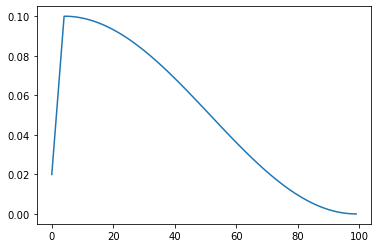

In [12]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)